# Data 102 Project

# Imports

In [1]:
!pip install scikit-learn
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install geopandas

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install statsmodels==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 116.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 119.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 114.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.5/979.5 KB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 136.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 128.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 113.5 MB/s eta 0:0

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data Overview

## Data Sources:

### PM 2.5 Concentrations Dataset

### Ozone Concentrations Dataset

### Cardiovascular Disease Dataset

### Asthma Dataset

### FIPS Reference

## Reference Material:

### CDC Indicators for Chronic Disease Surveillance U.S.

## Data Cleaning

### Aggregating Large Datasets

Both pm2.5 concentrations and ozone concentrations had over 100 million rows. Most notebooks cannot handle files of this size so we decided to aggregate the data by state's monthly concentration averages. Here is the Python script that we used:

In [6]:
# aggregate_monthly_average.py
import argparse
from tqdm import tqdm

def aggregate_monthly_average(input_file, output_file, value_column):
    data = pd.read_csv(input_file, iterator=True, chunksize=10000)

    aggregated_data = pd.DataFrame()

    for chunk in tqdm(data, desc='Processing', unit='chunk'):
        chunk['date'] = pd.to_datetime(chunk['date'], format='%d%b%Y')
        chunk['year'] = chunk['date'].dt.year
        chunk['month'] = chunk['date'].dt.month
        monthly_average = chunk.groupby(['statefips', 'year', 'month'])[value_column].mean().reset_index()

        aggregated_data = aggregated_data.append(monthly_average, ignore_index=True)

    final_monthly_average = aggregated_data.groupby(['statefips', 'year', 'month'])[value_column].mean().reset_index()

    final_monthly_average.to_csv(output_file, index=False)

# if __name__ == '__main__':
#     parser = argparse.ArgumentParser(description='Aggregate monthly averages of a specified value column.')
#     parser.add_argument('input_file', type=str, help='Input CSV file containing the dataset.')
#     parser.add_argument('output_file', type=str, help='Output CSV file for the aggregated data.')
#     parser.add_argument('value_column', type=str, help='Name of the column containing the values to aggregate.')

#     args = parser.parse_args()

#     aggregate_monthly_average(args.input_file, args.output_file, args.value_column)

### Loading Files to Dataframes

In [7]:
pm25 = pd.read_csv('pm25_concentrations_monthly_average_state.csv')
ozone = pd.read_csv('ozone_concentrations_monthly_average_states.csv')
asthma = pd.read_csv('asthma.csv')
cardio = pd.read_csv('cvd.csv')
fips = pd.read_csv('us-state-ansi-fips.csv')

In [8]:
asthma.head()

YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

   LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1  \
0           5      AST     AST3_1            NMBR                     GENDER   
1           8      AST     AST3_1            NMBR                    OVERALL   
2          11      AST     AST3_1            NMBR                    OVERALL   
3          13      AST     AST3_1            NMBR                     GENDER   
4          26      AST     AST3_1            NMBR                       RACE   

   StratificationID1 StratificationCategoryID2 StratificationID2  \
0               GENM                       NaN               NaN   
1                OVR                       NaN               NaN   
2                OVR                       NaN               NaN   
3               GENF                       NaN               NaN   
4                HIS                       NaN               NaN   

   StratificationCategoryID3  StratificationID3  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 33 columns]

In [9]:
unique_values_actual = cardio.apply(lambda x: x.unique())
print(unique_values_actual)

YearStart                    [2016, 2012, 2014, 2011, 2018, 2019, 2015, 201...
YearEnd                      [2016, 2012, 2014, 2011, 2018, 2019, 2015, 201...
LocationAbbr                 [ID, MA, MD, MS, SD, VA, IA, UT, MN, US, VT, I...
LocationDesc                 [Idaho, Massachusetts, Maryland, Mississippi, ...
DataSource                   [NVSS, CMS Part A Claims Data, SEDD; SID, PRAM...
Topic                                                 [Cardiovascular Disease]
Question                     [Mortality from heart failure, Hospitalization...
Response                                                                 [nan]
DataValueUnit                [nan, %, Number, cases per 100,000, cases per ...
DataValueType                [Number, Crude Prevalence, Age-adjusted Rate, ...
DataValue                    [36.0, 2671.0, 2048.0, 2397.0, 432.0, 4234.0, ...
DataValueAlt                 [36.0, 2671.0, 2048.0, 2397.0, 432.0, 4234.0, ...
DataValueFootnoteSymbol                     [nan, -,

In [10]:
fips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stname   51 non-null     object
 1    st      51 non-null     int64 
 2    stusps  51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


# EDA

## FIPS Code Reference for U.S. States

### Columns

STATE_NAME -> state name

STATE -> state code

STUSAB -> state abbreviation

### Dataframe

In [11]:
from io import StringIO
from urllib.request import urlopen

url = 'https://www2.census.gov/geo/docs/reference/state.txt'

# Open the URL and read the content
with urlopen(url) as response:
    data = response.read().decode()


fips_ref = pd.read_csv(StringIO(data), sep='|')
fips_ref.drop('STATENS',axis=1, inplace=True)
fips_ref.head()

STATE STUSAB  STATE_NAME
0      1     AL     Alabama
1      2     AK      Alaska
2      4     AZ     Arizona
3      5     AR    Arkansas
4      6     CA  California

------

## Particulate Matter 2.5 Concentrations State's Monthly Average

### Columns

statefips -> Federal Information Processing System (FIPS) Codes for States. FIPS codes are numbers that uniquely identify states.

year -> Year of estimate

month -> Month of estimate

pm_average -> The monthly average prediction of a state's pm 2.5 concentration 

### Dataframe

In [12]:
pm25.rename(columns={'ds_pm_pred': 'pm_avg'}, inplace=True)
pm25

statefips  year  month     pm_avg
0             1  2011      1   9.975820
1             1  2011      2  10.970784
2             1  2011      3  10.809733
3             1  2011      4   8.937865
4             1  2011      5  11.590264
...         ...   ...    ...        ...
2347         56  2014      8   5.407523
2348         56  2014      9   4.711881
2349         56  2014     10   3.699177
2350         56  2014     11   3.573586
2351         56  2014     12   3.940925

[2352 rows x 4 columns]

How many states does the pm25 dataset represent?

In [13]:
len(pm25["statefips"].unique())

49

What unique states are represented in the pm25 dataset?

In [14]:

pm25_states = pm25["statefips"].unique()
pm25_states

array([ 1,  4,  5,  6,  8,  9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

What states are not represented in the pm25 dataset?


In [15]:
def missing_states_abbr(input_fips):
    # Filter the reference DataFrame to find rows with FIPS codes not in input_fips
    missing_states = fips_ref[~fips_ref['STATE'].isin(input_fips)]

    # Return the abbreviations of the missing states as a list
    missing_abbr = missing_states['STATE_NAME'].tolist()

    return missing_abbr

missing_states_abbr(pm25_states)

['Alaska',
 'Hawaii',
 'American Samoa',
 'Guam',
 'Northern Mariana Islands',
 'Puerto Rico',
 'U.S. Minor Outlying Islands',
 'U.S. Virgin Islands']

Lets double check that every state has a monthly value for all four years of pm 2.5 concentrations

In [16]:
# Count the number of months with data for each state and year
monthly_count = pm25.groupby(['statefips', 'year']).agg({'month': 'count'}).reset_index()

# Reshape the data for easier visualization
monthly_count_pivot = monthly_count.pivot_table(index='statefips', columns='year', values='month', fill_value=0)

# Display the result
print(monthly_count_pivot)
print('States counted: ' + str(len(monthly_count_pivot)))

year       2011  2012  2013  2014
statefips                        
1            12    12    12    12
4            12    12    12    12
5            12    12    12    12
6            12    12    12    12
8            12    12    12    12
9            12    12    12    12
10           12    12    12    12
11           12    12    12    12
12           12    12    12    12
13           12    12    12    12
16           12    12    12    12
17           12    12    12    12
18           12    12    12    12
19           12    12    12    12
20           12    12    12    12
21           12    12    12    12
22           12    12    12    12
23           12    12    12    12
24           12    12    12    12
25           12    12    12    12
26           12    12    12    12
27           12    12    12    12
28           12    12    12    12
29           12    12    12    12
30           12    12    12    12
31           12    12    12    12
32           12    12    12    12
33           1

What are the yearly averages of each state's pm2.5 concentrations?

In [17]:
yearly_pm25_avg = pm25.groupby(['statefips', 'year']).agg({'pm_avg': 'mean'}).reset_index()
yearly_pm25_avg

statefips  year     pm_avg
0            1  2011  10.697373
1            1  2012  10.262196
2            1  2013   9.914189
3            1  2014  10.810407
4            4  2011   7.900381
..         ...   ...        ...
191         55  2014   9.218036
192         56  2011   5.909060
193         56  2012   6.274367
194         56  2013   5.209208
195         56  2014   4.273843

[196 rows x 3 columns]

Lets plot the distribution of average pm25 concentration by state to test if it's normally distributed

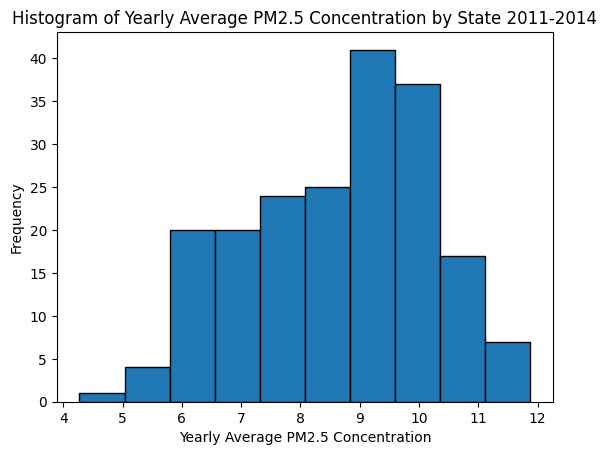

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(yearly_pm25_avg['pm_avg'], bins=10, edgecolor='black')

plt.xlabel('Yearly Average PM2.5 Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of Yearly Average PM2.5 Concentration by State 2011-2014')

plt.show()


In [19]:
# read US geopandas file 2018
unique_states = yearly_pm25_avg['statefips'].unique()
geo_st = geopandas.read_file('/work/cb_2018_us_state_500k.shp')
geo_st.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.64320 38.16909, -82.64300 38.169...

In [20]:
# pick only the unique 49 states 
geo_st['statefip'] = geo_st['STATEFP'].apply(pd.to_numeric)
unique_st = geo_st.loc[geo_st['statefip'].isin(unique_states)]
unique_st

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0       28  01779790  0400000US28    28     MS           Mississippi   00   
1       37  01027616  0400000US37    37     NC        North Carolina   00   
2       40  01102857  0400000US40    40     OK              Oklahoma   00   
3       51  01779803  0400000US51    51     VA              Virginia   00   
4       54  01779805  0400000US54    54     WV         West Virginia   00   
5       22  01629543  0400000US22    22     LA             Louisiana   00   
6       26  01779789  0400000US26    26     MI              Michigan   00   
7       25  00606926  0400000US25    25     MA         Massachusetts   00   
8       16  01779783  0400000US16    16     ID                 Idaho   00   
9       12  00294478  0400000US12    12     FL               Florida   00   
10      31  01779792  0400000US31    31     NE              Nebraska   00   
11      53  01779804  0400000US53    53     WA            Washington   00   
12      35  00897535  0400000US35    35     NM            New Mexico   00   
14      46  01785534  0400000US46    46     SD          South Dakota   00   
15      48  01779801  0400000US48    48     TX                 Texas   00   
16      06  01779778  0400000US06    06     CA            California   00   
17      01  01779775  0400000US01    01     AL               Alabama   00   
18      13  01705317  0400000US13    13     GA               Georgia   00   
19      42  01779798  0400000US42    42     PA          Pennsylvania   00   
20      29  01779791  0400000US29    29     MO              Missouri   00   
21      08  01779779  0400000US08    08     CO              Colorado   00   
22      49  01455989  0400000US49    49     UT                  Utah   00   
23      47  01325873  0400000US47    47     TN             Tennessee   00   
24      56  01779807  0400000US56    56     WY               Wyoming   00   
25      36  01779796  0400000US36    36     NY              New York   00   
26      20  00481813  0400000US20    20     KS                Kansas   00   
28      32  01779793  0400000US32    32     NV                Nevada   00   
29      17  01779784  0400000US17    17     IL              Illinois   00   
30      50  01779802  0400000US50    50     VT               Vermont   00   
31      30  00767982  0400000US30    30     MT               Montana   00   
32      19  01779785  0400000US19    19     IA                  Iowa   00   
33      45  01779799  0400000US45    45     SC        South Carolina   00   
34      33  01779794  0400000US33    33     NH         New Hampshire   00   
35      04  01779777  0400000US04    04     AZ               Arizona   00   
36      11  01702382  0400000US11    11     DC  District of Columbia   00   
39      34  01779795  0400000US34    34     NJ            New Jersey   00   
40      24  01714934  0400000US24    24     MD              Maryland   00   
41      23  01779787  0400000US23    23     ME                 Maine   00   
43      10  01779781  0400000US10    10     DE              Delaware   00   
46      44  01219835  0400000US44    44     RI          Rhode Island   00   
47      21  01779786  0400000US21    21     KY              Kentucky   00   
48      39  01085497  0400000US39    39     OH                  Ohio   00   
49      55  01779806  0400000US55    55     WI             Wisconsin   00   
50      41  01155107  0400000US41    41     OR                Oregon   00   
51      38  01779797  0400000US38    38     ND          North Dakota   00   
52      05  00068085  0400000US05    05     AR              Arkansas   00   
53      18  00448508  0400000US18    18     IN               Indiana   00   
54      27  00662849  0400000US27    27     MN             Minnesota   00   
55      09  01779780  0400000US09    09     CT           Connecticut   00   

           ALAND        AWATER  \
0   121533519481    3926919758   
1   125923656064   13466071395   
2   177662925723    3374587997   
3   102257717110

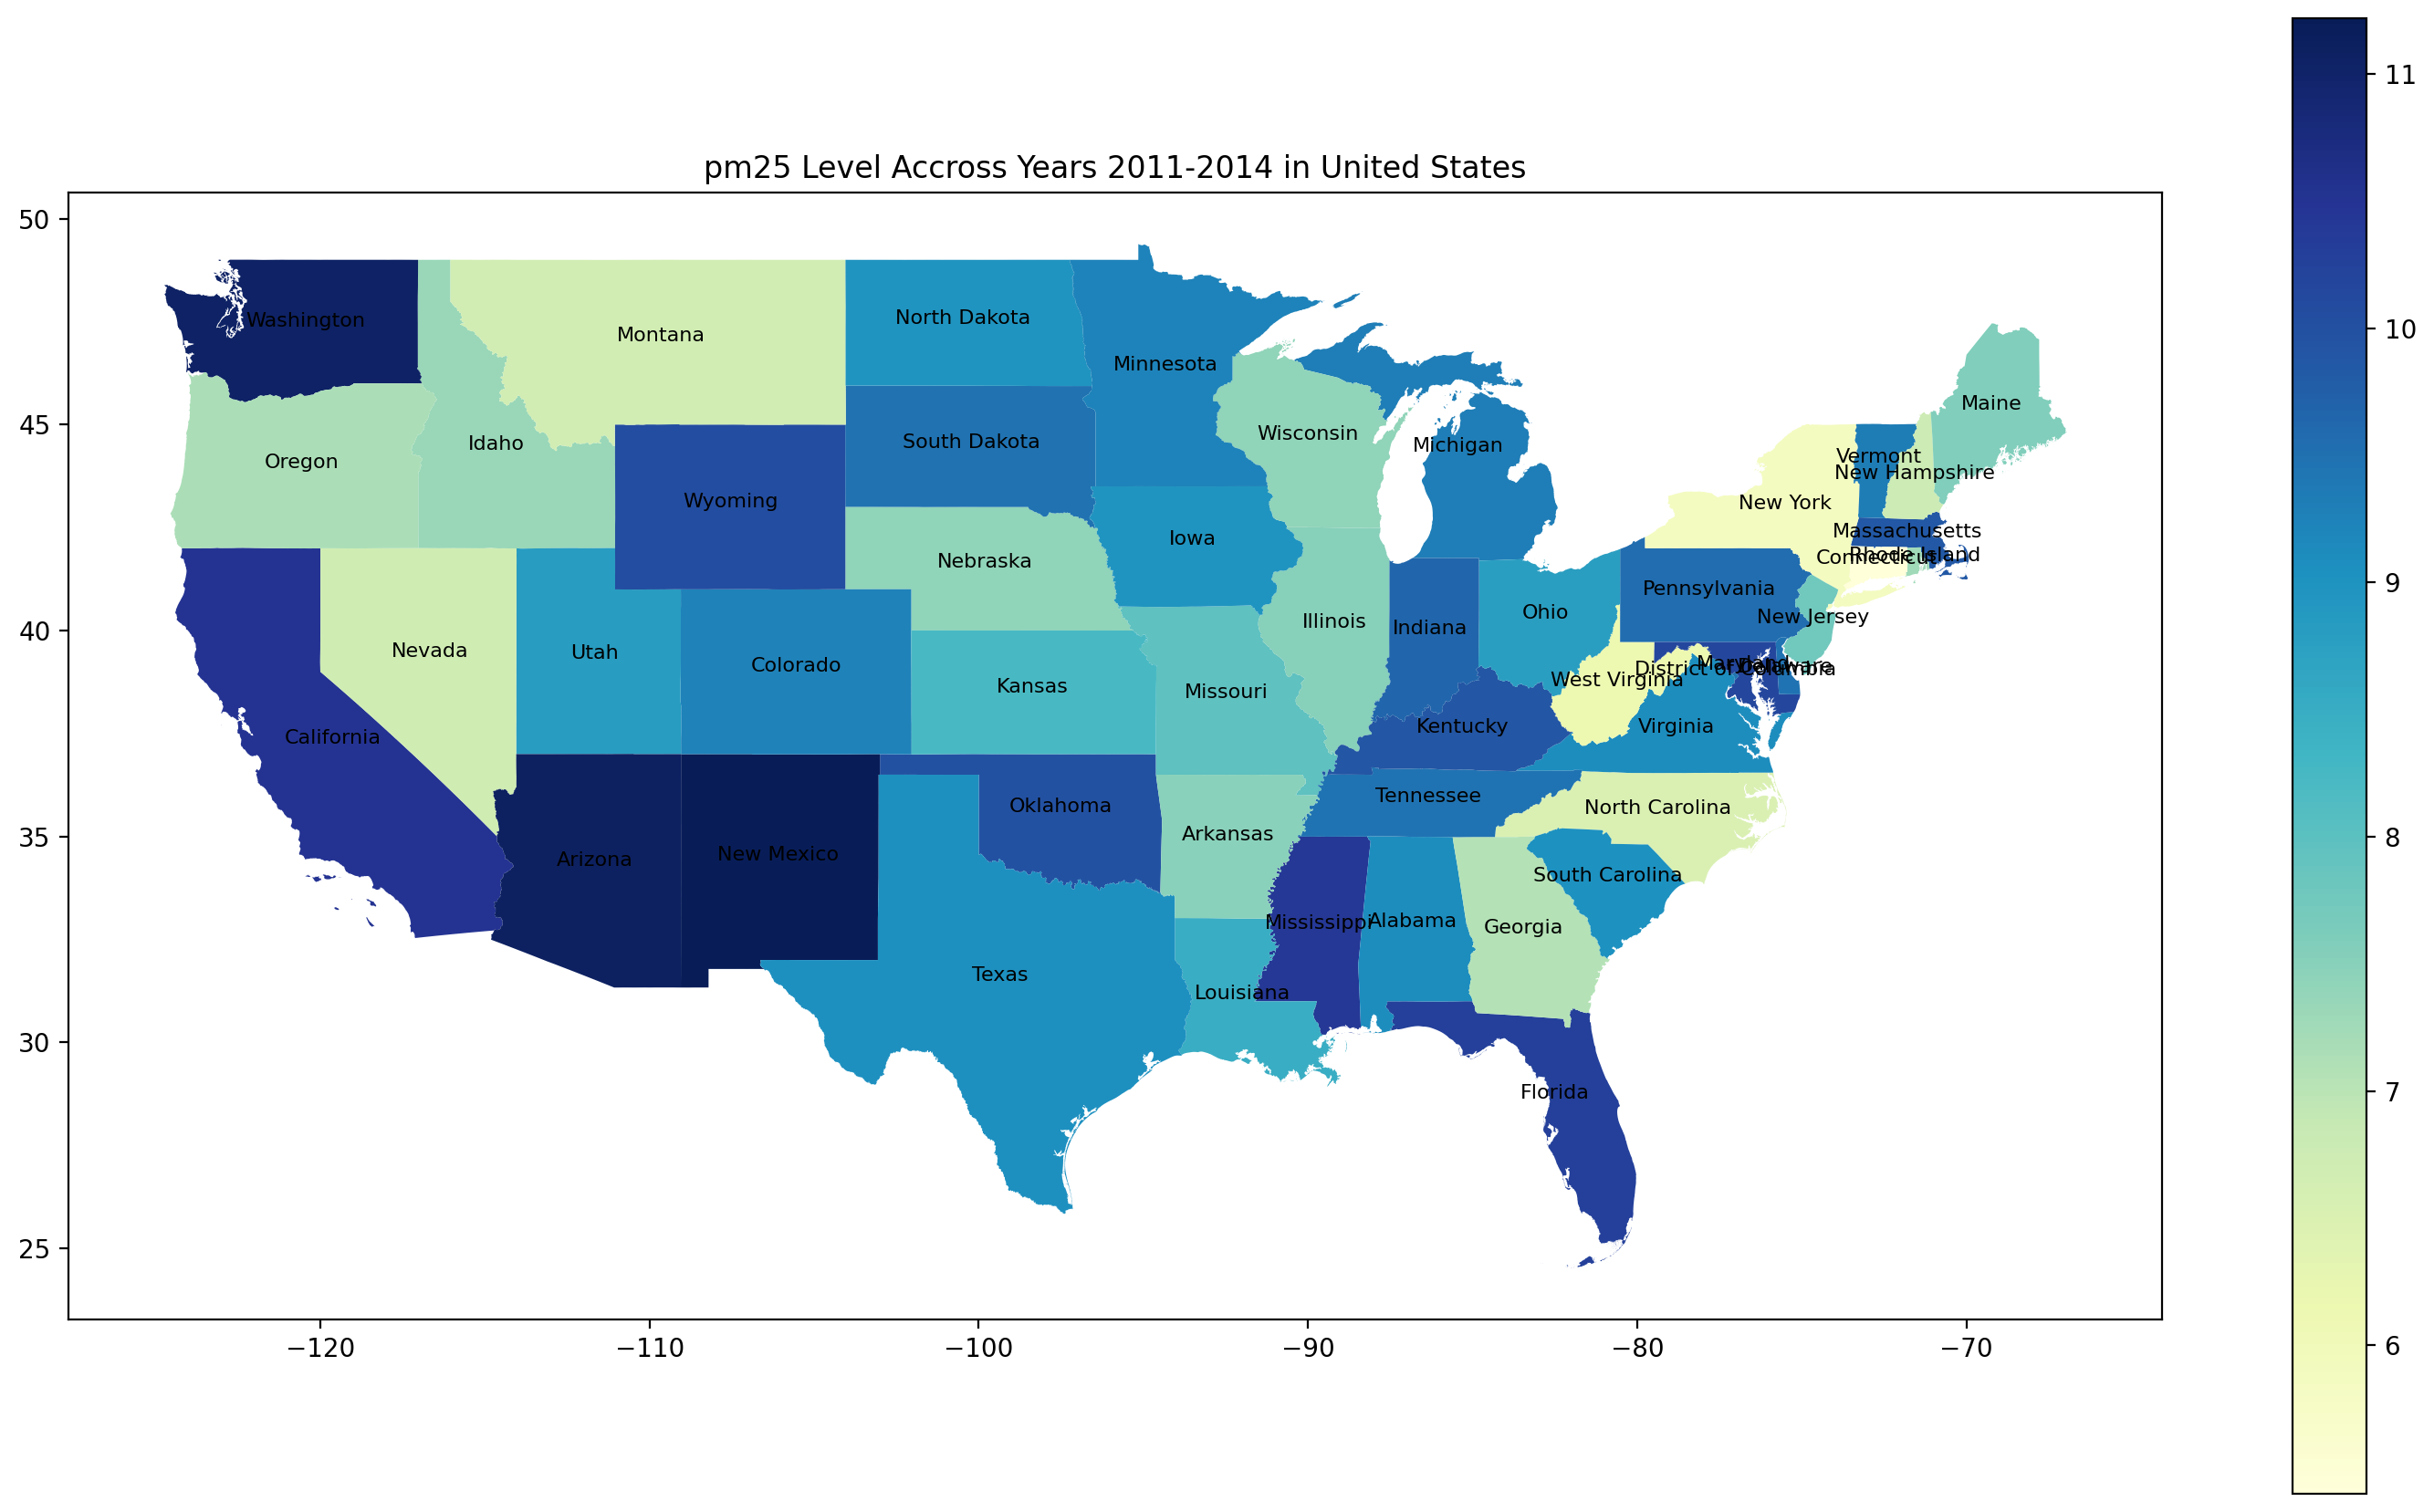

In [21]:
# plots the pm25 concentration level in 49 years accross the years 2011-2014
pm25_avg_statefips = pm25.groupby(['statefips']).agg({'pm_avg': 'mean'}).reset_index()
pm25_list = pm25_avg_statefips.sort_values('statefips')['pm_avg'].to_list()
st_new = unique_st.copy()
st_new['accross_all_years'] = pm25_list
fig, ax = plt.subplots(1, 1)
st_new.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)
st_new.plot(column='accross_all_years', ax=ax, cmap='YlGnBu', legend=True)
plt.title('pm25 Level Accross Years 2011-2014 in United States')
fig.set_size_inches(18.5, 10.5)
plt.gcf().set_dpi(200)
plt.savefig('003.jpg')

## Ozone Concentrations State's Monthly Average

In [22]:
ozone.rename(columns={'ds_o3_pred': 'o3_avg'}, inplace=True)
ozone.head()

statefips  year  month     o3_avg
0          1  2011      1  34.037455
1          1  2011      2  39.167832
2          1  2011      3  41.406328
3          1  2011      4  43.477089
4          1  2011      5  44.941290

How many states does the ozone dataset represent?

In [23]:
len(ozone["statefips"].unique())

49

What unique states are represented in the ozone dataset?

In [24]:
ozone_states = ozone["statefips"].unique()
ozone_states

array([ 1,  4,  5,  6,  8,  9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

What states are not represented in the ozone dataset?


In [25]:
missing_states = missing_states_abbr(ozone_states)
missing_states

['Alaska',
 'Hawaii',
 'American Samoa',
 'Guam',
 'Northern Mariana Islands',
 'Puerto Rico',
 'U.S. Minor Outlying Islands',
 'U.S. Virgin Islands']

Lets double check that every state has a monthly value for all four years of ozone concentrations

In [26]:
# Count the number of months with data for each state and year
monthly_count = ozone.groupby(['statefips', 'year']).agg({'month': 'count'}).reset_index()

# Reshape the data for easier visualization
monthly_count_pivot = monthly_count.pivot_table(index='statefips', columns='year', values='month', fill_value=0)

# Display the result
print(monthly_count_pivot)
print('States counted: ' + str(len(monthly_count_pivot)))

year       2011  2012  2013  2014
statefips                        
1            12    12    12    12
4            12    12    12    12
5            12    12    12    12
6            12    12    12    12
8            12    12    12    12
9            12    12    12    12
10           12    12    12    12
11           12    12    12    12
12           12    12    12    12
13           12    12    12    12
16           12    12    12    12
17           12    12    12    12
18           12    12    12    12
19           12    12    12    12
20           12    12    12    12
21           12    12    12    12
22           12    12    12    12
23           12    12    12    12
24           12    12    12    12
25           12    12    12    12
26           12    12    12    12
27           12    12    12    12
28           12    12    12    12
29           12    12    12    12
30           12    12    12    12
31           12    12    12    12
32           12    12    12    12
33           1

What are the yearly averages of each state's pm25 concentrations?

In [27]:
yearly_ozone_avg = ozone.groupby(['statefips', 'year']).agg({'o3_avg': 'mean'}).reset_index()
yearly_ozone_avg

statefips  year     o3_avg
0            1  2011  41.058259
1            1  2012  40.499271
2            1  2013  37.311537
3            1  2014  37.593022
4            4  2011  46.834803
..         ...   ...        ...
191         55  2014  36.305222
192         56  2011  46.211785
193         56  2012  46.106282
194         56  2013  45.154356
195         56  2014  43.711218

[196 rows x 3 columns]

Lets plot the distribution of average ozone concentration by state to test if it's normally distributed

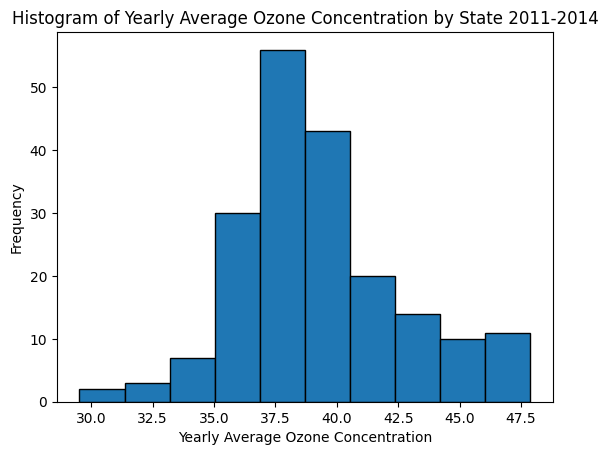

In [28]:
plt.hist(yearly_ozone_avg['o3_avg'], bins=10, edgecolor='black')

plt.xlabel('Yearly Average Ozone Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of Yearly Average Ozone Concentration by State 2011-2014')

plt.show()

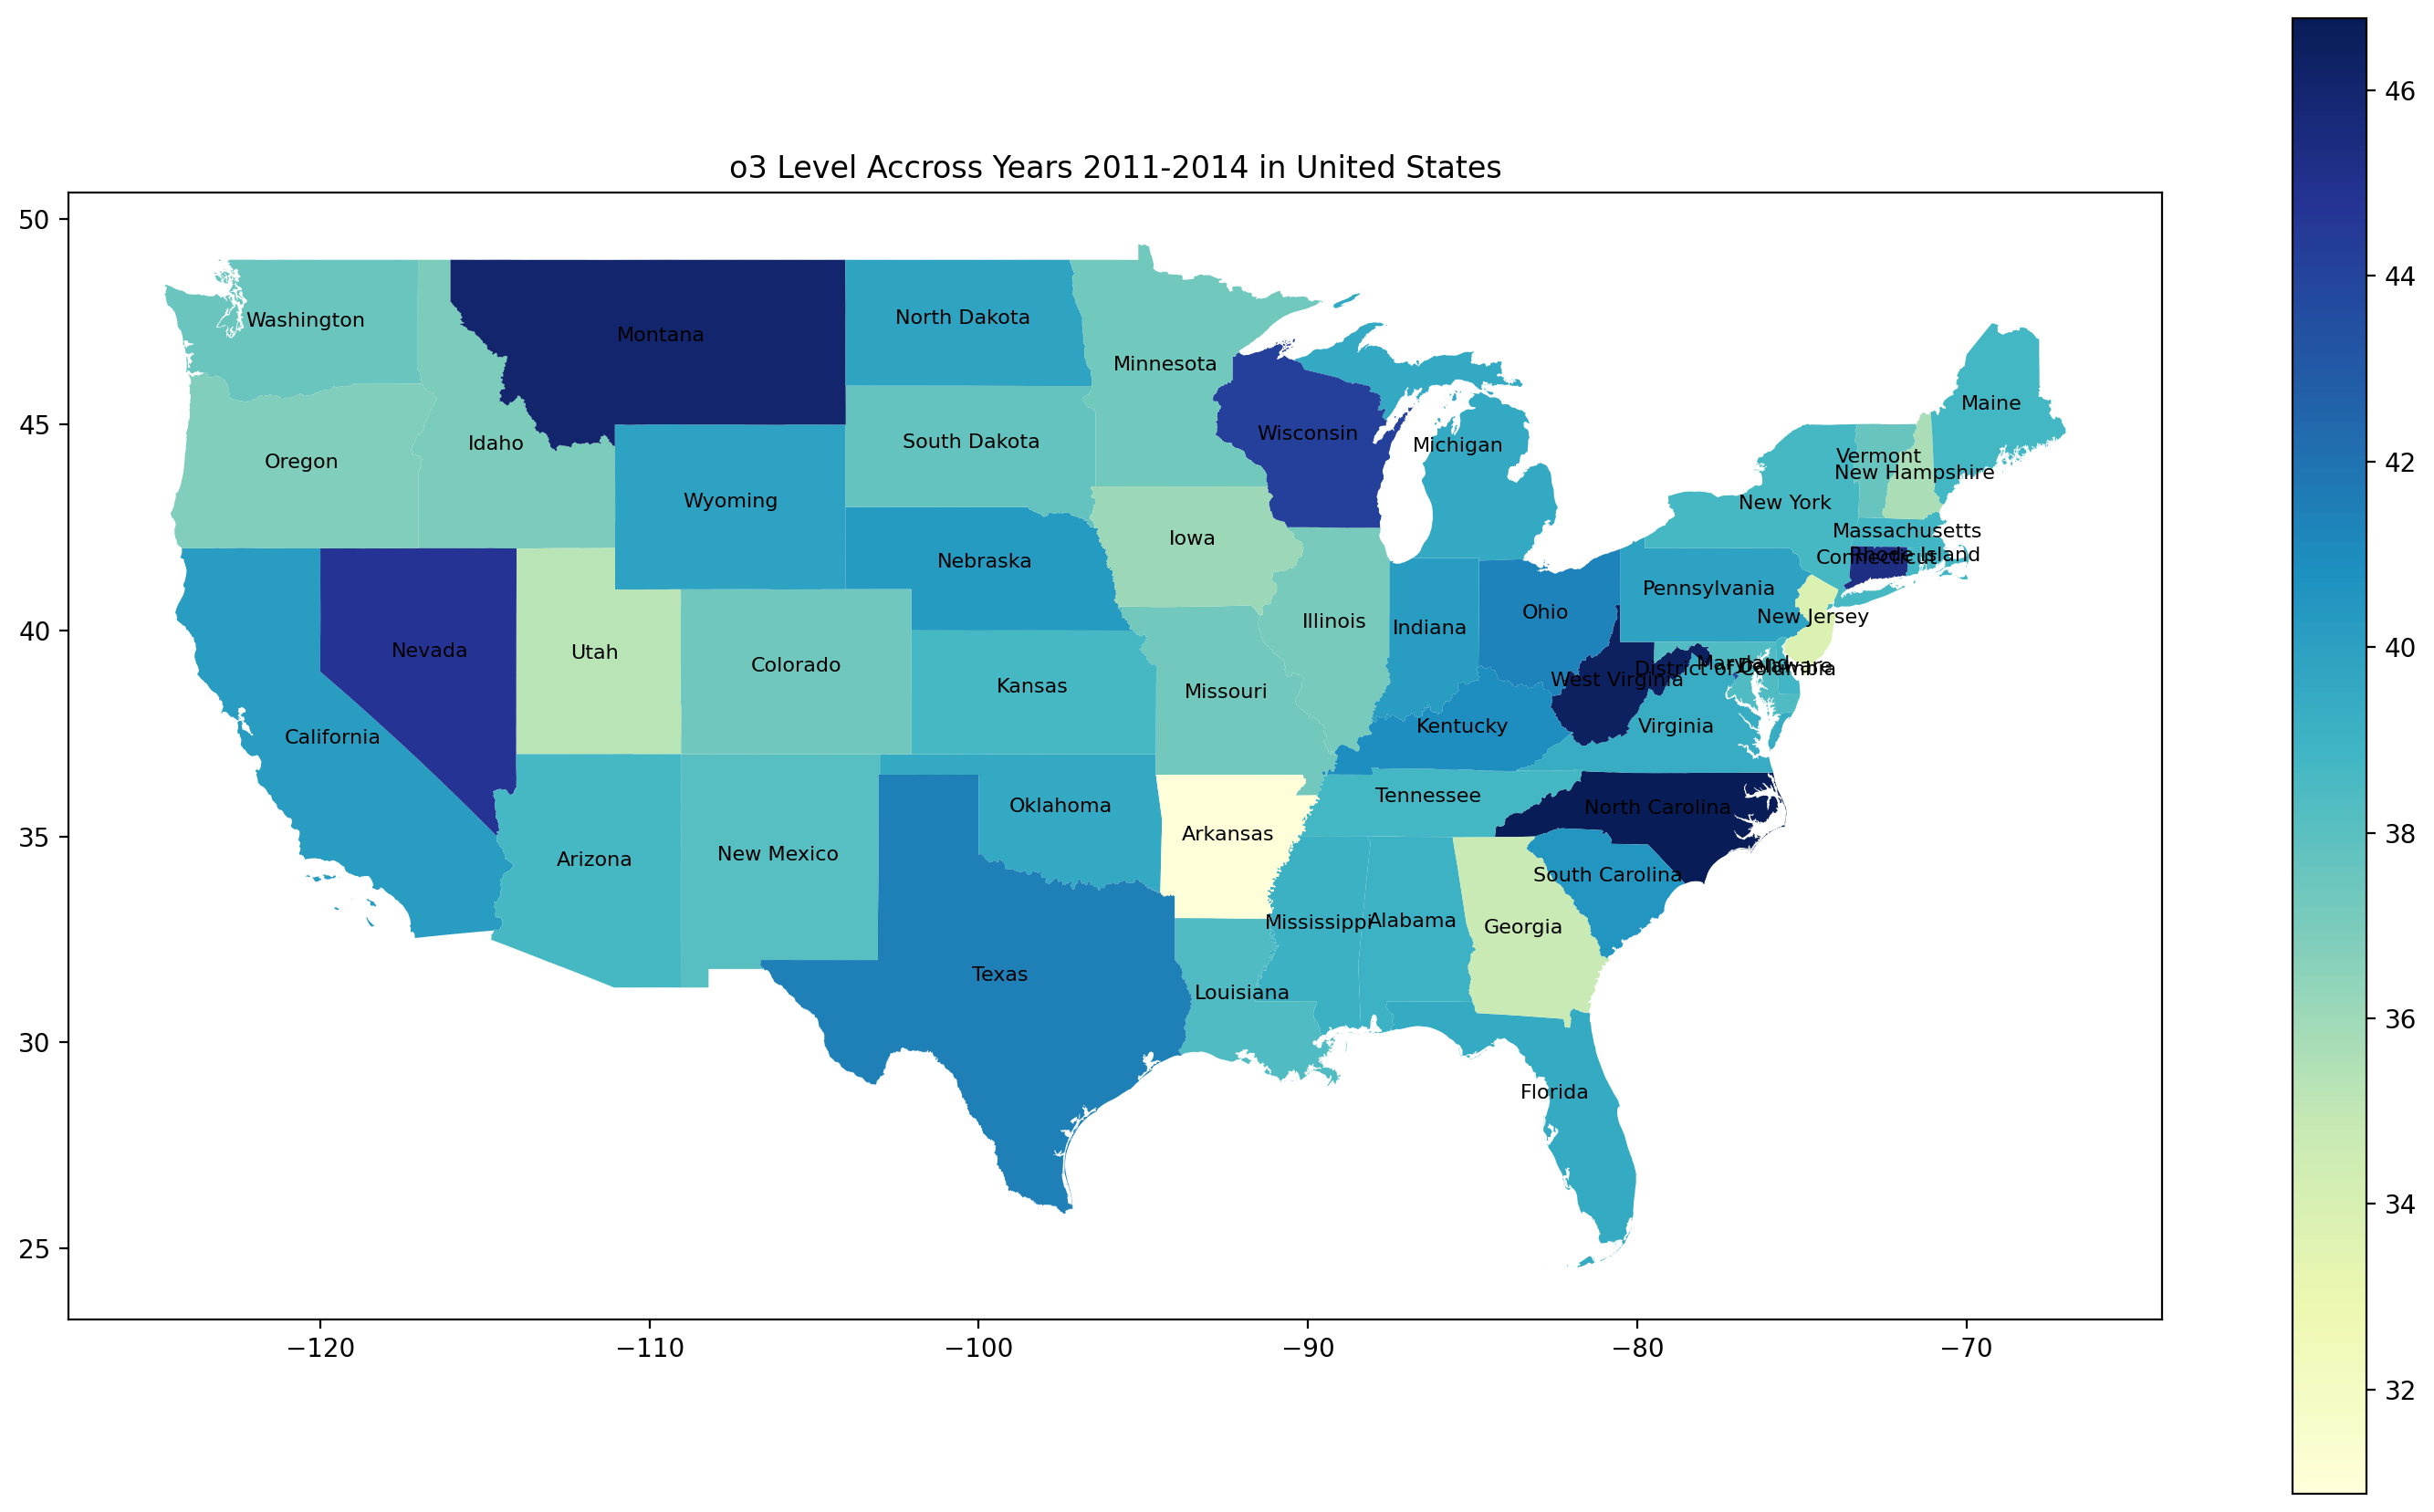

In [29]:
# plots the ozone concentration level in 49 years accross the years 2011-2014
o3_avg_statefips = ozone.groupby(['statefips']).agg({'o3_avg': 'mean'}).reset_index()
o3_list = o3_avg_statefips.sort_values('statefips')['o3_avg'].to_list()
st_new = unique_st.copy()
st_new['accross_all_years'] = o3_list
fig, ax = plt.subplots(1, 1)
st_new.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)
st_new.plot(column='accross_all_years', ax=ax, cmap='YlGnBu', legend=True)
plt.title('o3 Level Accross Years 2011-2014 in United States')
fig.set_size_inches(18.5, 10.5)
plt.gcf().set_dpi(200)
plt.savefig('003.jpg')

In [30]:
print(yearly_ozone_avg['o3_avg'].describe())

count    196.000000
mean      39.267063
std        3.399024
min       29.516965
25%       37.203681
50%       38.731538
75%       40.983212
max       47.880303
Name: o3_avg, dtype: float64


## Cardiovascular Disease

In [31]:
cardio.head()

YearStart  YearEnd LocationAbbr   LocationDesc DataSource  \
0       2016     2016           ID          Idaho       NVSS   
1       2012     2012           MA  Massachusetts       NVSS   
2       2014     2014           MD       Maryland       NVSS   
3       2014     2014           MS    Mississippi       NVSS   
4       2011     2011           SD   South Dakota       NVSS   

                    Topic                      Question  Response  \
0  Cardiovascular Disease  Mortality from heart failure       NaN   
1  Cardiovascular Disease  Mortality from heart failure       NaN   
2  Cardiovascular Disease  Mortality from heart failure       NaN   
3  Cardiovascular Disease  Mortality from heart failure       NaN   
4  Cardiovascular Disease  Mortality from heart failure       NaN   

  DataValueUnit DataValueType  ...  LocationID  TopicID QuestionID  \
0           NaN        Number  ...          16      CVD     CVD1_4   
1           NaN        Number  ...          25      CVD     CVD1_4   
2           NaN        Number  ...          24      CVD     CVD1_4   
3           NaN        Number  ...          28      CVD     CVD1_4   
4           NaN        Number  ...          46      CVD     CVD1_4   

  DataValueTypeID  StratificationCategoryID1  StratificationID1  \
0            NMBR                       RACE                HIS   
1            NMBR                     GENDER               GENM   
2            NMBR                     GENDER               GENF   
3            NMBR                     GENDER               GENF   
4            NMBR                     GENDER               GENM   

  StratificationCategoryID2 StratificationID2  StratificationCategoryID3  \
0                       NaN               NaN                        NaN   
1                       NaN               NaN                        NaN   
2                       NaN               NaN                        NaN   
3                       NaN               NaN                        NaN   
4                       NaN               NaN                        NaN   

   StratificationID3  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 33 columns]

In [32]:
cardio.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [33]:
cardio_questions = cardio["Question"].unique()
cardio_questions

array(['Mortality from heart failure',
       'Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years',
       'Hospitalization for stroke', 'Pre-pregnancy hypertension',
       'Mortality from total cardiovascular diseases',
       'Mortality from diseases of the heart',
       'Mortality from coronary heart disease',
       'Mortality from cerebrovascular disease (stroke)',
       'Hospitalization for acute myocardial infarction',
       'Cholesterol screening among adults aged >= 18 years',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke',
       'Awareness of high blood pressure among women aged 18-44 years',
       'High cholesterol prevalence among adults aged >= 18 years',
       'Taking medicine for high blood pressure control among adults age

In [34]:
len(cardio_questions)

18

In [35]:
cardio_strat = cardio['StratificationCategory1'].unique()
cardio_strat

array(['Race/Ethnicity', 'Gender', 'Overall'], dtype=object)

What are the unique values of each columns in cardiovascular dataset?

In [36]:
for column in cardio.columns:
    print(f"Unique values in column '{column}':")
    print(cardio[column].unique())
    print("\n")

Unique values in column 'YearStart':
[2016 2012 2014 2011 2018 2019 2015 2013 2020 2017 2010 2021]


Unique values in column 'YearEnd':
[2016 2012 2014 2011 2018 2019 2015 2013 2020 2017 2010 2021]


Unique values in column 'LocationAbbr':
['ID' 'MA' 'MD' 'MS' 'SD' 'VA' 'IA' 'UT' 'MN' 'US' 'VT' 'IN' 'AL' 'AZ'
 'DE' 'AK' 'CT' 'KY' 'NM' 'TX' 'NC' 'SC' 'NE' 'NV' 'NJ' 'HI' 'GA' 'TN'
 'FL' 'WY' 'MO' 'NY' 'ME' 'LA' 'IL' 'DC' 'OH' 'MI' 'WA' 'RI' 'ND' 'KS'
 'CO' 'CA' 'NH' 'MT' 'OR' 'AR' 'PA' 'OK' 'WI' 'WV' 'GU' 'VI' 'PR']


Unique values in column 'LocationDesc':
['Idaho' 'Massachusetts' 'Maryland' 'Mississippi' 'South Dakota'
 'Virginia' 'Iowa' 'Utah' 'Minnesota' 'United States' 'Vermont' 'Indiana'
 'Alabama' 'Arizona' 'Delaware' 'Alaska' 'Connecticut' 'Kentucky'
 'New Mexico' 'Texas' 'North Carolina' 'South Carolina' 'Nebraska'
 'Nevada' 'New Jersey' 'Hawaii' 'Georgia' 'Tennessee' 'Florida' 'Wyoming'
 'Missouri' 'New York' 'Maine' 'Louisiana' 'Illinois'
 'District of Columbia' 'Ohio' 'Michig

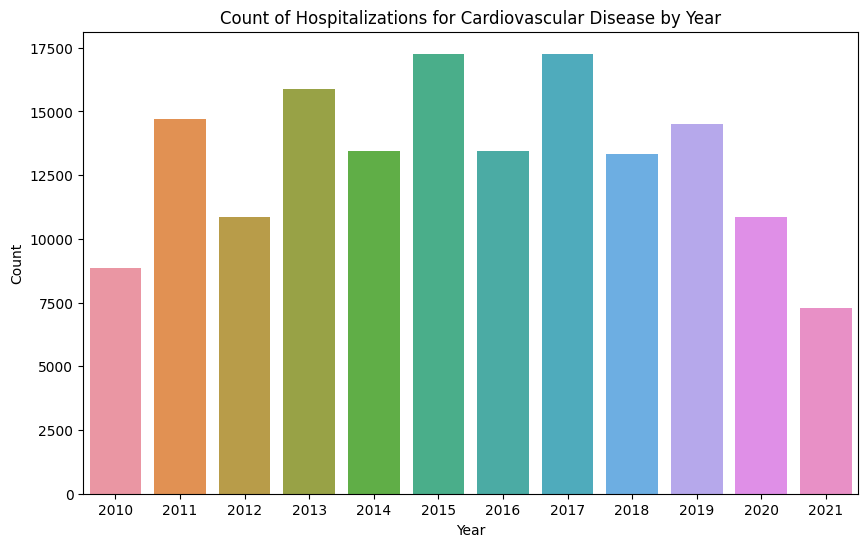

In [37]:

plt.figure(figsize=(10, 6))
sns.countplot(x='YearStart', data=cardio)
plt.title('Count of Hospitalizations for Cardiovascular Disease by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [38]:
print(cardio['DataValue'].describe())

count    113167.000000
mean       1437.111091
std       15384.075658
min           0.180000
25%          35.600000
50%          72.500000
75%         173.500000
max      928741.000000
Name: DataValue, dtype: float64


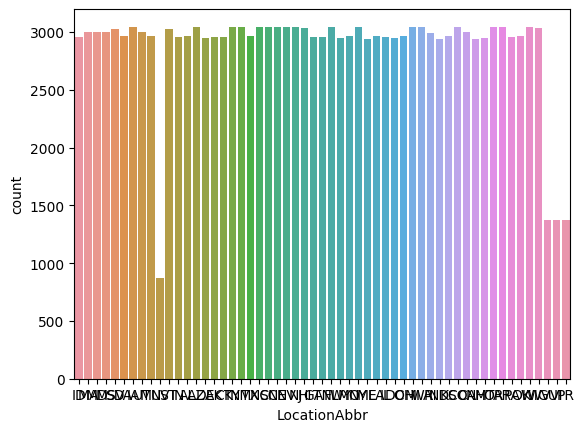

In [39]:
# Bar plot for categorical columns
sns.countplot(data=cardio, x='LocationAbbr')
plt.show()

In [40]:
# for categorical
for col in cardio.select_dtypes(include='object').columns:
    print(cardio[col].value_counts())

NY    3045
FL    3045
CO    3045
AZ    3045
WI    3045
MI    3045
NV    3045
NM    3045
NC    3045
OR    3045
WA    3045
NE    3042
AR    3042
NJ    3039
IA    3039
SC    3039
KY    3039
HI    3036
WV    3030
SD    3027
VT    3021
CA    3003
MS    3003
UT    3003
MA    3000
MD    2997
RI    2994
TX    2961
LA    2961
MN    2961
OH    2961
KS    2961
MO    2961
VA    2961
OK    2961
AL    2961
AK    2958
GA    2955
TN    2955
PA    2955
ID    2955
IL    2955
CT    2955
IN    2955
DC    2949
DE    2949
MT    2946
WY    2946
ND    2943
ME    2940
NH    2937
VI    1377
GU    1377
PR    1377
US     868
Name: LocationAbbr, dtype: int64
Oregon                  3045
New Mexico              3045
Michigan                3045
Washington              3045
North Carolina          3045
Nevada                  3045
Florida                 3045
Wisconsin               3045
New York                3045
Arizona                 3045
Colorado                3045
Arkansas                3042
Nebraska      

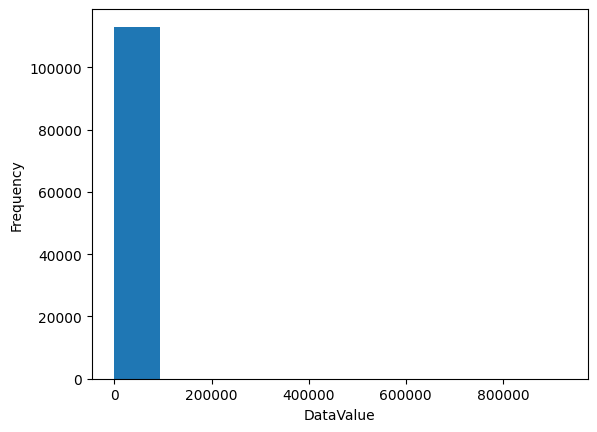

In [41]:
# Histogram for continuous columns
plt.hist(cardio['DataValue'])
plt.xlabel('DataValue')
plt.ylabel('Frequency')
plt.show()

In [42]:
#hypothesis testing, maybe?
from scipy.stats import ttest_ind

male_data = cardio[cardio['StratificationID1'] == 'GENM']['DataValue']
female_data = cardio[cardio['StratificationID1'] == 'GENF']['DataValue']

t_stat, p_value = ttest_ind(male_data.dropna(), female_data.dropna())
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.2819958748315624
p-value: 0.7779482879000573


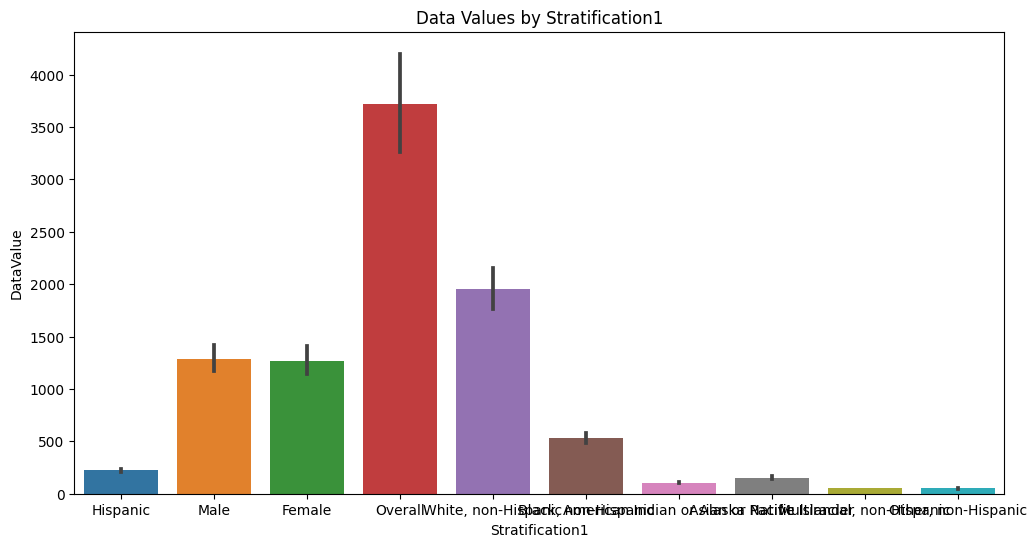

In [43]:
# stratification1:
# Bar plot of Data Values by Stratification1
plt.figure(figsize=(12, 6))
sns.barplot(data=cardio, x='Stratification1', y='DataValue')
plt.xlabel('Stratification1')
plt.ylabel('DataValue')
plt.title('Data Values by Stratification1')
plt.show()

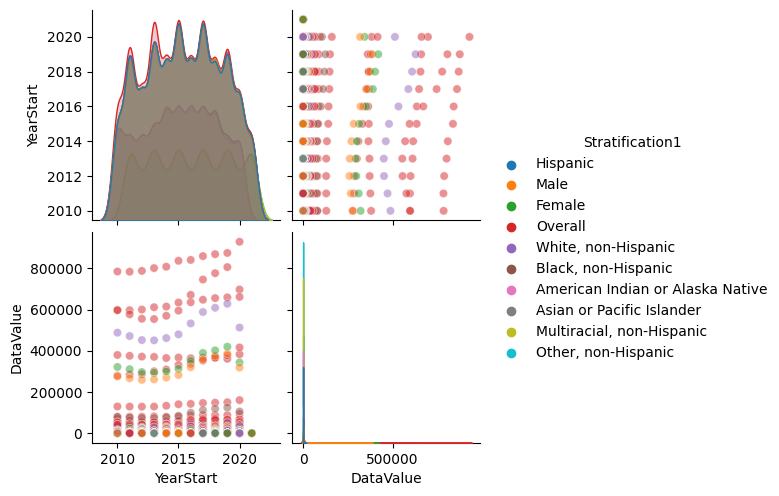

In [44]:
#Pairwise relationships for 'DataValue' and 'YearStart'
sns.pairplot(data=cardio, vars=['YearStart', 'DataValue'], hue='Stratification1', plot_kws={'alpha': 0.5})
plt.show()

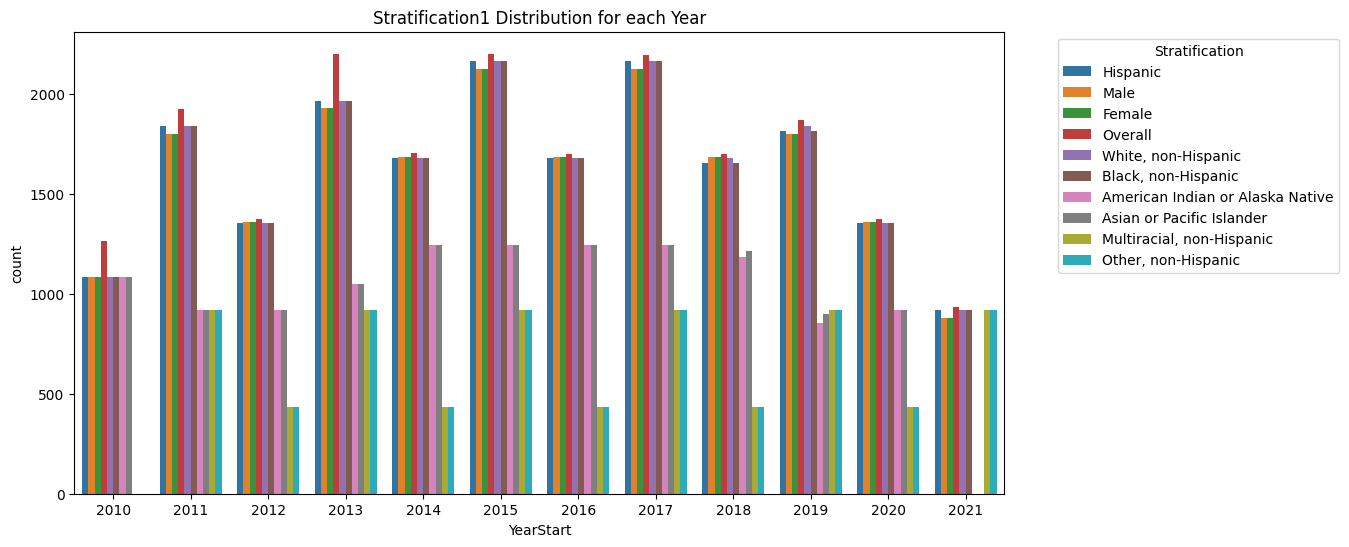

In [45]:
# Stratification1 Distribution for each Year
plt.figure(figsize=(12, 6))
sns.countplot(data=cardio, x='YearStart', hue='Stratification1')
plt.title('Stratification1 Distribution for each Year')
plt.legend(title='Stratification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

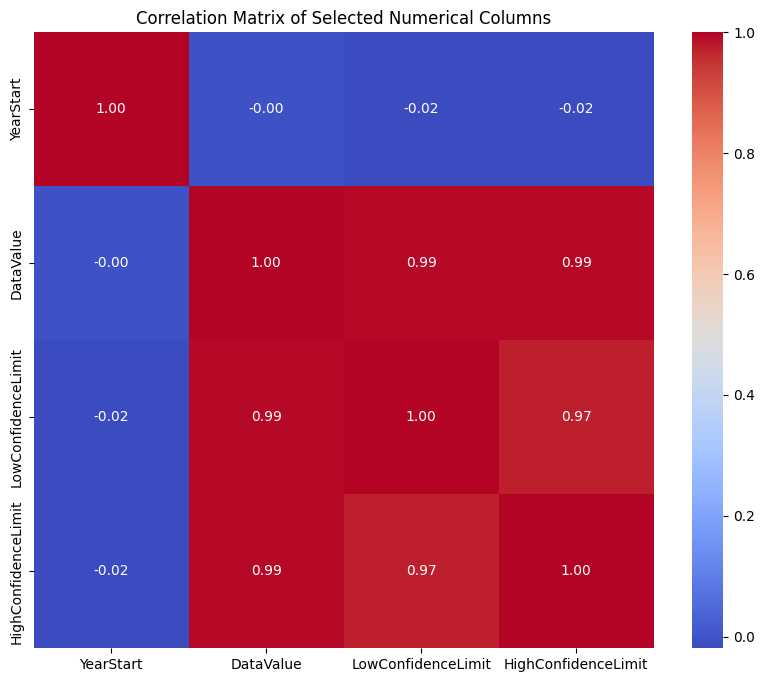

In [46]:
# Pair plot of selected numerical columns
selected_columns = ['YearStart', 'DataValue', 'LowConfidenceLimit', 'HighConfidenceLimit']

# Correlation matrix of selected numerical columns
correlation_matrix = cardio[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Columns')
plt.show()

## Asthma

In [47]:
asthma.head()

YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

   LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1  \
0           5      AST     AST3_1            NMBR                     GENDER   
1           8      AST     AST3_1            NMBR                    OVERALL   
2          11      AST     AST3_1            NMBR                    OVERALL   
3          13      AST     AST3_1            NMBR                     GENDER   
4          26      AST     AST3_1            NMBR                       RACE   

   StratificationID1 StratificationCategoryID2 StratificationID2  \
0               GENM                       NaN               NaN   
1                OVR                       NaN               NaN   
2                OVR                       NaN               NaN   
3               GENF                       NaN               NaN   
4                HIS                       NaN               NaN   

   StratificationCategoryID3  StratificationID3  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 33 columns]

In [48]:
data = asthma

# Print unique values of each column
for column in data.columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print("\n")

Unique values in column 'YearStart':
[2014 2018 2017 2010 2015 2013 2016 2020 2012 2019 2011 2021]


Unique values in column 'YearEnd':
[2014 2018 2017 2010 2015 2013 2016 2020 2012 2019 2011 2021]


Unique values in column 'LocationAbbr':
['AR' 'CO' 'DC' 'GA' 'MI' 'MT' 'OR' 'PR' 'WI' 'AL' 'ID' 'IL' 'KS' 'LA'
 'MA' 'MD' 'MN' 'MS' 'NC' 'NM' 'TX' 'MO' 'CA' 'AZ' 'WA' 'NY' 'AK' 'GU'
 'ND' 'SD' 'IN' 'NE' 'WY' 'OH' 'ME' 'NV' 'FL' 'NJ' 'DE' 'CT' 'WV' 'KY'
 'TN' 'NH' 'VI' 'VT' 'VA' 'HI' 'IA' 'PA' 'UT' 'RI' 'SC' 'OK' 'US']


Unique values in column 'LocationDesc':
['Arkansas' 'Colorado' 'District of Columbia' 'Georgia' 'Michigan'
 'Montana' 'Oregon' 'Puerto Rico' 'Wisconsin' 'Alabama' 'Idaho' 'Illinois'
 'Kansas' 'Louisiana' 'Massachusetts' 'Maryland' 'Minnesota' 'Mississippi'
 'North Carolina' 'New Mexico' 'Texas' 'Missouri' 'California' 'Arizona'
 'Washington' 'New York' 'Alaska' 'Guam' 'North Dakota' 'South Dakota'
 'Indiana' 'Nebraska' 'Wyoming' 'Ohio' 'Maine' 'Nevada' 'Florida'
 'New Jerse

In [49]:
asthma_states = asthma["LocationID"].unique()
asthma_states

array([ 5,  8, 11, 13, 26, 30, 41, 72, 55,  1, 16, 17, 20, 22, 25, 24, 27,
       28, 37, 35, 48, 29,  6,  4, 53, 36,  2, 66, 38, 46, 18, 31, 56, 39,
       23, 32, 12, 34, 10,  9, 54, 21, 47, 33, 78, 50, 51, 15, 19, 42, 49,
       44, 45, 40, 59])

In [50]:
missing_asthma = missing_states_abbr(asthma_states)
missing_asthma

['American Samoa', 'Northern Mariana Islands', 'U.S. Minor Outlying Islands']

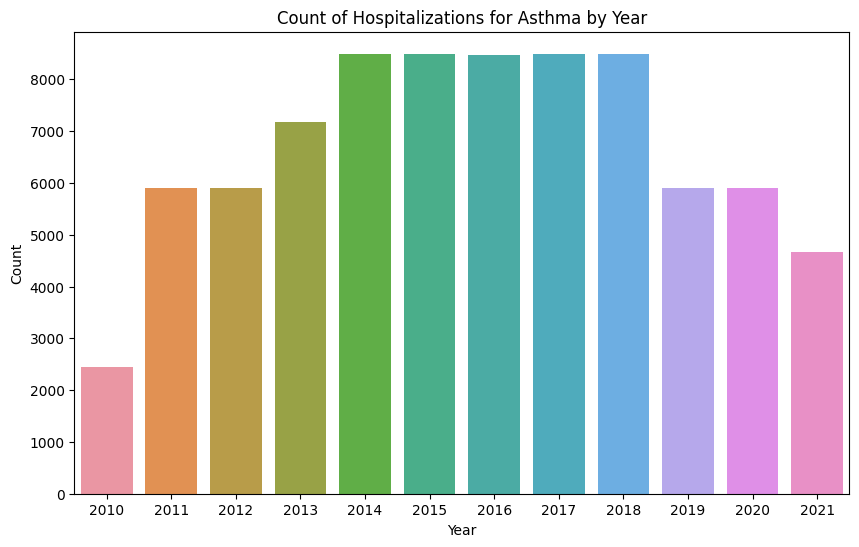

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='YearStart', data=asthma)
plt.title('Count of Hospitalizations for Asthma by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [52]:
# for continuous
print(asthma['DataValue'].describe())

count     39846.000000
mean        356.905720
std        3856.223975
min           0.000000
25%          11.500000
50%          36.800000
75%          63.800000
max      222051.000000
Name: DataValue, dtype: float64


In [53]:
# for categorical
for col in asthma.select_dtypes(include='object').columns:
    print(asthma[col].value_counts())

KY    1531
NE    1531
NV    1531
IA    1531
NY    1531
FL    1531
NC    1531
VT    1531
SC    1531
NJ    1531
AZ    1531
WI    1531
OR    1516
WV    1516
SD    1516
MI    1516
CO    1516
AR    1516
HI    1516
NM    1516
WA    1516
CA    1495
UT    1495
RI    1495
MS    1495
MD    1495
MA    1495
AL    1474
VA    1474
DE    1474
MO    1474
KS    1474
DC    1474
IN    1474
WY    1474
ID    1474
MN    1474
OH    1474
PA    1474
TN    1474
LA    1474
MT    1474
CT    1474
TX    1474
ND    1474
OK    1474
AK    1474
NH    1474
ME    1474
IL    1474
GA    1450
PR    1210
GU    1210
VI    1210
US     374
Name: LocationAbbr, dtype: int64
Iowa                    1531
New York                1531
Florida                 1531
Nevada                  1531
New Jersey              1531
Kentucky                1531
North Carolina          1531
South Carolina          1531
Wisconsin               1531
Arizona                 1531
Vermont                 1531
Nebraska                1531
West Virginia 

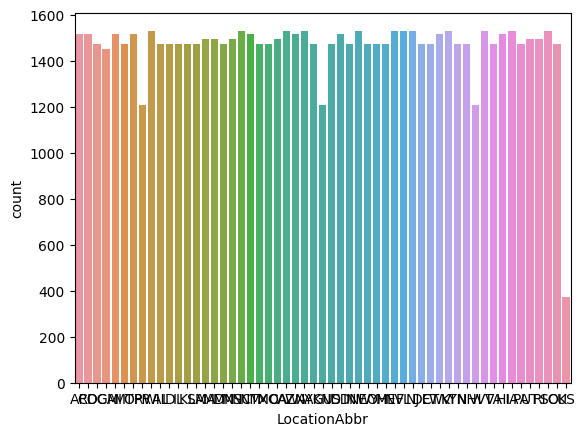

In [54]:
# Bar plot for categorical columns
sns.countplot(data=data, x='LocationAbbr')
plt.show()

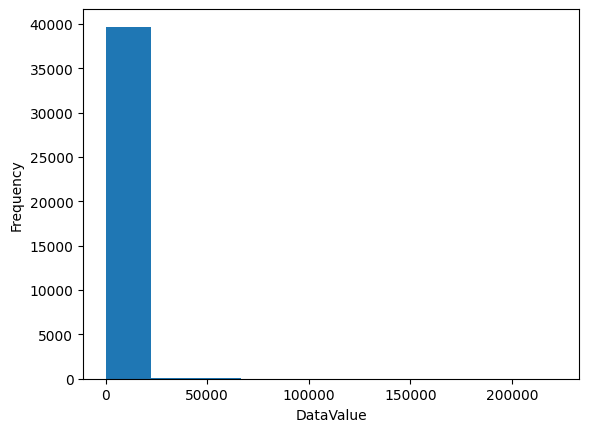

In [55]:
# Histogram for continuous columns
plt.hist(asthma['DataValue'])
plt.xlabel('DataValue')
plt.ylabel('Frequency')
plt.show()

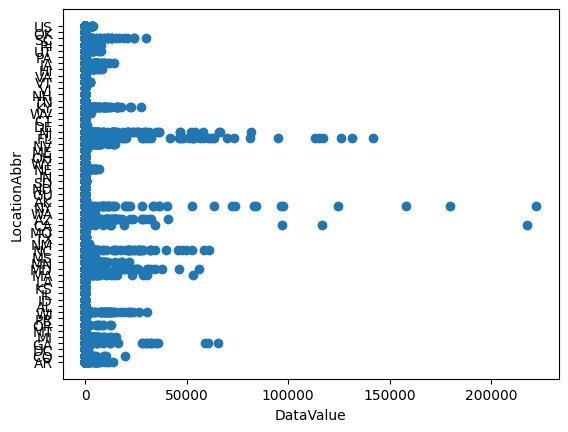

In [56]:
# Scatter plot
plt.scatter(asthma['DataValue'], asthma['LocationAbbr'])
plt.xlabel('DataValue')
plt.ylabel('LocationAbbr')
plt.show()

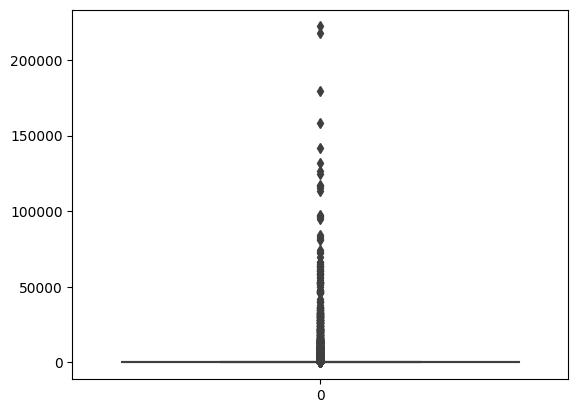

In [57]:
#find outliers:
sns.boxplot(asthma['DataValue'].dropna())
plt.show()

In [58]:
#hypothesis testing, maybe?
from scipy.stats import ttest_ind

male_data = asthma[asthma['StratificationID1'] == 'GENM']['DataValue']
female_data = asthma[asthma['StratificationID1'] == 'GENF']['DataValue']

t_stat, p_value = ttest_ind(male_data.dropna(), female_data.dropna())
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.6120987620462535
p-value: 0.5404820421509307


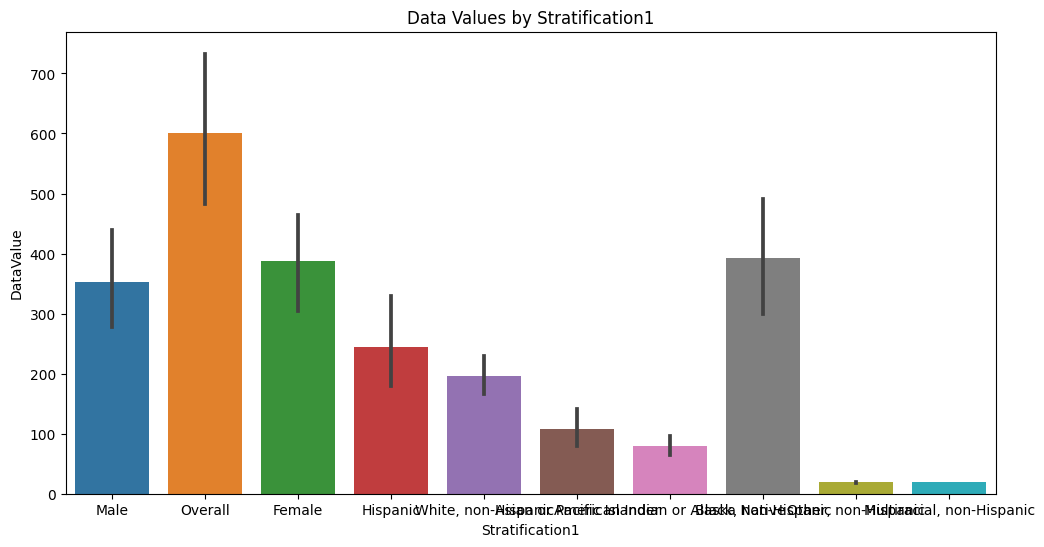

In [59]:
# stratification1:
# Bar plot of Data Values by Stratification1
plt.figure(figsize=(12, 6))
sns.barplot(data=asthma, x='Stratification1', y='DataValue')
plt.xlabel('Stratification1')
plt.ylabel('DataValue')
plt.title('Data Values by Stratification1')
plt.show()

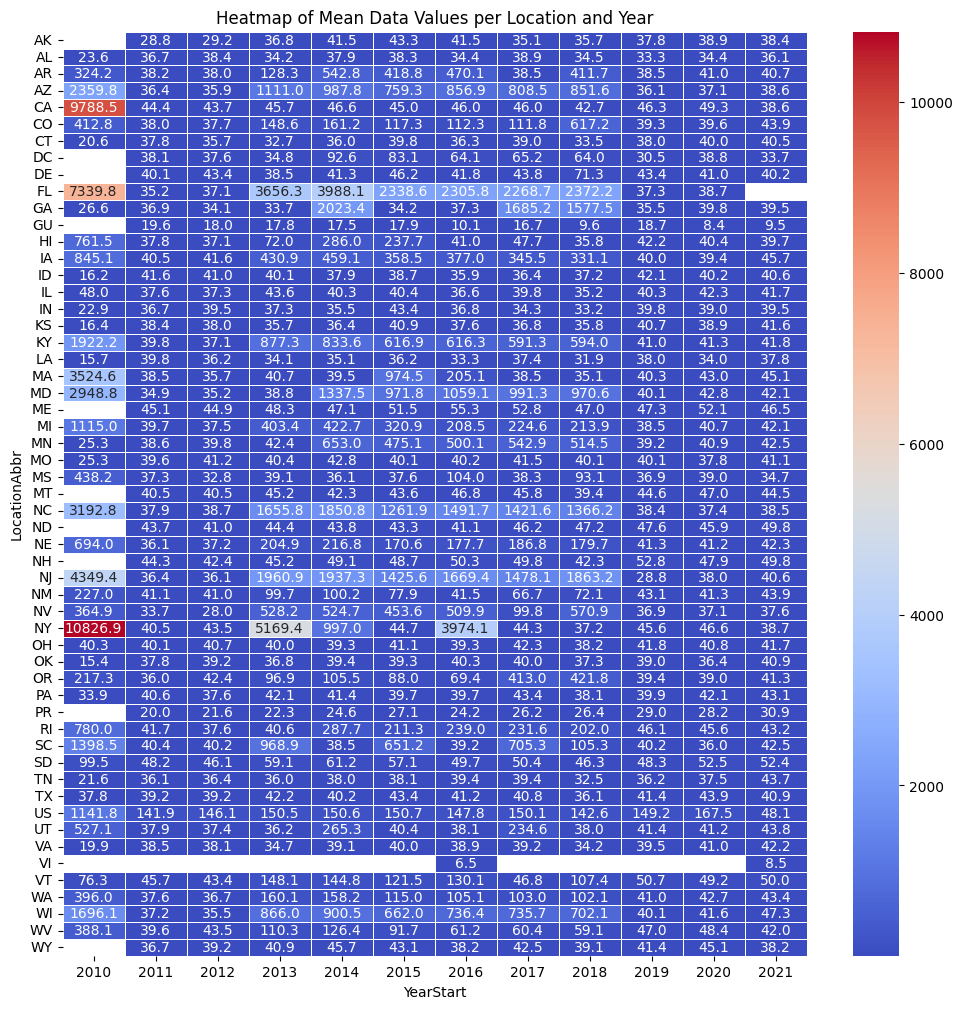

In [60]:
# heat maps:
pivot_table = asthma.pivot_table(index='LocationAbbr', columns='YearStart', values='DataValue', aggfunc='mean')
plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Heatmap of Mean Data Values per Location and Year')
plt.show()

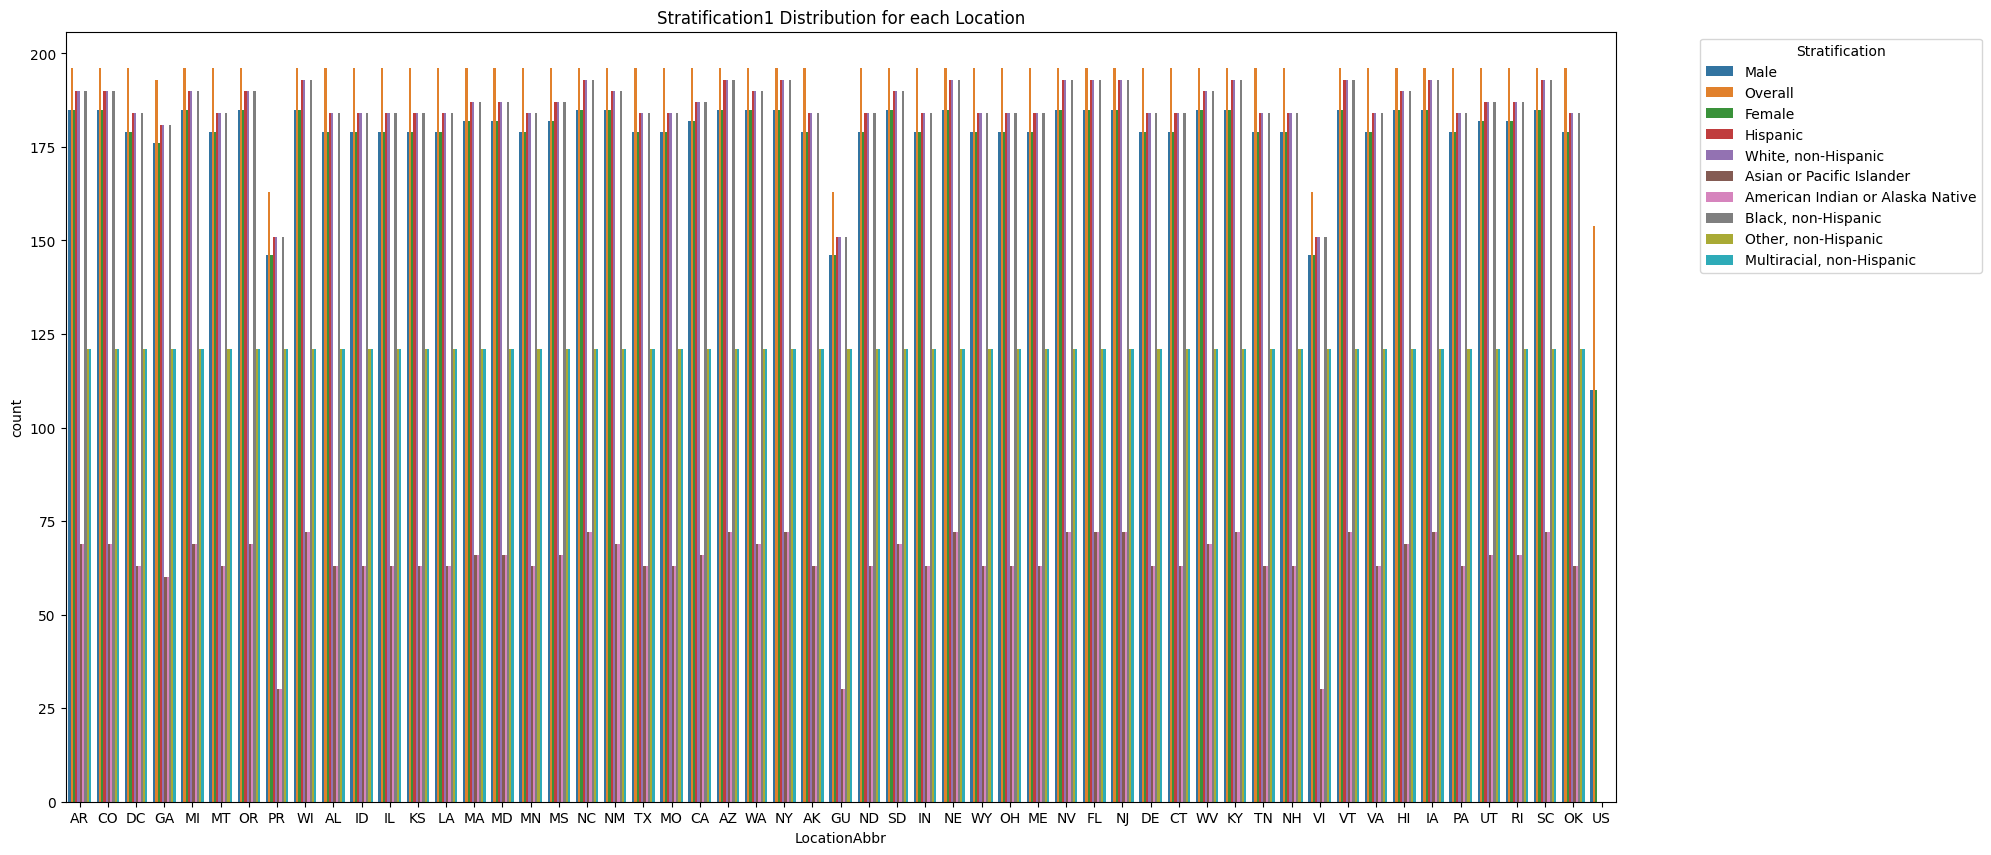

In [61]:
# Stratification1 Distribution for each Location
plt.figure(figsize=(20, 10))
sns.countplot(data=asthma, x='LocationAbbr', hue='Stratification1')
plt.title('Stratification1 Distribution for each Location')
plt.legend(title='Stratification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

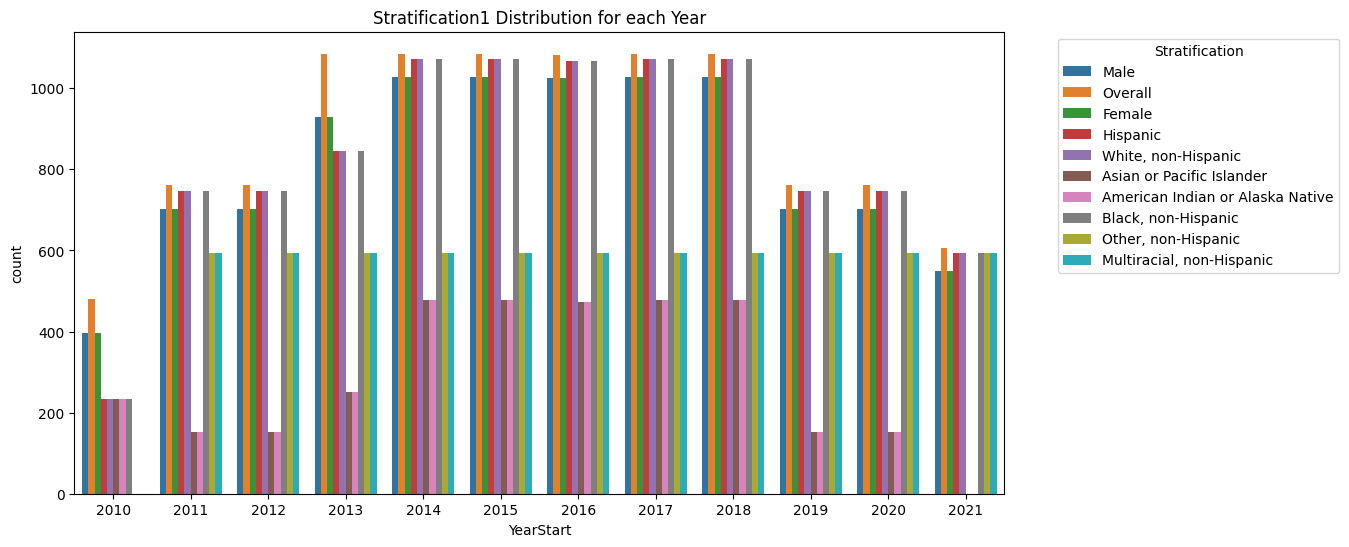

In [62]:
# Stratification1 Distribution for each Year
plt.figure(figsize=(12, 6))
sns.countplot(data=asthma, x='YearStart', hue='Stratification1')
plt.title('Stratification1 Distribution for each Year')
plt.legend(title='Stratification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

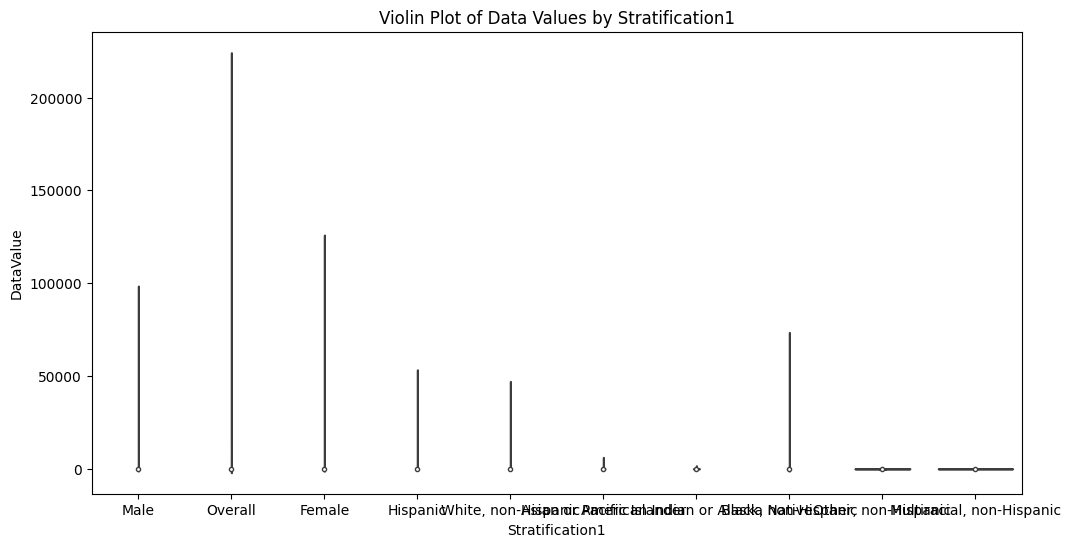

In [63]:
# Violin plot of Data Values by Stratification1
plt.figure(figsize=(12, 6))
sns.violinplot(data=asthma, x='Stratification1', y='DataValue')
plt.xlabel('Stratification1')
plt.ylabel('DataValue')
plt.title('Violin Plot of Data Values by Stratification1')
plt.show()

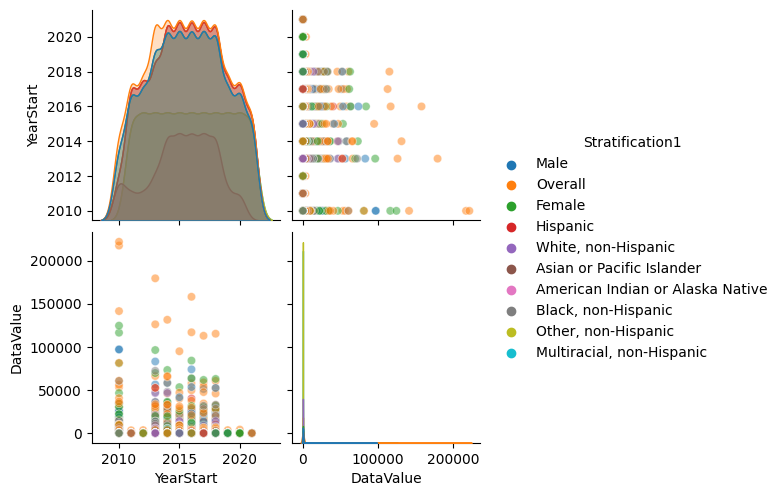

In [64]:
# Pairwise relationships for 'DataValue' and 'YearStart'
sns.pairplot(data=asthma, vars=['YearStart', 'DataValue'], hue='Stratification1', plot_kws={'alpha': 0.5})
plt.show()

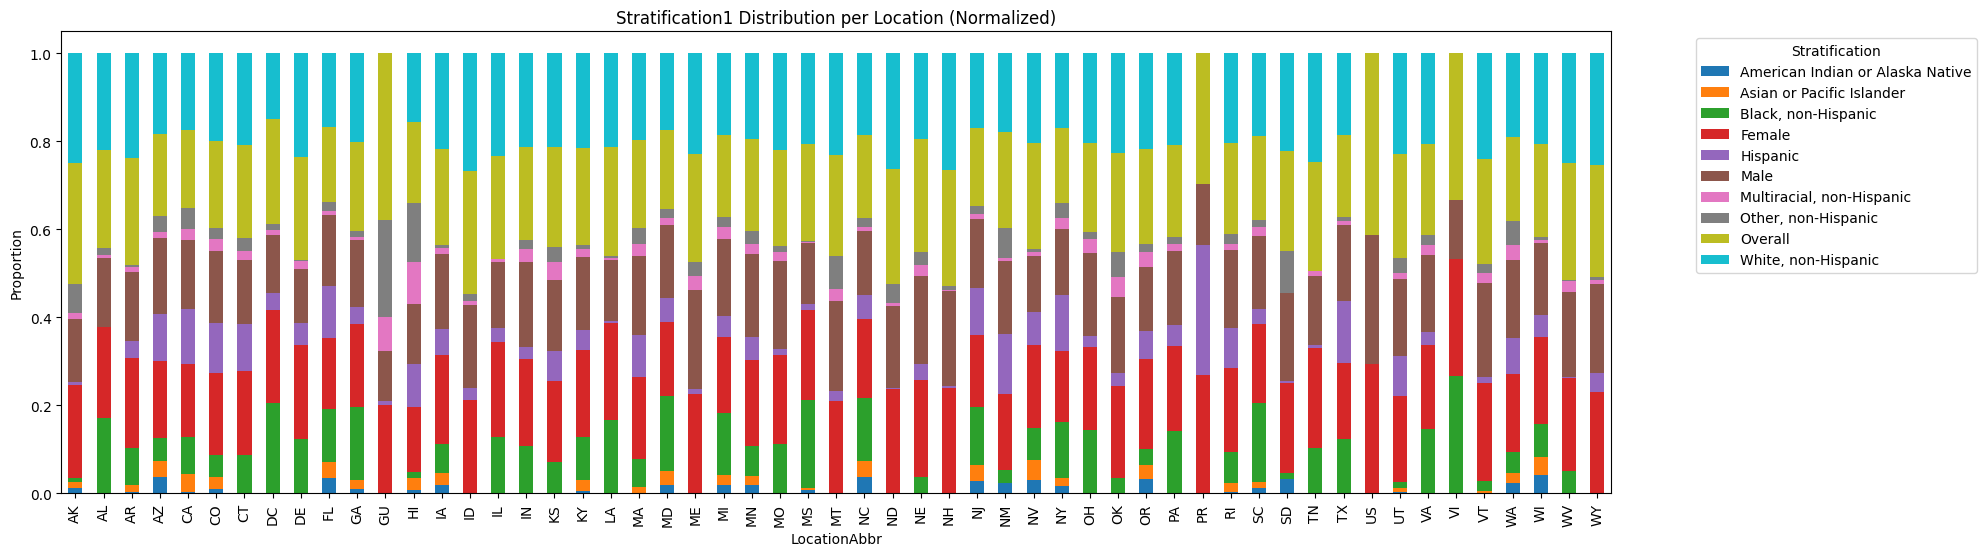

In [65]:
#Stacked bar plot of Stratification1 per Location
stacked_data = asthma.groupby(['LocationAbbr', 'Stratification1'])['DataValue'].count().unstack().fillna(0)
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)
stacked_data.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Stratification1 Distribution per Location (Normalized)')
plt.ylabel('Proportion')
plt.legend(title='Stratification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

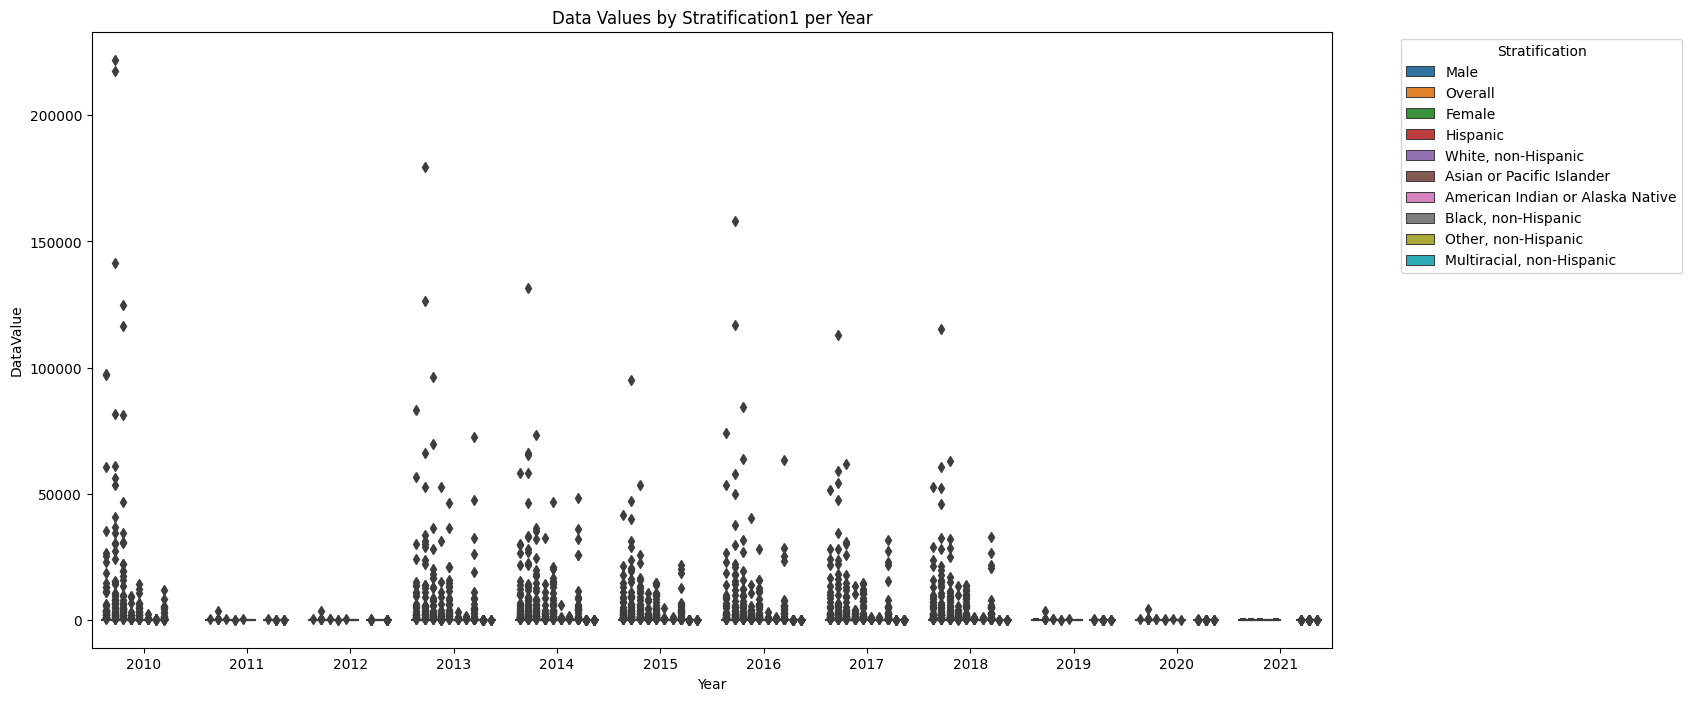

In [66]:
# Grouped box plot of Data Values by Stratification1 per Year
plt.figure(figsize=(16, 8))
sns.boxplot(data=asthma, x='YearStart', y='DataValue', hue='Stratification1')
plt.xlabel('Year')
plt.ylabel('DataValue')
plt.title('Data Values by Stratification1 per Year')
plt.legend(title='Stratification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fu

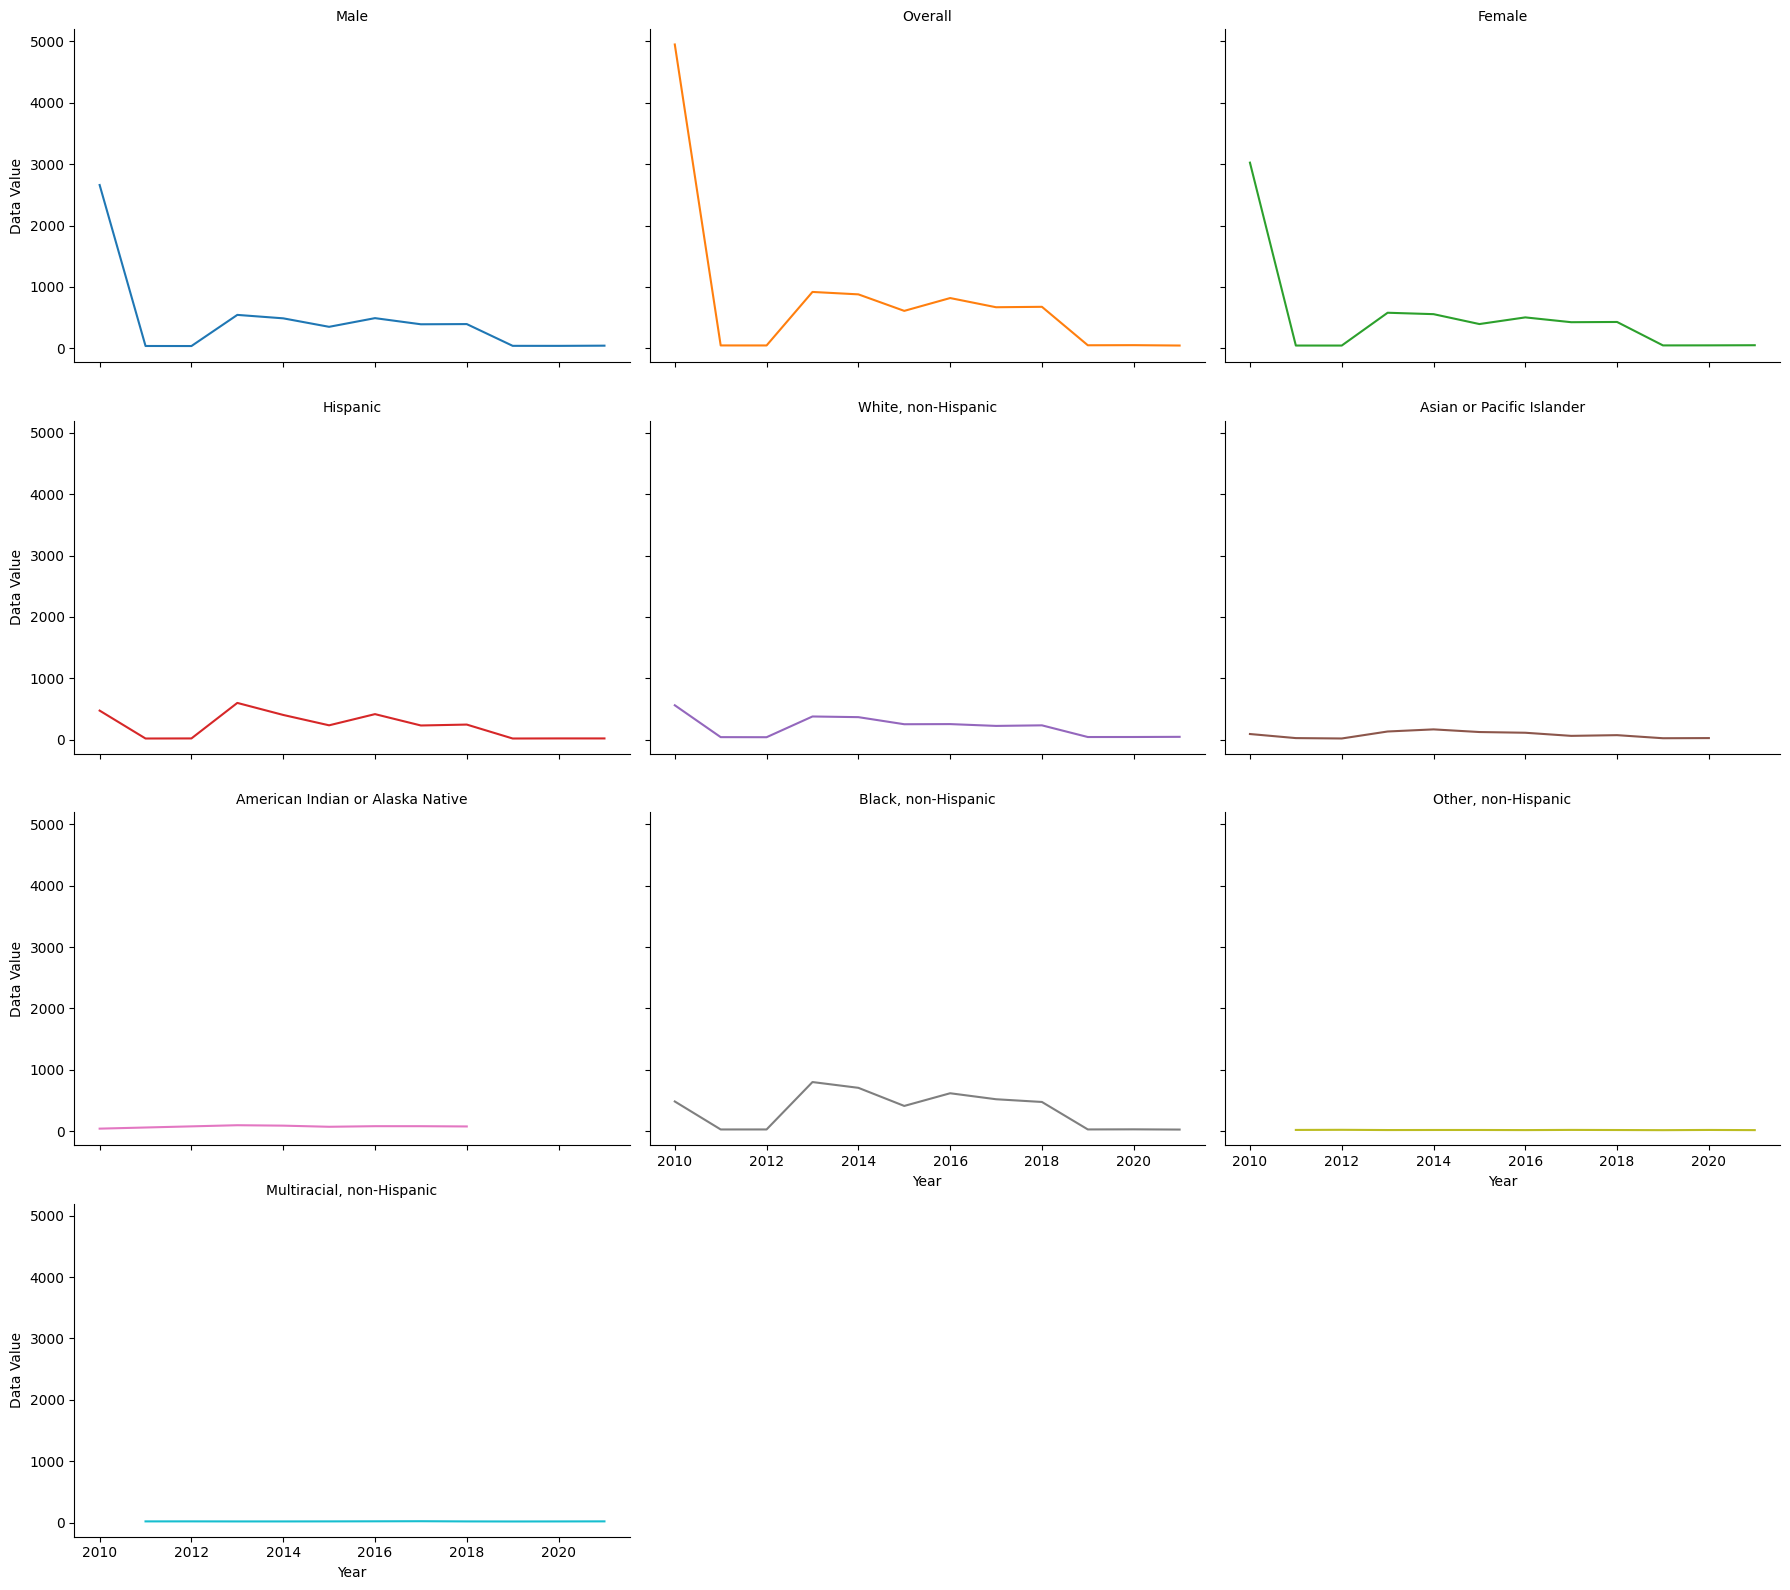

In [67]:
#Facet grid plot of Data Values by Stratification1 per Year
g = sns.FacetGrid(asthma, col='Stratification1', hue='Stratification1', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'YearStart', 'DataValue', ci=None)
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Data Value")
plt.show()

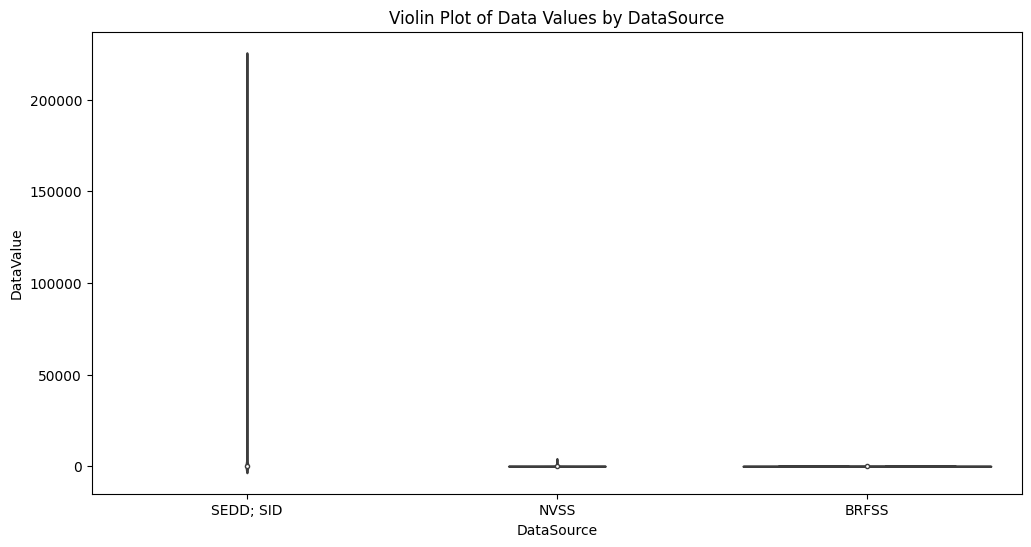

In [68]:
# Distribution of DataValue by DataSource
plt.figure(figsize=(12, 6))
sns.violinplot(data=asthma, x='DataSource', y='DataValue')
plt.xlabel('DataSource')
plt.ylabel('DataValue')
plt.title('Violin Plot of Data Values by DataSource')
plt.show()

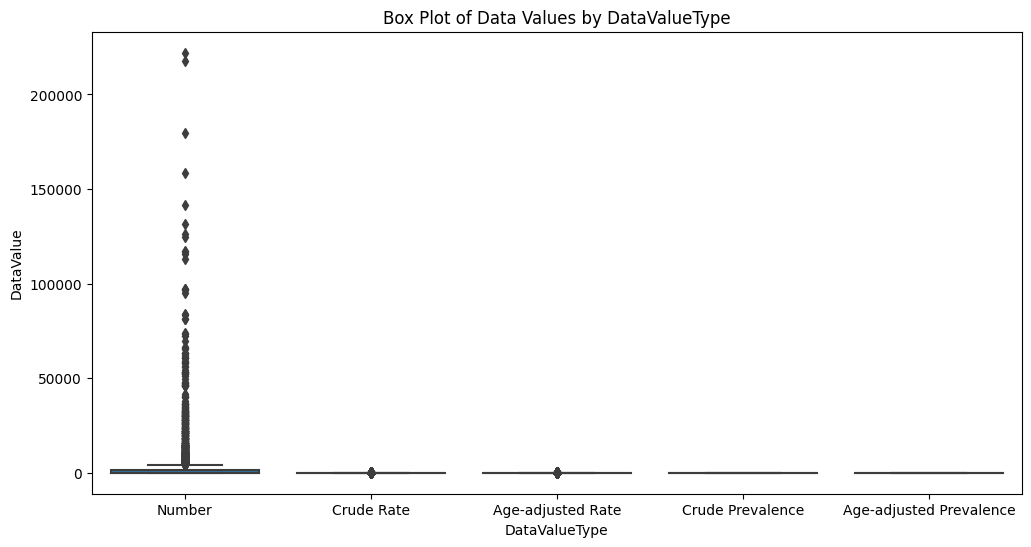

In [69]:
#  Distribution of DataValue by DataValueType
plt.figure(figsize=(12, 6))
sns.boxplot(data=asthma, x='DataValueType', y='DataValue')
plt.xlabel('DataValueType')
plt.ylabel('DataValue')
plt.title('Box Plot of Data Values by DataValueType')
plt.show()

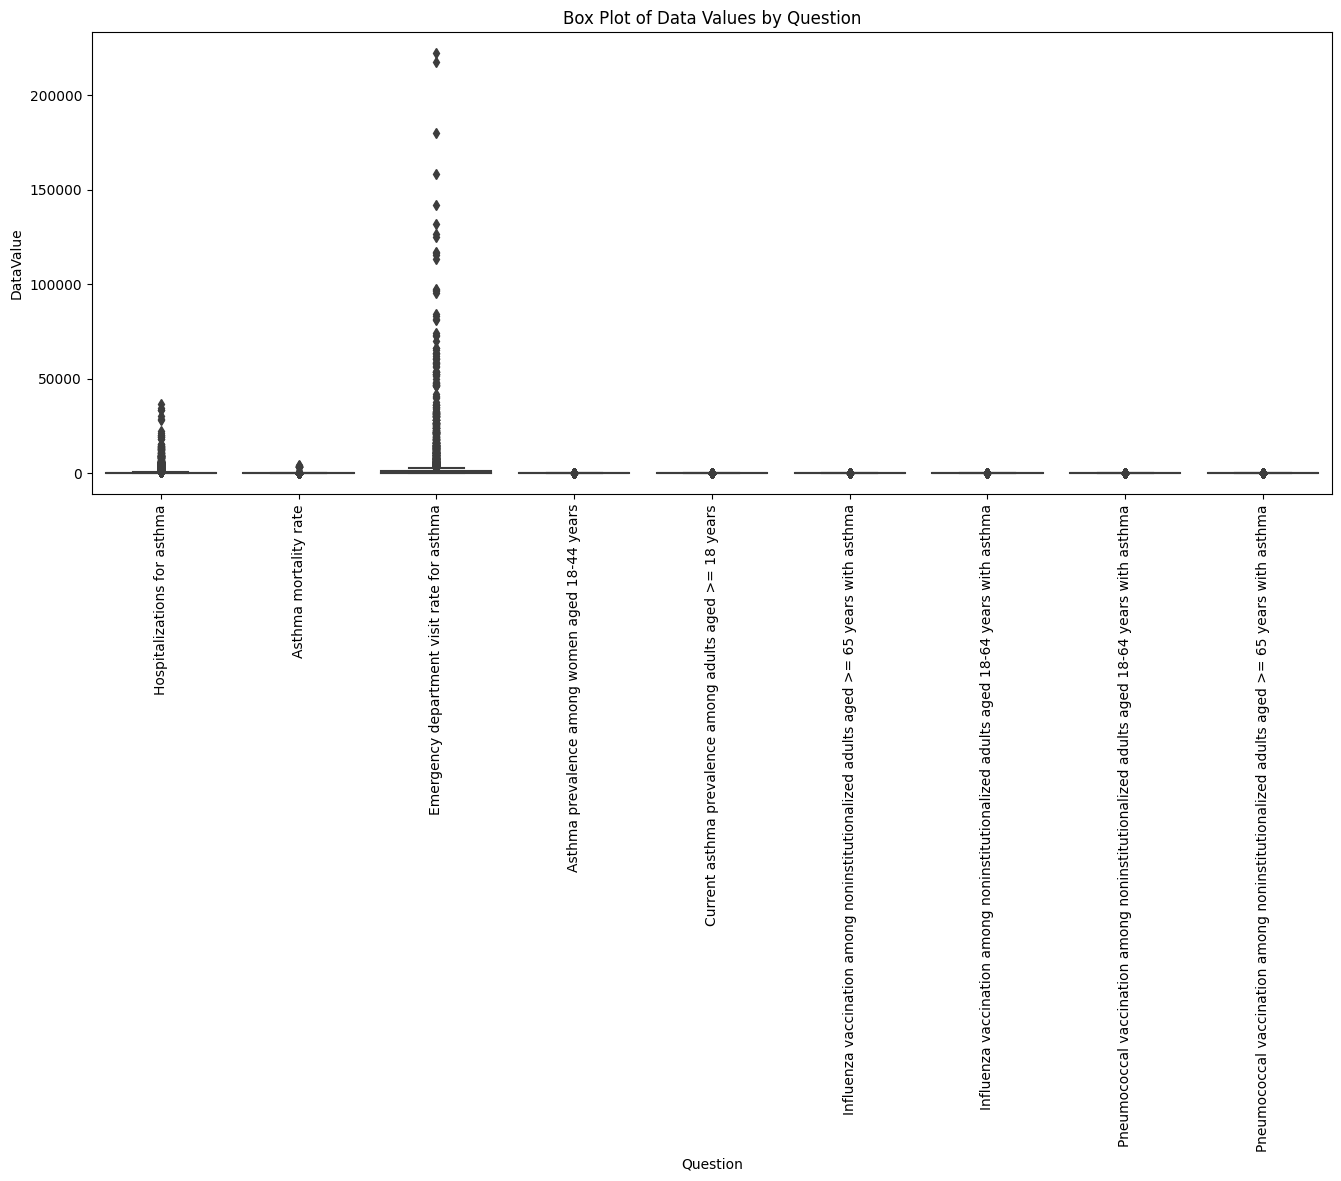

In [70]:
# Distribution of DataValue by Question
plt.figure(figsize=(16, 6))
sns.boxplot(data=asthma, x='Question', y='DataValue')
plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('DataValue')
plt.title('Box Plot of Data Values by Question')
plt.show()

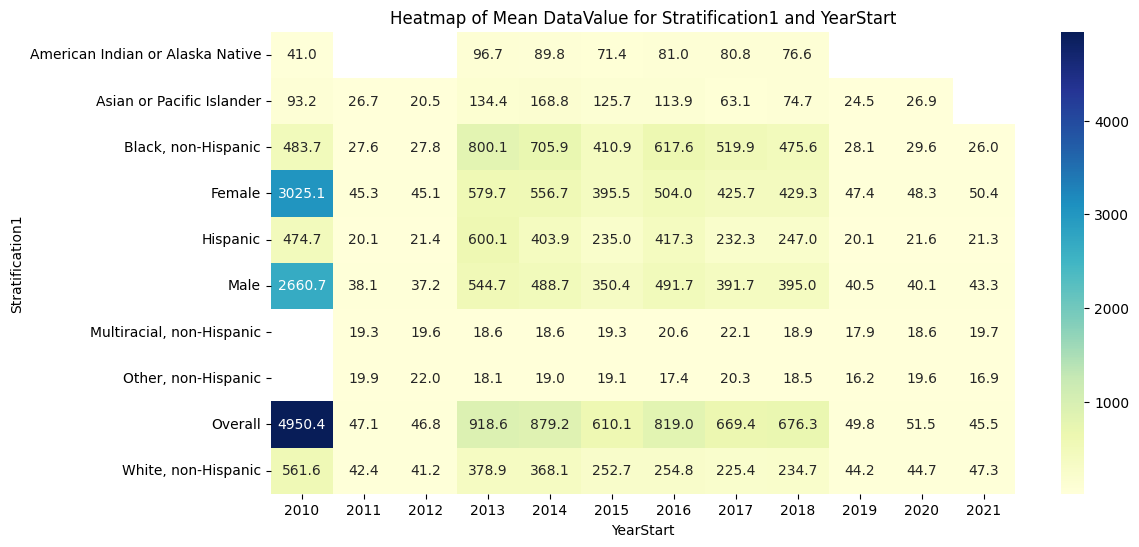

In [71]:
# Heatmap of DataValue for Stratification1 and YearStart
pivot_data = asthma.pivot_table(index='Stratification1', columns='YearStart', values='DataValue', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Mean DataValue for Stratification1 and YearStart')
plt.show()

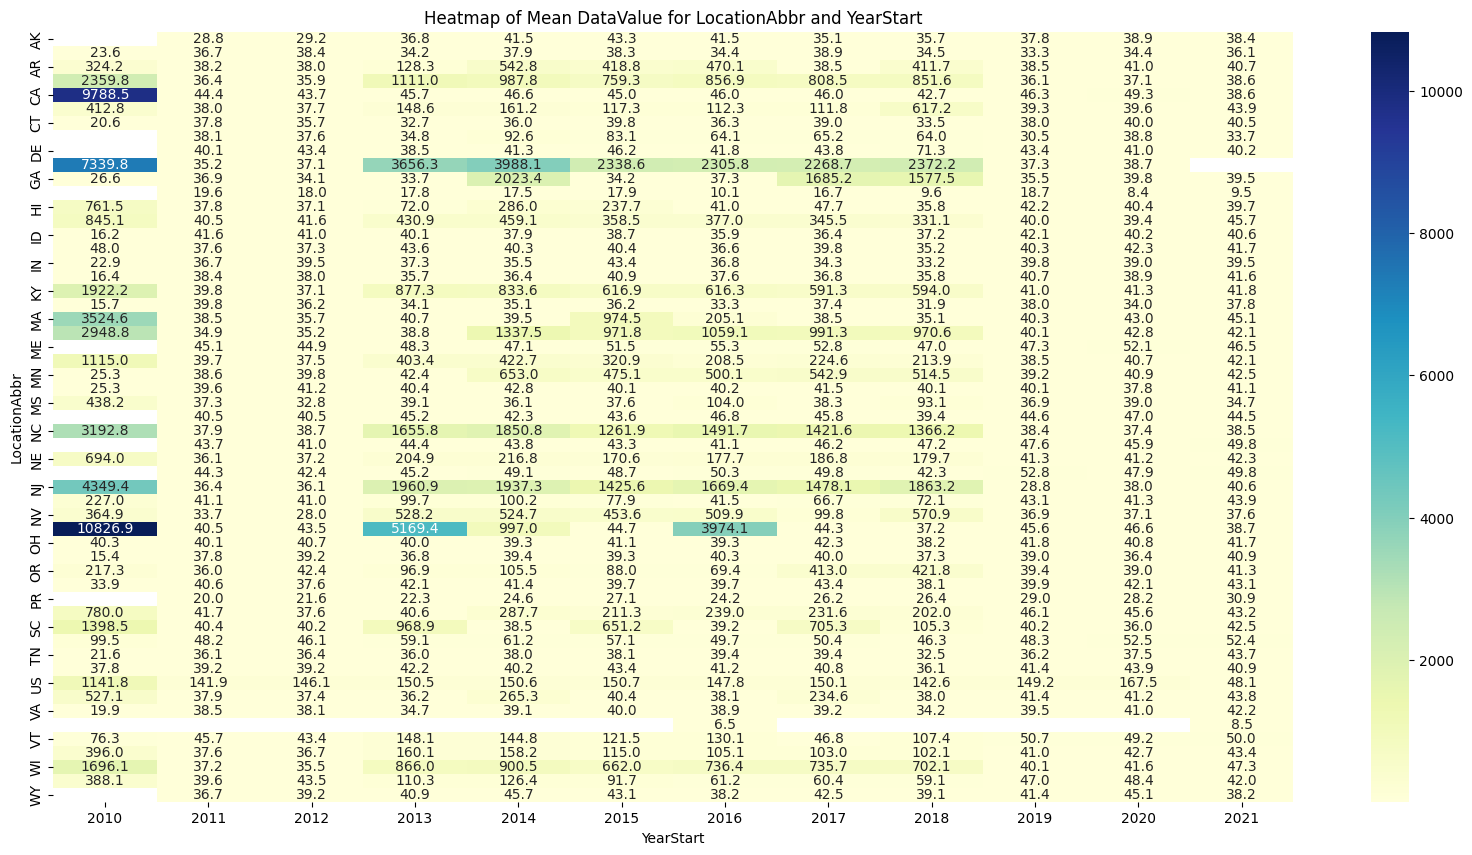

In [72]:
# Heatmap of DataValue for LocationAbbr and YearStart
pivot_data = asthma.pivot_table(index='LocationAbbr', columns='YearStart', values='DataValue', aggfunc='mean')
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Mean DataValue for LocationAbbr and YearStart')
plt.show()

/tmp/ipykernel_93/2648685332.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=asthma, x='YearStart', y='DataValue', hue='Stratification1', ci=None)


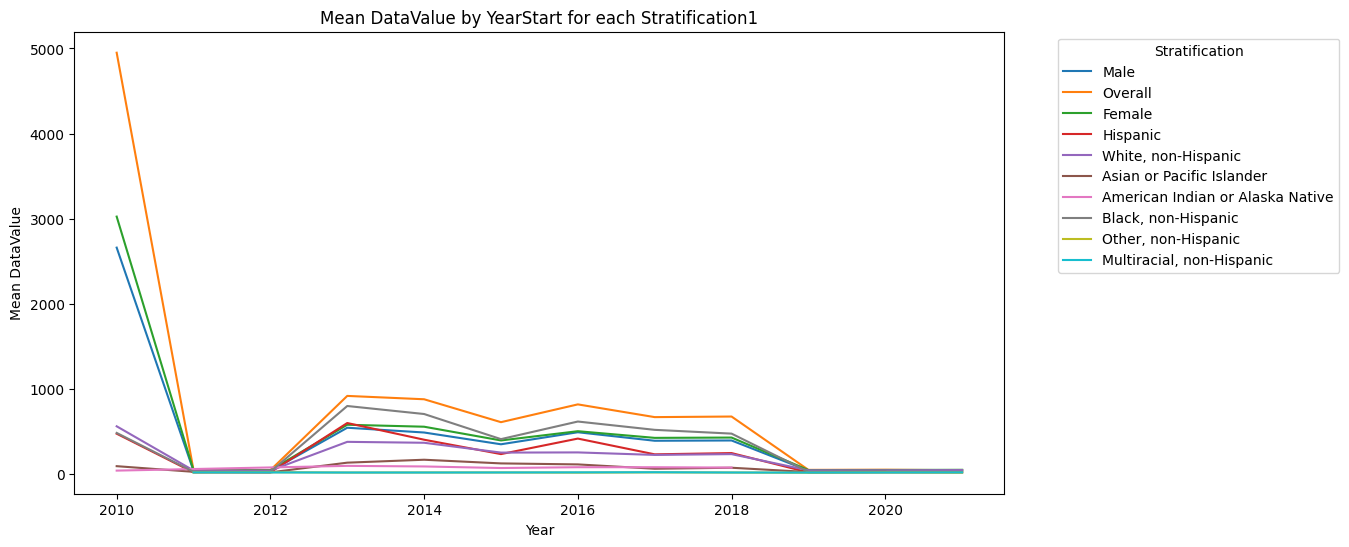

In [73]:

# Mean DataValue by YearStart for each Stratification1
plt.figure(figsize=(12, 6))
sns.lineplot(data=asthma, x='YearStart', y='DataValue', hue='Stratification1', ci=None)
plt.xlabel('Year')
plt.ylabel('Mean DataValue')
plt.title('Mean DataValue by YearStart for each Stratification1')
plt.legend(title='Stratification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_93/2620748680.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=asthma, x='YearStart', y='DataValue', hue='DataSource', ci=None)


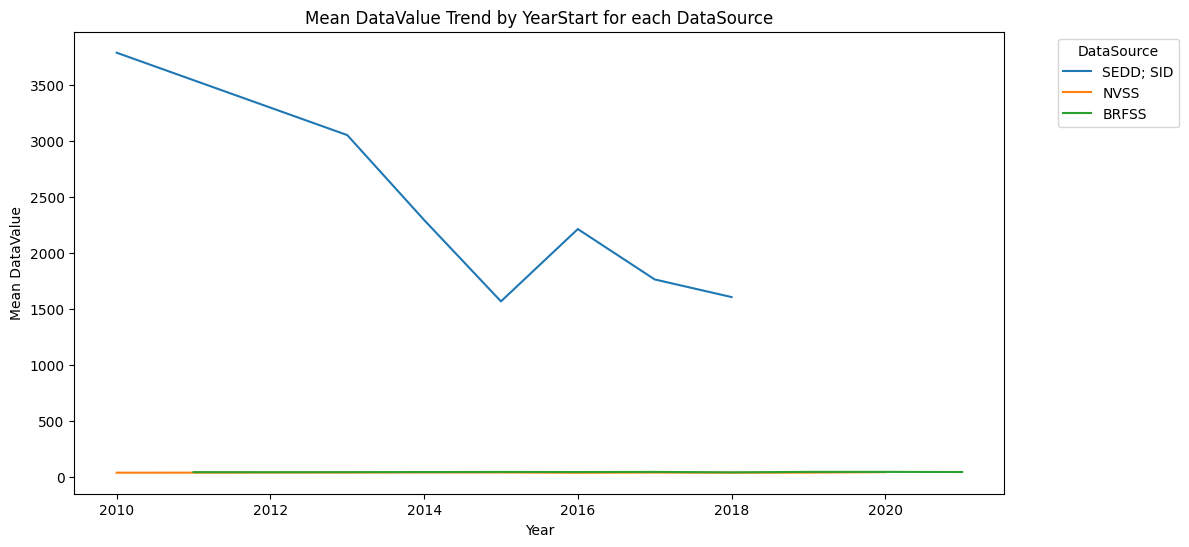

In [74]:
# Trend of Mean DataValue by YearStart for each DataSource
plt.figure(figsize=(12, 6))
sns.lineplot(data=asthma, x='YearStart', y='DataValue', hue='DataSource', ci=None)
plt.xlabel('Year')
plt.ylabel('Mean DataValue')
plt.title('Mean DataValue Trend by YearStart for each DataSource')
plt.legend(title='DataSource', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


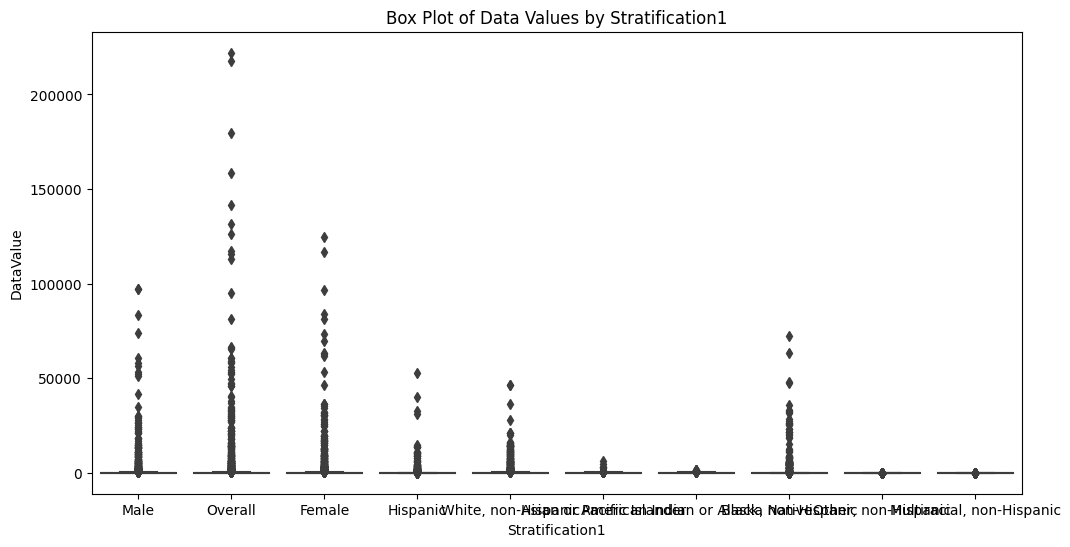

In [75]:
# Distribution of DataValue by Stratification1
plt.figure(figsize=(12, 6))
sns.boxplot(data=asthma, x='Stratification1', y='DataValue')
plt.xlabel('Stratification1')
plt.ylabel('DataValue')
plt.title('Box Plot of Data Values by Stratification1')
plt.show()

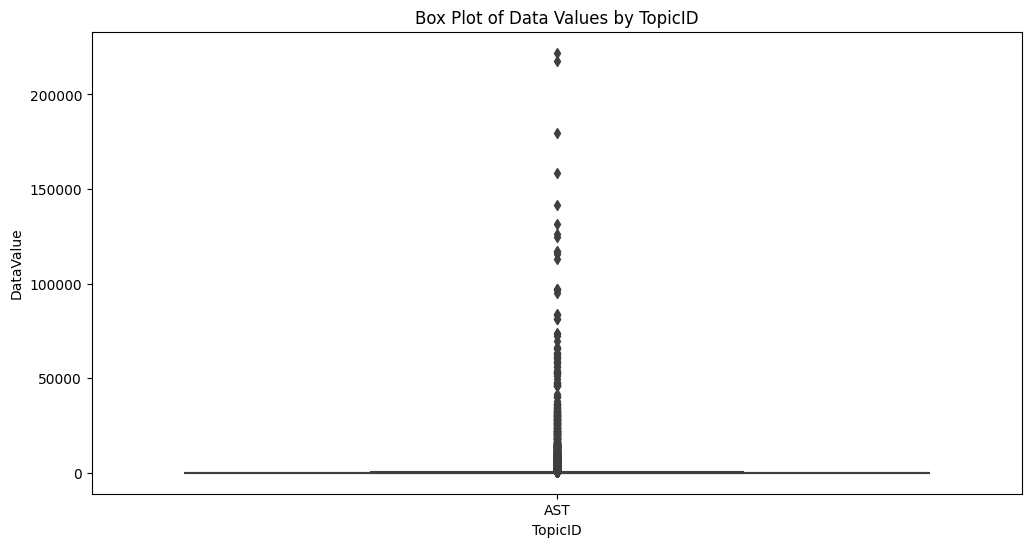

In [76]:
# Distribution of DataValue by TopicID
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TopicID', y='DataValue')
plt.xlabel('TopicID')
plt.ylabel('DataValue')
plt.title('Box Plot of Data Values by TopicID')
plt.show()

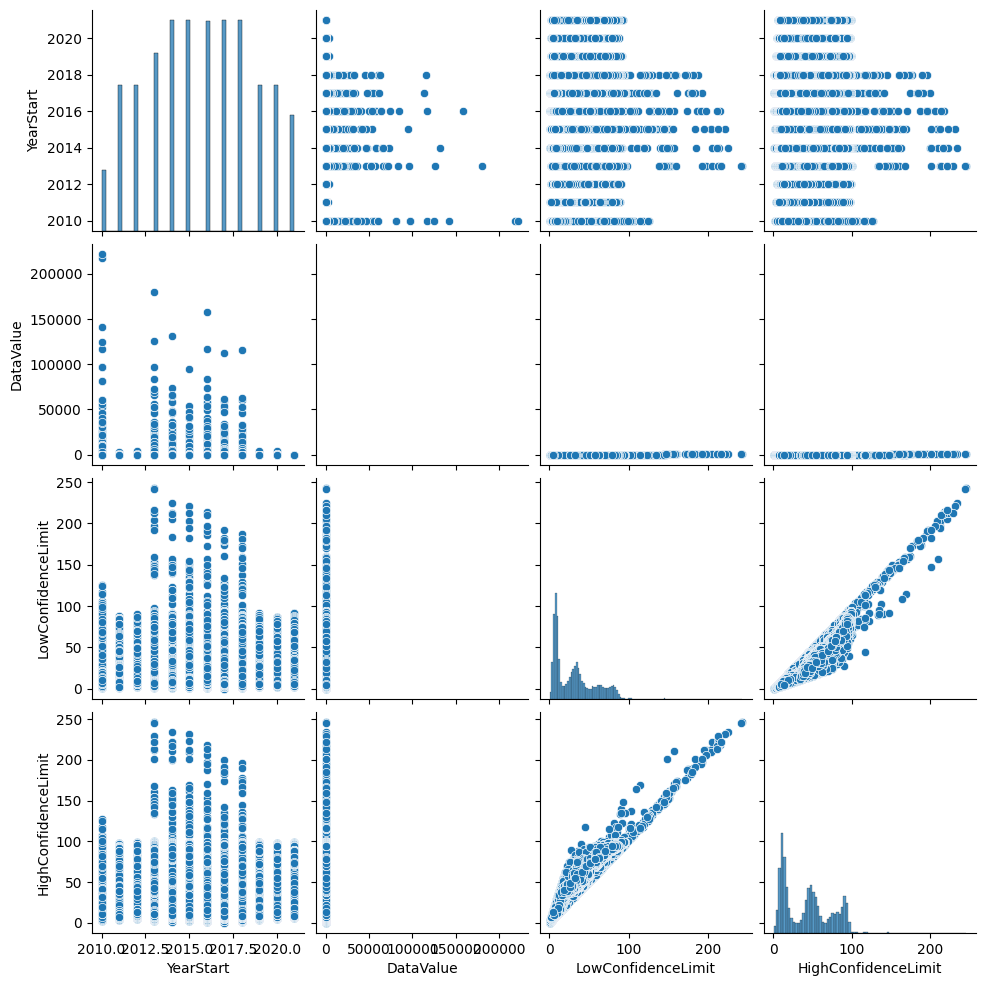

In [77]:
# Pair plot of selected numerical columns
selected_columns = ['YearStart', 'DataValue', 'LowConfidenceLimit', 'HighConfidenceLimit']
sns.pairplot(data[selected_columns])
plt.show()

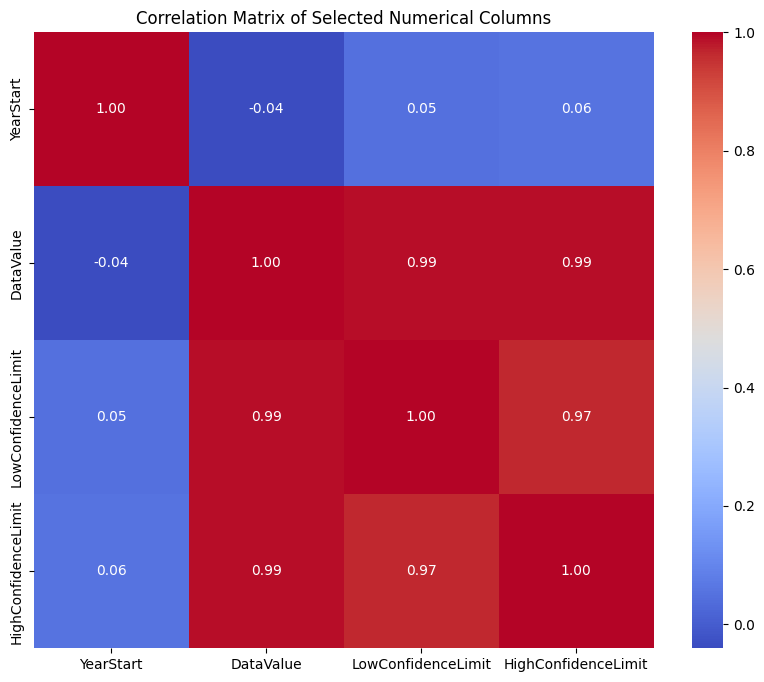

In [78]:
# Correlation matrix of selected numerical columns
correlation_matrix = asthma[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Columns')
plt.show()

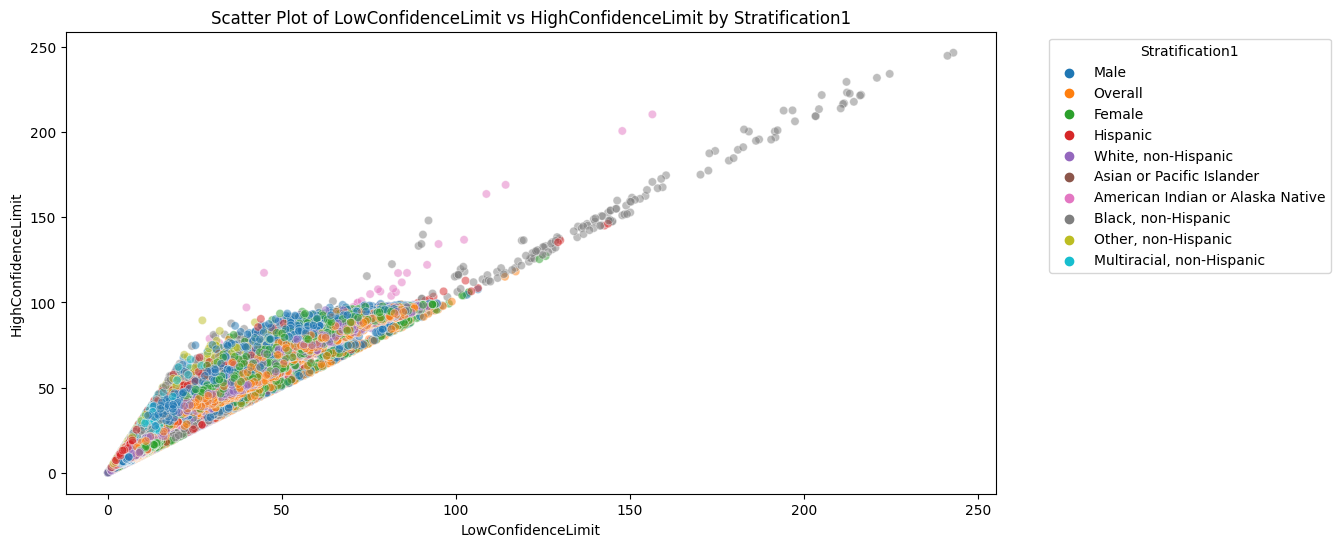

In [79]:
# Scatter plot of LowConfidenceLimit vs HighConfidenceLimit by Stratification1
plt.figure(figsize=(12, 6))
sns.scatterplot(data=asthma, x='LowConfidenceLimit', y='HighConfidenceLimit', hue='Stratification1', alpha=0.5)
plt.xlabel('LowConfidenceLimit')
plt.ylabel('HighConfidenceLimit')
plt.title('Scatter Plot of LowConfidenceLimit vs HighConfidenceLimit by Stratification1')
plt.legend(title='Stratification1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

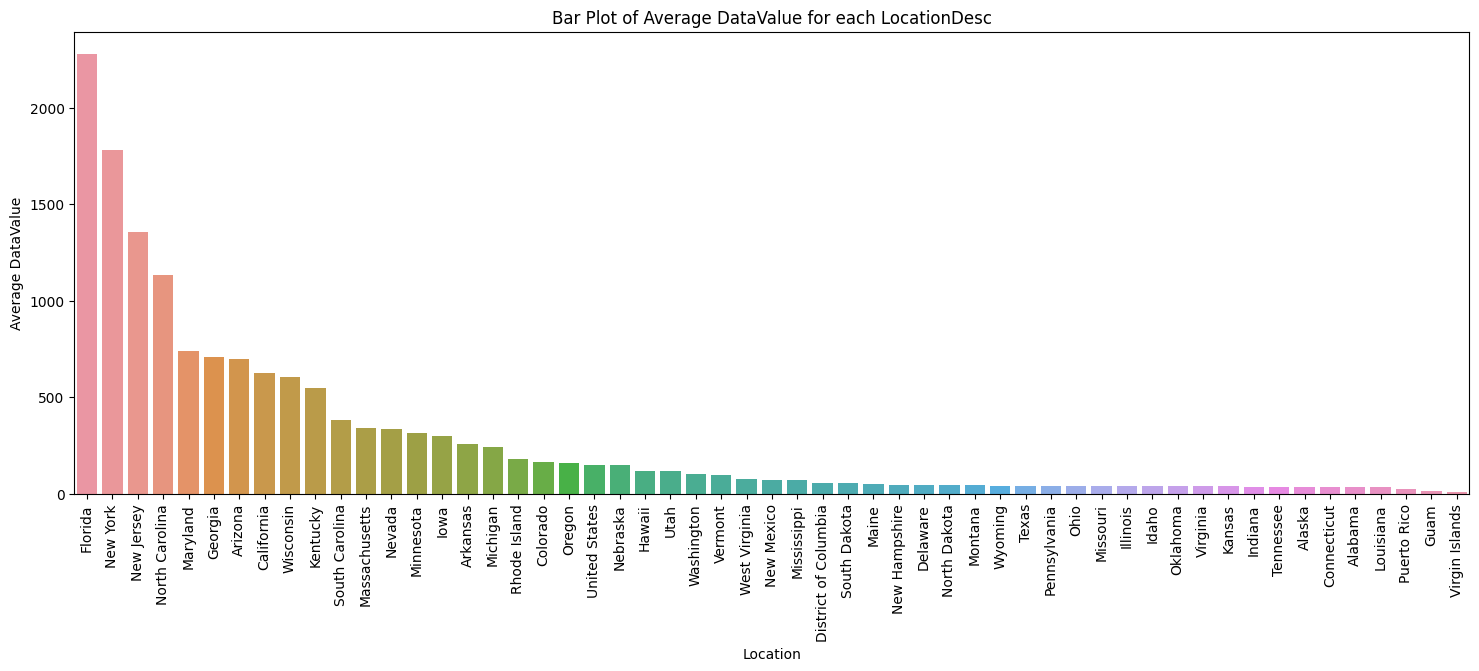

In [80]:
# Bar plot of average DataValue for each LocationDesc
average_data_value_by_location = asthma.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(18, 6))
sns.barplot(x=average_data_value_by_location.index, y=average_data_value_by_location.values)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Average DataValue')
plt.title('Bar Plot of Average DataValue for each LocationDesc')
plt.show()

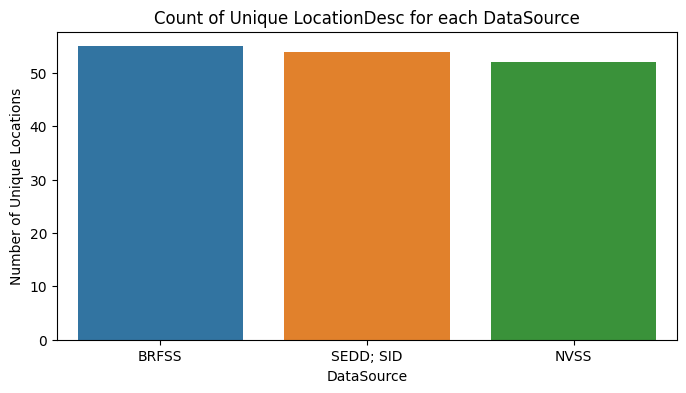

In [81]:
# Count of unique LocationDesc for each DataSource
location_counts_by_data_source = asthma.groupby('DataSource')['LocationDesc'].nunique().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=location_counts_by_data_source.index, y=location_counts_by_data_source.values)
plt.xlabel('DataSource')
plt.ylabel('Number of Unique Locations')
plt.title('Count of Unique LocationDesc for each DataSource')
plt.show()

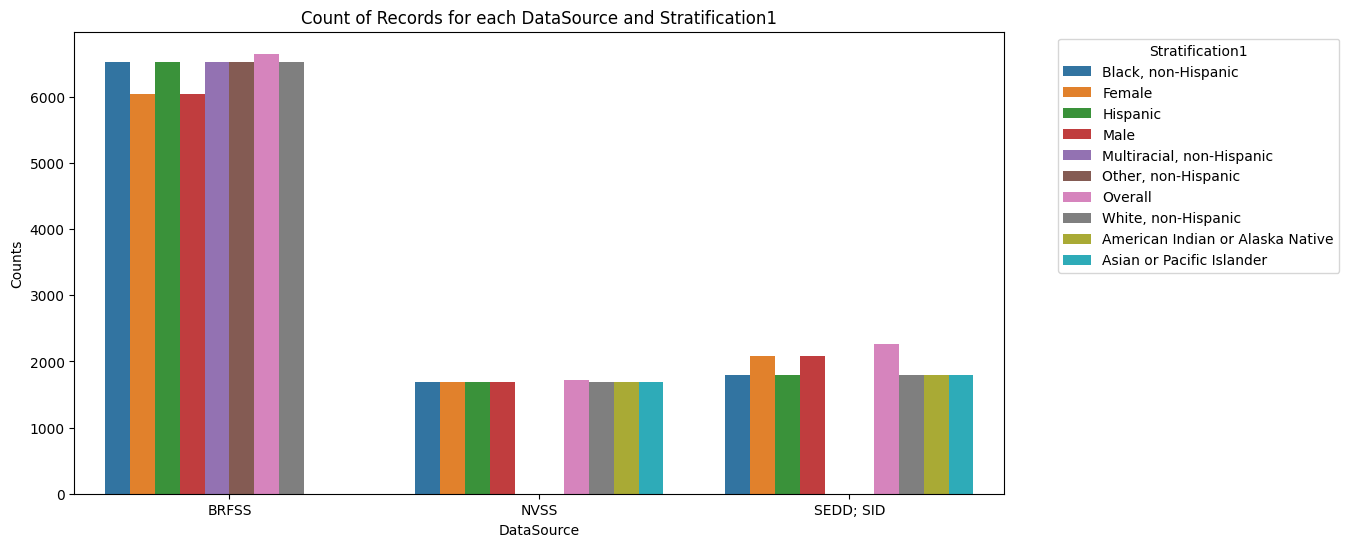

In [82]:
# Count of records for each DataSource and Stratification1
data_source_stratification_counts = asthma.groupby(['DataSource', 'Stratification1']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.barplot(data=data_source_stratification_counts, x='DataSource', y='Counts', hue='Stratification1')
plt.xlabel('DataSource')
plt.ylabel('Counts')
plt.title('Count of Records for each DataSource and Stratification1')
plt.legend(title='Stratification1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

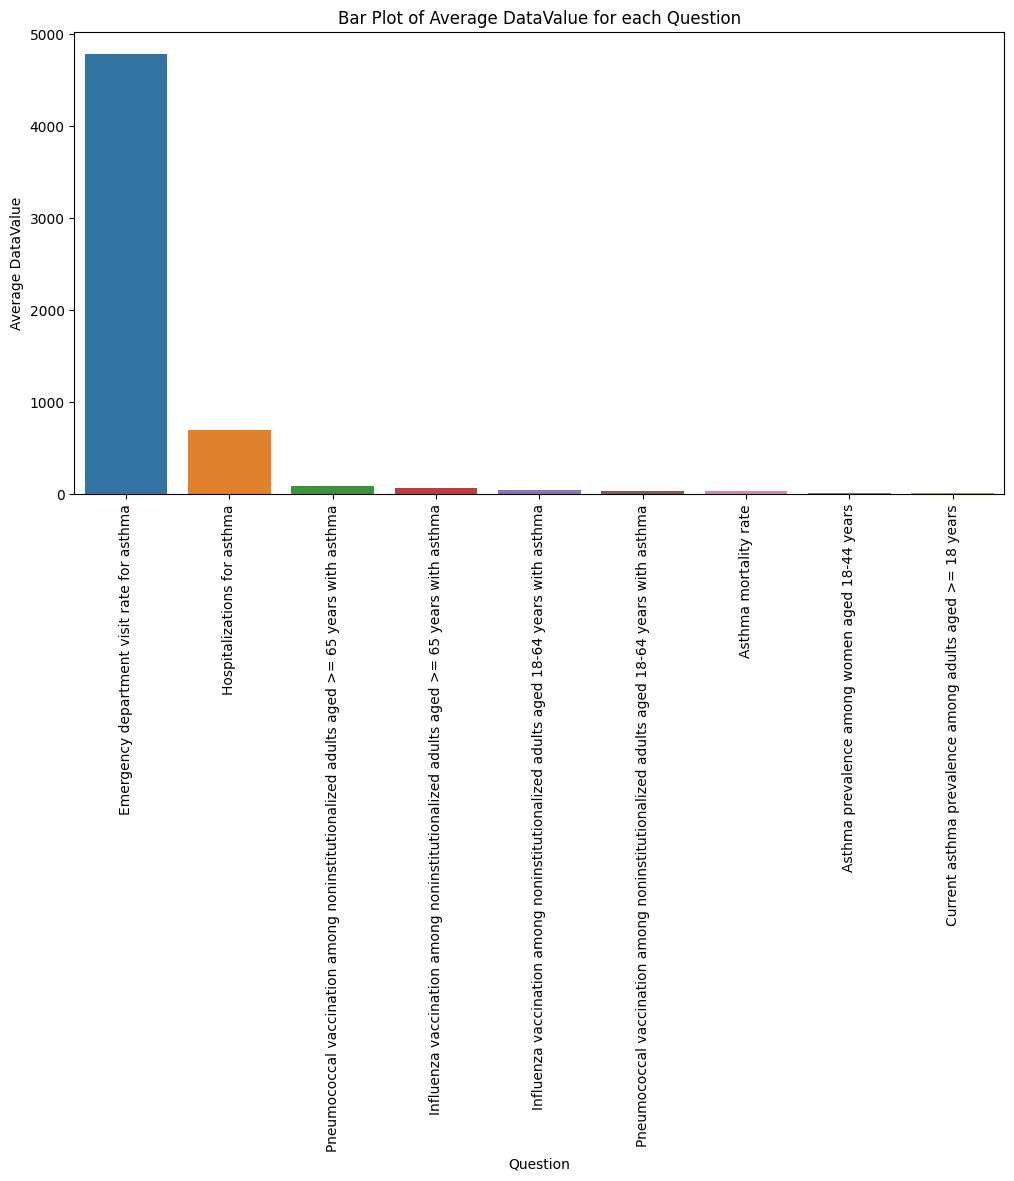

In [83]:
# Bar plot of average DataValue for each Question
average_data_value_by_question = asthma.groupby('Question')['DataValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_data_value_by_question.index, y=average_data_value_by_question.values)
plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Average DataValue')
plt.title('Bar Plot of Average DataValue for each Question')
plt.show()


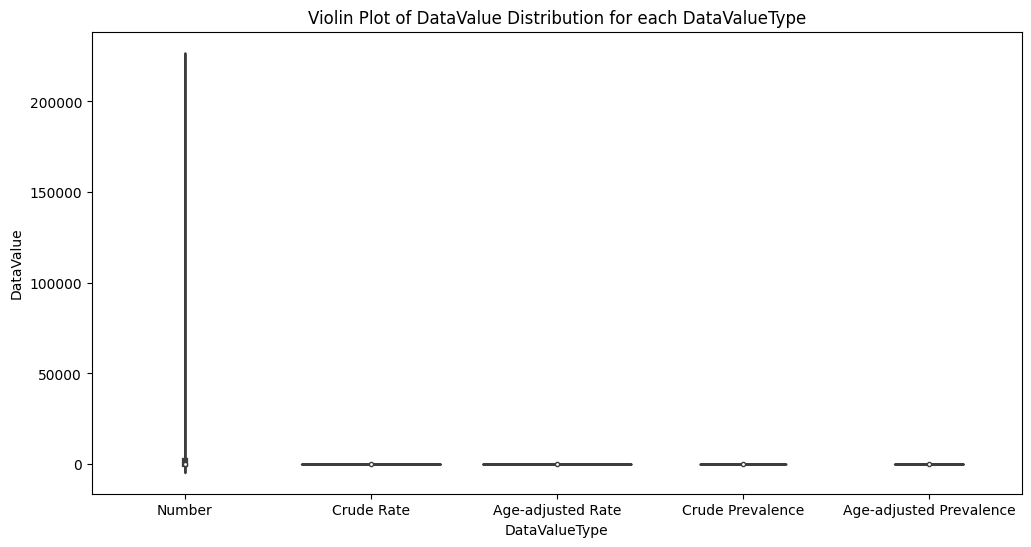

In [84]:
# Distribution of DataValue for each DataValueType
plt.figure(figsize=(12, 6))
sns.violinplot(data=asthma, x='DataValueType', y='DataValue')
plt.xlabel('DataValueType')
plt.ylabel('DataValue')
plt.title('Violin Plot of DataValue Distribution for each DataValueType')
plt.show()

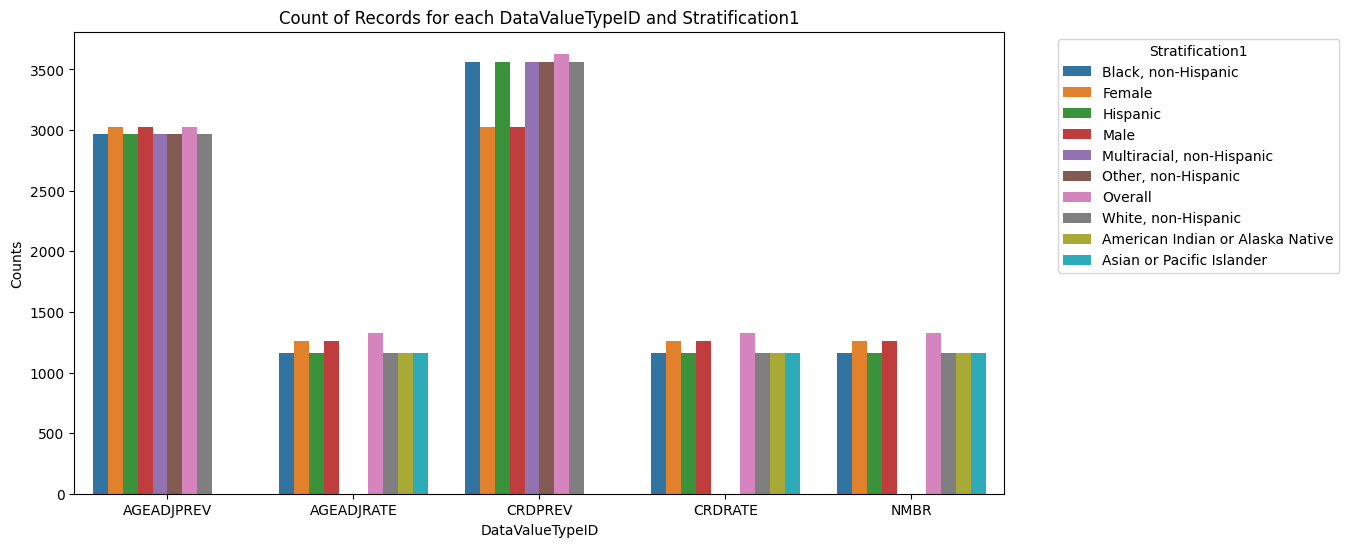

In [85]:
# Bar plot of counts for each DataValueTypeID by Stratification1
data_value_type_stratification_counts = asthma.groupby(['DataValueTypeID', 'Stratification1']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.barplot(data=data_value_type_stratification_counts, x='DataValueTypeID', y='Counts', hue='Stratification1')
plt.xlabel('DataValueTypeID')
plt.ylabel('Counts')
plt.title('Count of Records for each DataValueTypeID and Stratification1')
plt.legend(title='Stratification1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [86]:
# import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#import seaborn as sns
#import matplotlib.pyplot as plt

# Drop irrelevant columns
data_reduced = asthma.drop(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
                          'DataValueUnit', 'DataValueType', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
                          'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3',
                          'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
                          'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
                          'StratificationCategoryID3', 'StratificationID3'], axis=1)

# Drop rows with missing values
data_reduced = data_reduced.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data_reduced['StratificationCategory1'] = label_encoder.fit_transform(data_reduced['StratificationCategory1'])
data_reduced['Stratification1'] = label_encoder.fit_transform(data_reduced['Stratification1'])

# Standardize the dataset
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_reduced)

# Perform PCA and t-SNE
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=1000)
data_tsne = tsne.fit_transform(data_standardized)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


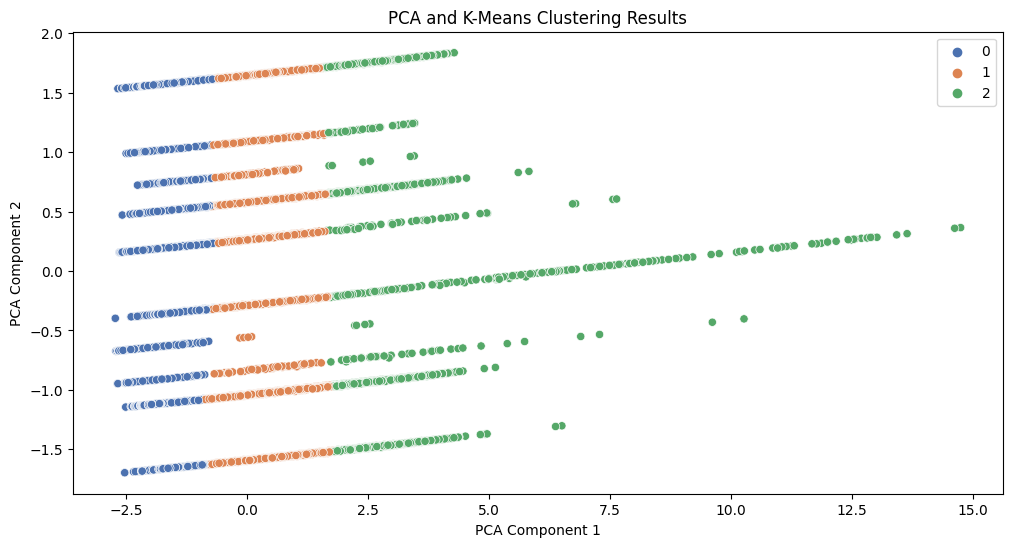

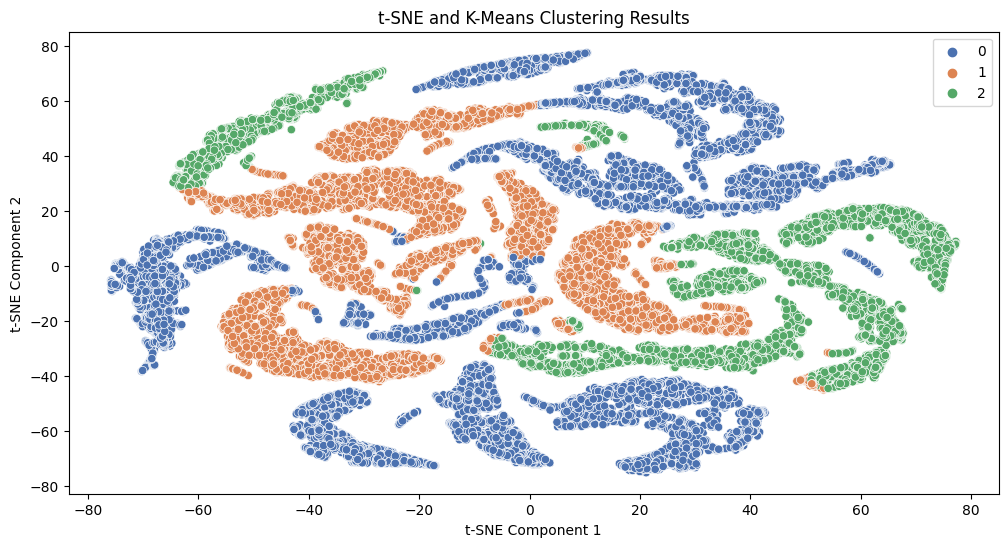

In [87]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_standardized)

# Visualize PCA and K-Means clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette="deep")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA and K-Means Clustering Results')
plt.show()

# Visualize t-SNE and K-Means clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=kmeans_labels, palette="deep")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE and K-Means Clustering Results')
plt.show()

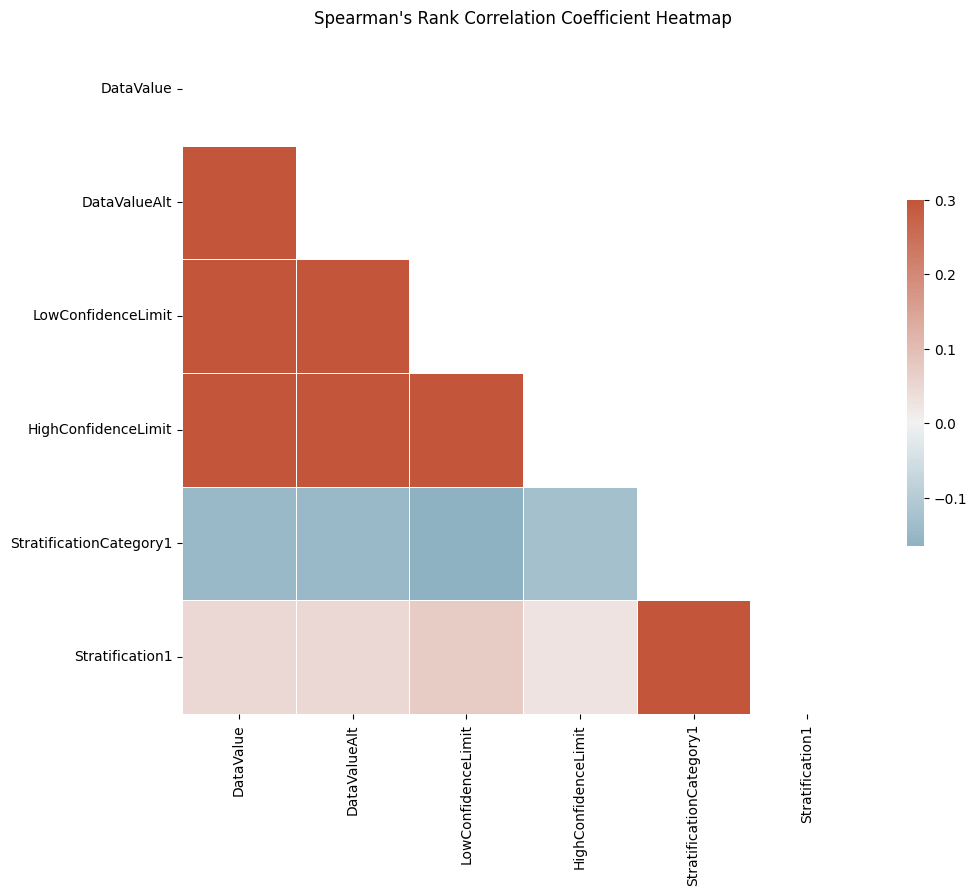

In [88]:
# Compute Spearman's rank correlation coefficient
corr_matrix = data_reduced.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Spearman's Rank Correlation Coefficient Heatmap")
plt.show()

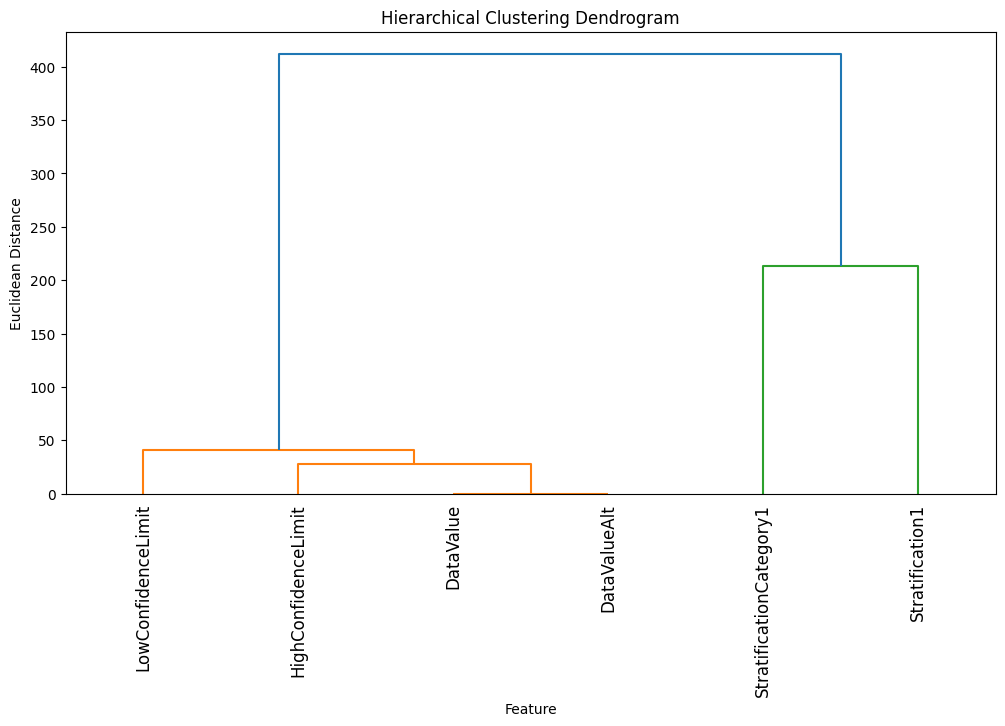

In [89]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
linkage_matrix = linkage(data_standardized.T, method='ward')

# Visualize the hierarchical clustering as a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=data_reduced.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Euclidean Distance')
plt.show()

In [90]:
# asthma prevalence over time
import plotly.express as px

# Filter the dataset for the variables of interest
prevalence_data = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years'][['YearStart', 'LocationAbbr', 'LocationDesc', 'Stratification1', 'DataValue']]

# Filter for overall prevalence data
prevalence_data = prevalence_data[prevalence_data['Stratification1'] == 'Overall']

# Create an interactive choropleth map
fig = px.choropleth(prevalence_data,
                    locations='LocationAbbr',
                    locationmode='USA-states',
                    color='DataValue',
                    animation_frame='YearStart',
                    color_continuous_scale='Viridis',
                    range_color=(prevalence_data['DataValue'].min(), prevalence_data['DataValue'].max()),
                    scope='usa',
                    labels={'DataValue': 'Asthma Prevalence (%)'},
                    title='Asthma Prevalence Among Adults Aged >= 18 Years in the USA')

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

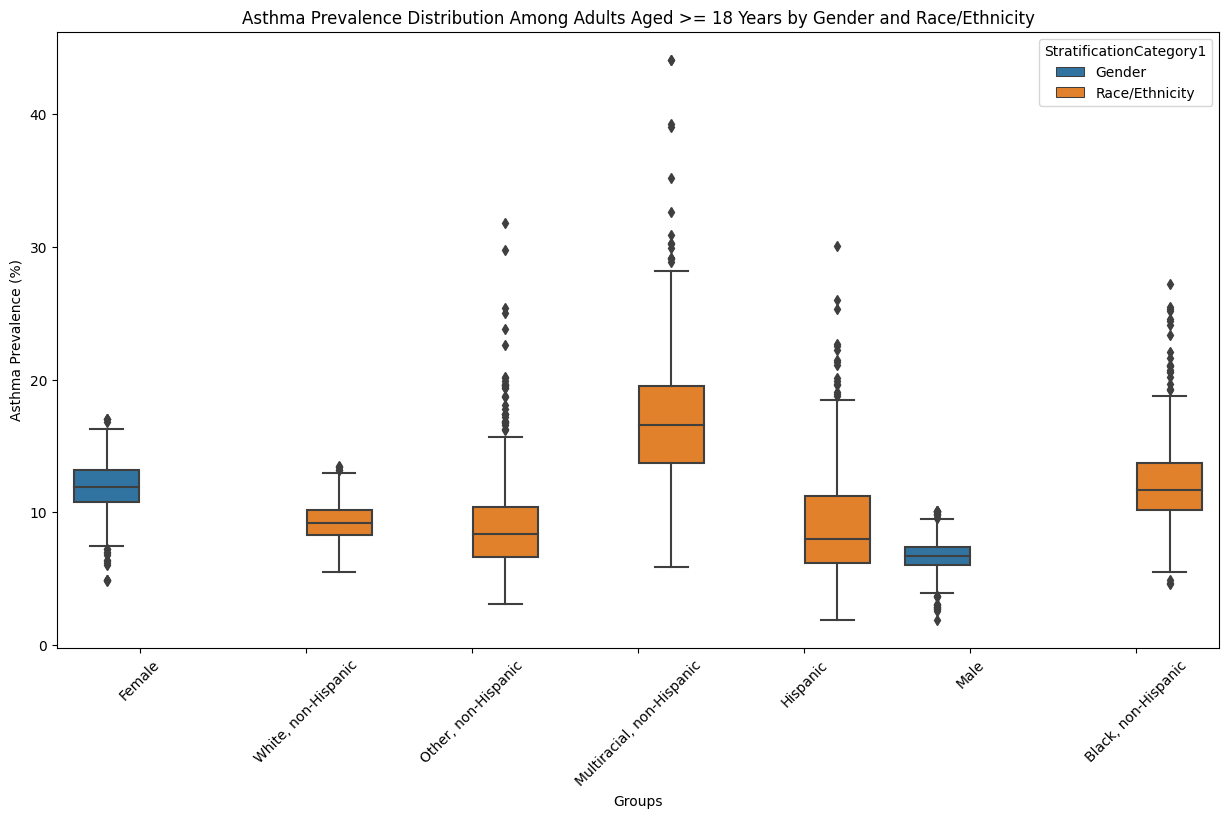

In [91]:
# asthma prevalence among different gender and race/ethnicity
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for the variables of interest
prevalence_data = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years'][['YearStart', 'LocationAbbr', 'LocationDesc', 'StratificationCategory1', 'Stratification1', 'DataValue']]

# Filter out overall prevalence data
prevalence_data = prevalence_data[prevalence_data['Stratification1'] != 'Overall']

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Stratification1', y='DataValue', hue='StratificationCategory1', data=prevalence_data)
plt.xlabel('Groups')
plt.ylabel('Asthma Prevalence (%)')
plt.title('Asthma Prevalence Distribution Among Adults Aged >= 18 Years by Gender and Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

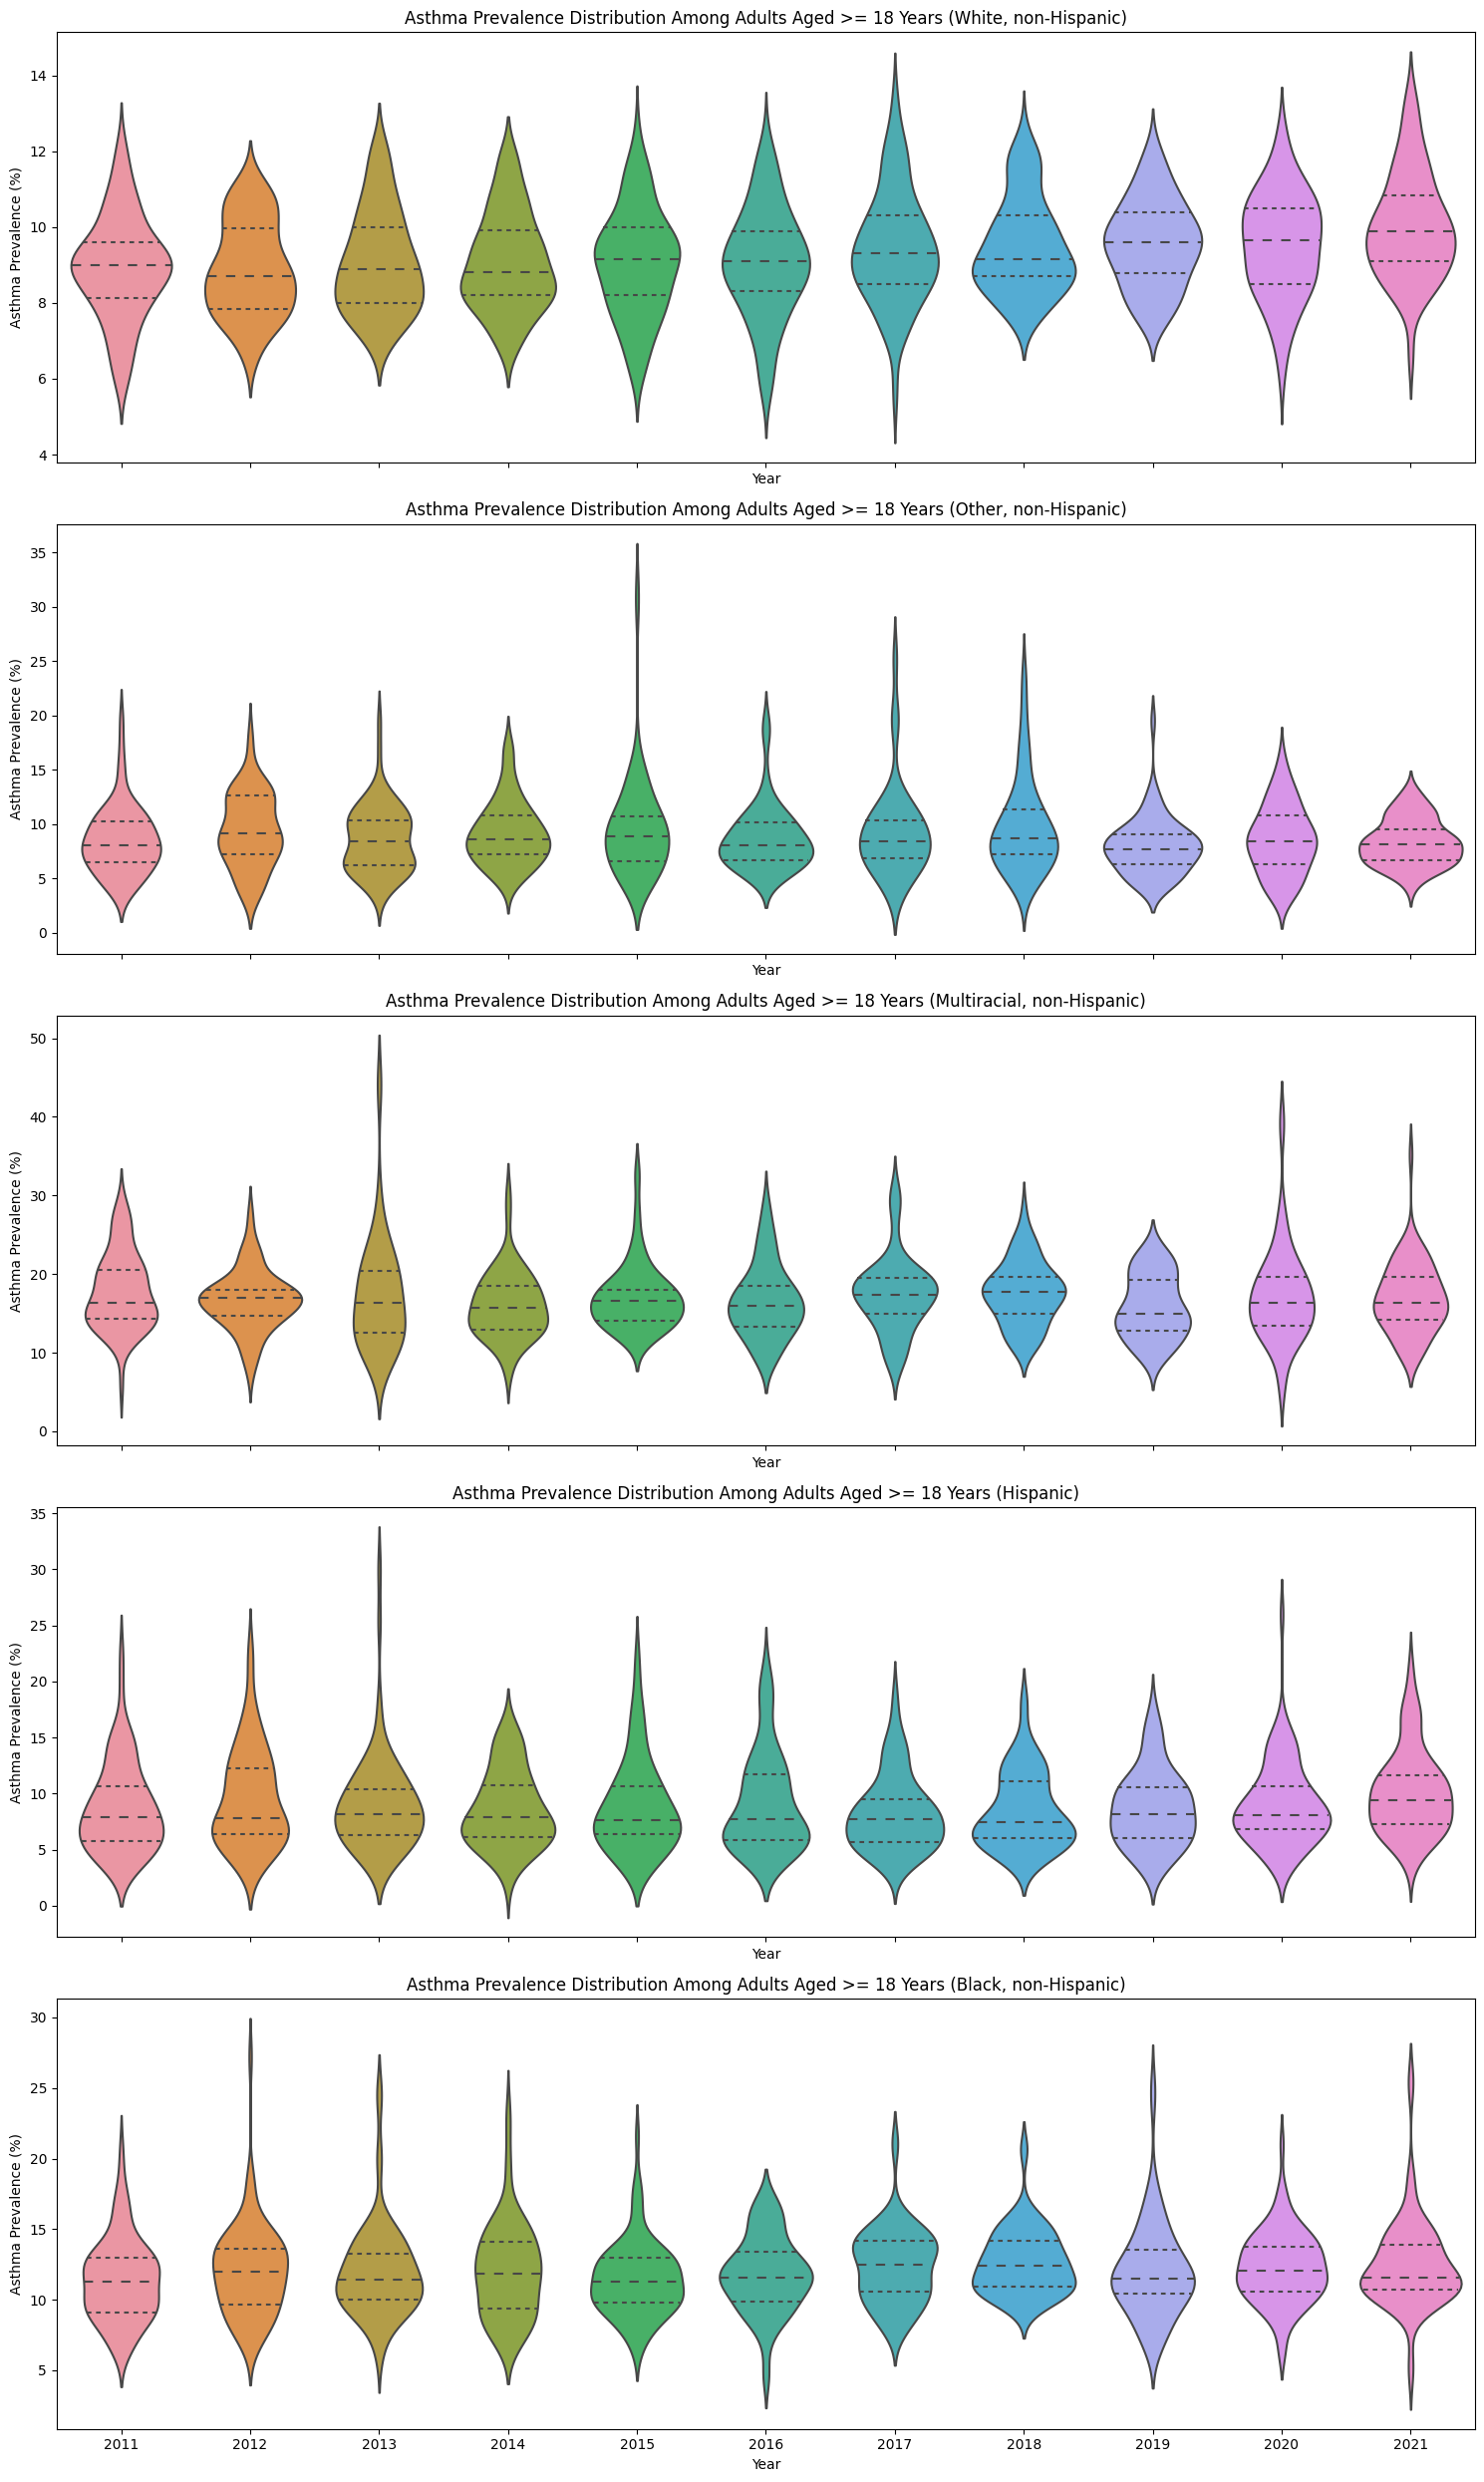

In [92]:
# visualize the distribution of asthma prevalence among different race/ethnicity groups across multiple years.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for the variables of interest
prevalence_data = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years'][['YearStart', 'LocationAbbr', 'LocationDesc', 'StratificationCategory1', 'Stratification1', 'DataValue']]

# Filter out overall and gender-specific prevalence data
prevalence_data = prevalence_data[(prevalence_data['Stratification1'] != 'Overall') & (prevalence_data['StratificationCategory1'] == 'Race/Ethnicity')]

# Get unique race/ethnicity groups
race_ethnicity_groups = prevalence_data['Stratification1'].unique()

# Create a violin plot for each race/ethnicity group
fig, axes = plt.subplots(nrows=len(race_ethnicity_groups), ncols=1, figsize=(15, 25), sharex=True)
for i, group in enumerate(race_ethnicity_groups):
    group_data = prevalence_data[prevalence_data['Stratification1'] == group]
    sns.violinplot(ax=axes[i], x='YearStart', y='DataValue', data=group_data, inner='quartile')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Asthma Prevalence (%)')
    axes[i].set_title(f'Asthma Prevalence Distribution Among Adults Aged >= 18 Years ({group})')

plt.tight_layout()
plt.show()

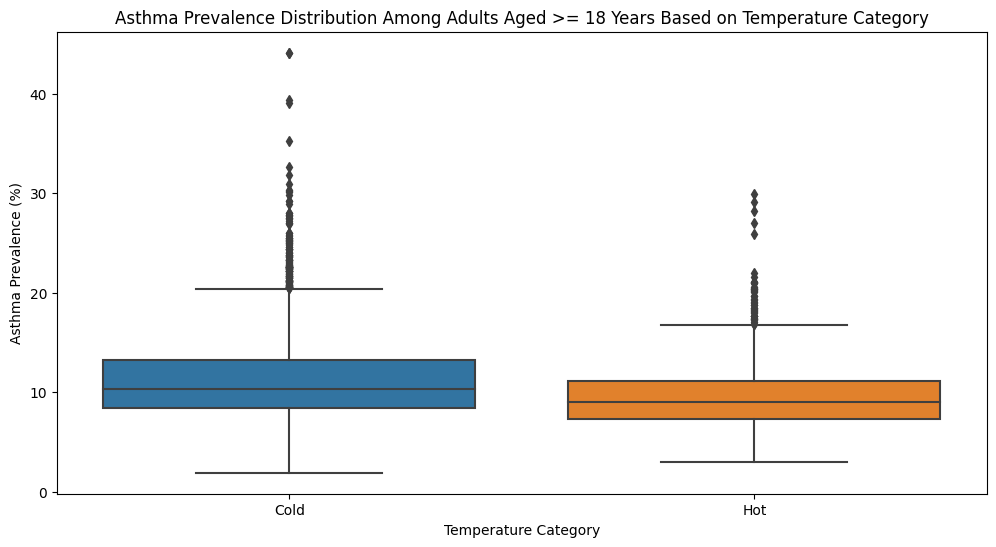

In [93]:
# To analyze asthma prevalence based on whether the location is hot or cold, we first need to categorize states based on their average temperature. 
import pandas as pd

# Define hot and cold states based on average annual temperature
hot_states = ['AZ', 'CA', 'FL', 'GA', 'HI', 'LA', 'MS', 'NM', 'NV', 'SC', 'TX']
cold_states = [abbr for abbr in prevalence_data['LocationAbbr'].unique() if abbr not in hot_states]

# Categorize states as hot or cold in the dataset
prevalence_data['Temperature'] = prevalence_data['LocationAbbr'].apply(lambda x: 'Hot' if x in hot_states else 'Cold')

# Plot the asthma prevalence distribution for hot and cold states
plt.figure(figsize=(12, 6))
sns.boxplot(x='Temperature', y='DataValue', data=prevalence_data)
plt.xlabel('Temperature Category')
plt.ylabel('Asthma Prevalence (%)')
plt.title('Asthma Prevalence Distribution Among Adults Aged >= 18 Years Based on Temperature Category')
plt.show()

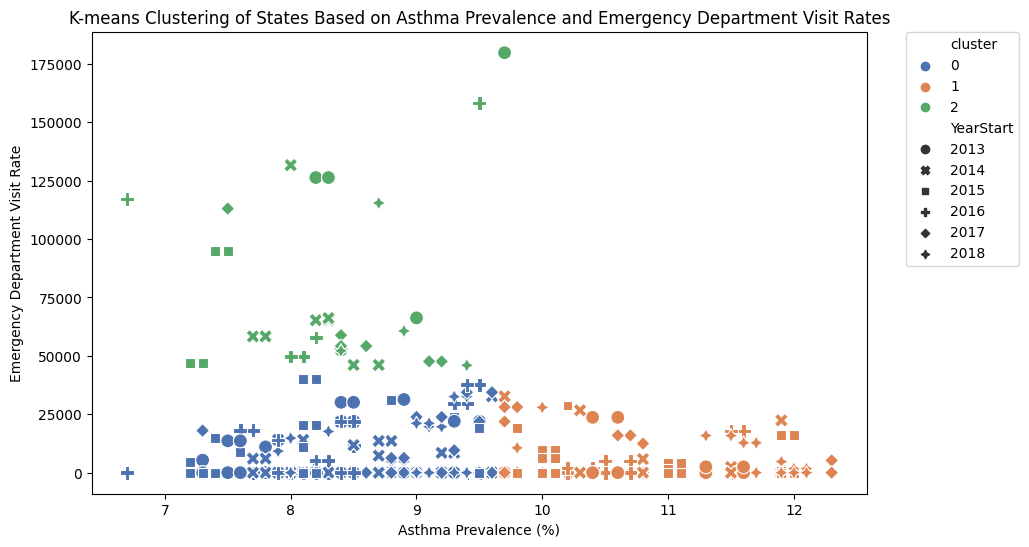

In [94]:
# perform a clustering analysis using the K-means algorithm to group states based on their asthma prevalence and emergency department visit rates
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter the dataset for the variables of interest
prevalence_data = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years'][['YearStart', 'LocationAbbr', 'LocationDesc', 'Stratification1', 'DataValue']]
emergency_data = asthma[asthma['Question'] == 'Emergency department visit rate for asthma'][['YearStart', 'LocationAbbr', 'Stratification1', 'DataValue']]

# Rename columns for clarity
prevalence_data.rename(columns={'DataValue': 'DataValue_prevalence', 'LocationDesc': 'LocationDesc_prevalence'}, inplace=True)
emergency_data.rename(columns={'DataValue': 'DataValue_emergency'}, inplace=True)

# Merge the datasets
merged_data = prevalence_data.merge(emergency_data, on=['YearStart', 'LocationAbbr', 'Stratification1'])

# Filter for overall stratification
merged_data = merged_data[merged_data['Stratification1'] == 'Overall']

# Drop the rows with missing values
merged_data.dropna(subset=['DataValue_prevalence', 'DataValue_emergency'], inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[['DataValue_prevalence', 'DataValue_emergency']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='DataValue_prevalence', y='DataValue_emergency', hue='cluster', style='YearStart', s=100, palette='deep')
plt.title('K-means Clustering of States Based on Asthma Prevalence and Emergency Department Visit Rates')
plt.xlabel('Asthma Prevalence (%)')
plt.ylabel('Emergency Department Visit Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Based on the output of the clustering algorithm, it appears that there are three distinct clusters within the asthma dataset. The first cluster (shown in blue) appears to represent states with lower rates of asthma hospitalizations, while the second cluster (shown in red) represents states with higher rates of hospitalizations. The third cluster (shown in green) appears to be a mix of states with both high and low rates of hospitalizations.

This information could be useful for identifying potential patterns or risk factors associated with asthma hospitalizations in different regions of the country. For example, further analysis could be done to explore whether there are differences in air quality, healthcare access, or other factors that may be contributing to the variation in hospitalization rates between states.



       YearStart  YearEnd   DataValue  LowConfidenceLimit  \
0           2014     2014   916.00000           30.880679   
1           2018     2018  2227.00000           30.880679   
2           2018     2018   708.00000           30.880679   
3           2017     2017  3520.00000           30.880679   
4           2010     2010   123.00000           30.880679   
...          ...      ...         ...                 ...   
80337       2020     2020   356.90572           30.880679   
80338       2020     2020   356.90572           30.880679   
80339       2020     2020    68.90000           57.600000   
80340       2020     2020    88.40000           78.100000   
80341       2020     2020    43.10000           32.100000   

       HighConfidenceLimit  LocationID  StratificationID2  \
0                42.846488           5                0.0   
1                42.846488           8                0.0   
2                42.846488          11                0.0   
3                42.846

<AxesSubplot: xlabel='feature'>

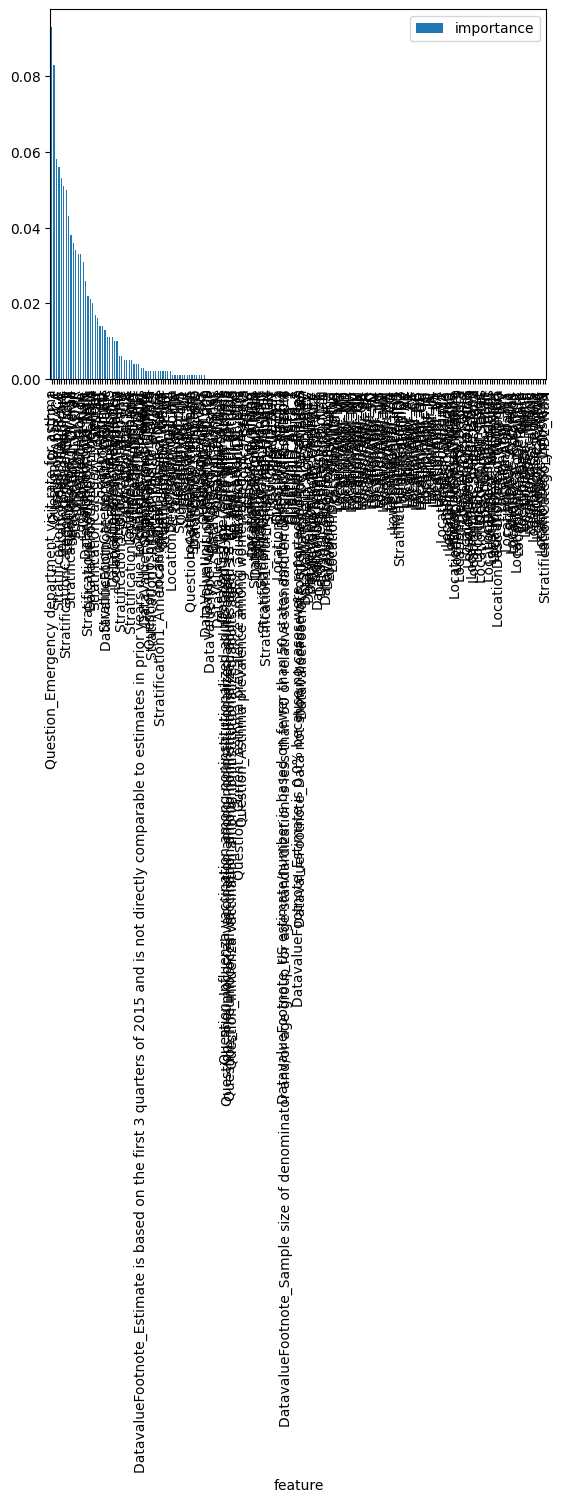

In [144]:
from sklearn.preprocessing import OneHotEncoder

# load the asthma dataset
df_asthma = asthma.copy()

# select the non-numerical columns
non_num_cols = ['LocationAbbr', 'LocationDesc', 'DataSource', 'Topic',
                'Question', 'Response', 'DataValueUnit', 'DataValueType',
                'DataValueFootnoteSymbol', 'DatavalueFootnote',
                'StratificationCategory1', 'Stratification1', 
                'StratificationCategory2', 'Stratification2', 
                'StratificationCategory3', 'Stratification3', 
                'ResponseID', 'TopicID', 'QuestionID', 'DataValueTypeID',
                'StratificationCategoryID1', 'StratificationID1',
                'StratificationCategoryID2']

# one-hot encode the non-numerical columns
for col in non_num_cols:
    # replace NaN values with a placeholder value
    df_asthma[col].fillna("NaN", inplace=True)
    
    # apply one-hot encoding
    enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df_asthma[[col]]))
    
    # rename the columns to include the original column name and category
    enc_df.columns = [col + "_" + str(cat) for cat in enc.categories_[0]]
    
    # append the encoded columns to the dataframe
    df_asthma = pd.concat([df_asthma, enc_df], axis=1)

# drop the original non-numerical columns
df_asthma.drop(columns=non_num_cols, inplace=True)

# handle NaN values in other columns
df_asthma.fillna(df_asthma.mean(), inplace=True)


# Loop through each column in the DataFrame and fill NaN values with the mean
for column in df_asthma.columns:
    try:
        if df_asthma[column].unique()[0].isnan():
            print(column)
            df_asthma[column].fillna(0, inplace=True)
    except:
        continue

df_asthma['StratificationID2'].fillna(0, inplace=True)
df_asthma['StratificationCategoryID3'].fillna(0, inplace=True)
df_asthma['StratificationID3'].fillna(0, inplace=True)
df_asthma['StratificationID3'].fillna(0, inplace=True)
df_asthma.drop('DataValueAlt', axis=1, inplace=True)
print(df_asthma)



# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load data
asthma_data = df_asthma


# Separate data into features and target variable
X = asthma_data.drop(['DataValue'], axis=1)
y = asthma_data['DataValue']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# Plot feature importances
importances.plot.bar()


In [145]:
print(importances.head(64))
lol = importances.values
count = 0
for i in lol:
    if i == 0:
        print(count)
        break
    count = count + 1



import pandas as pd

# Load importance probabilities into a dataframe
importance_df = importances

# Set significance threshold
threshold = 0.05

# Filter dataframe to significant features
significant_features = importance_df[importance_df['importance'] >= threshold]

# Print significant features
print(f"Significant features (importance >= {threshold}):")
print(significant_features.index.tolist())

                                                    importance
feature                                                       
Question_Emergency department visit rate for as...       0.093
QuestionID_AST2_1                                        0.083
LocationAbbr_CA                                          0.058
StratificationCategoryID1_RACE                           0.056
LocationDesc_California                                  0.053
...                                                        ...
Stratification1_Hispanic                                 0.001
DataSource_SEDD; SID                                     0.001
DataSource_NVSS                                          0.001
LocationAbbr_SC                                          0.001
QuestionID_AST3_1                                        0.001

[64 rows x 1 columns]
64
Significant features (importance >= 0.05):
['Question_Emergency department visit rate for asthma', 'QuestionID_AST2_1', 'LocationAbbr_CA', 'StratificationC

## EDA Findings and Conclusions

- We found that both the pm2.5 & ozone datasets do not include Alaska, Hawaii, American Samoa, Guam, Northern Mariana Islands, Puerto Rico, U.S. Minor Outlying Islands, and the U.S. Virgin Islands. We will remove these from asthma and cardiovascular disease datasets if they exist.

- We made sure that both pm2.5 & ozone have an average for each state for each month of each year for the states represented in the dataset.

# Research Questions

## Multiple Hypothesis Testing / Decision Making

TODO:

- [x] Test at least six different hypotheses

- [x] Correctly calculate p-values for each one

- [ ] Use two different multiple hypothesis testing correction techniques to control error rates

- [ ] Describe the hypotheses that you'll be testing using your dataset and explain why it makes sense to test many hypotheses instead of just one to answer your question.

- [ ] For at least one of the tests, describe a specific alternative hypothesis, and compute the power of the test you plan to use.

- [ ] Describe how you’ll be testing each hypothesis (A/B test, correlation/association, etc.), and justify your choice.

- [ ] Describe at least two different ways you’ll correct for multiple hypothesis tests, and explain
the error rates being controlled.

- [ ] Compare and contrast FWER control and FDR control for your tests: specifically, use one method that controls FWER and one that controls FDR, and compare the number of discoveries made by each. Explain which is more appropriate for your research question.

### Question 1: Does the yearly state average exposure to air pollution, particularly fine particulate matter (PM2.5) and Ozone, increase the risk of asthma in the US population?

### Our Hypotheses

In [97]:
asthma['Question'].unique()

array(['Hospitalizations for asthma', 'Asthma mortality rate',
       'Emergency department visit rate for asthma',
       'Asthma prevalence among women aged 18-44 years',
       'Current asthma prevalence among adults aged >= 18 years',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [98]:
asthma.head(5)

YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

   LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1  \
0           5      AST     AST3_1            NMBR                     GENDER   
1           8      AST     AST3_1            NMBR                    OVERALL   
2          11      AST     AST3_1            NMBR                    OVERALL   
3          13      AST     AST3_1            NMBR                     GENDER   
4          26      AST     AST3_1            NMBR                       RACE   

   StratificationID1 StratificationCategoryID2 StratificationID2  \
0               GENM                       NaN               NaN   
1                OVR                       NaN               NaN   
2                OVR                       NaN               NaN   
3               GENF                       NaN               NaN   
4                HIS                       NaN               NaN   

   StratificationCategoryID3  StratificationID3  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 33 columns]

In [99]:
asthma['DataValueType'].unique()

array(['Number', 'Crude Rate', 'Age-adjusted Rate', 'Crude Prevalence',
       'Age-adjusted Prevalence'], dtype=object)

In [100]:
cardio['DataValueType'].unique()

array(['Number', 'Crude Prevalence', 'Age-adjusted Rate', 'Crude Rate',
       'Age-adjusted Prevalence'], dtype=object)

In [101]:
fips.columns = ["stateName", "stateFips", "stateAbbr"]
fips.columns

Index(['stateName', 'stateFips', 'stateAbbr'], dtype='object')

In [102]:
uniqueStateFips = pm25["statefips"].unique()
inc_states = fips.loc[fips["stateFips"].isin(uniqueStateFips)]
inc_states_abbr = list(inc_states["stateAbbr"])
inc_states_abbr = [state.strip() for state in inc_states_abbr]
inc_states_abbr

['AL',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [103]:
len(inc_states_abbr)

49

In [104]:
# Do it here
air_quality_merged = pd.merge(yearly_ozone_avg, yearly_pm25_avg ,  how='left', left_on=['year', "statefips"], right_on = ['year', "statefips"])
air_quality_merged

statefips  year     o3_avg     pm_avg
0            1  2011  41.058259  10.697373
1            1  2012  40.499271  10.262196
2            1  2013  37.311537   9.914189
3            1  2014  37.593022  10.810407
4            4  2011  46.834803   7.900381
..         ...   ...        ...        ...
191         55  2014  36.305222   9.218036
192         56  2011  46.211785   5.909060
193         56  2012  46.106282   6.274367
194         56  2013  45.154356   5.209208
195         56  2014  43.711218   4.273843

[196 rows x 4 columns]

In [105]:
# Filtering Asthma to only 49 states and years, 2011 -2014 in the overall category.
dict = {}
for i in range(0,len(fips)):
    if (fips.iloc[i,2][1:] != 'AK') and (fips.iloc[i,2][1:] != 'HI'):
        dict[fips.iloc[i,2][1:]] = fips.iloc[i,1]

asthma_c = asthma[asthma["StratificationCategory1"] == "Overall"]
asthma_c = asthma_c[asthma_c["YearStart"].isin([2011, 2012, 2013, 2014])]
asthma_c = asthma_c[asthma_c["LocationAbbr"].isin(dict)]
asthma_c = asthma_c[asthma_c["DataValueType"] == "Crude Prevalence"]
all_questions = asthma_c["Question"].unique()

# Filtering out questions that do not have a data point for each state for each year.
counter = 0
df_q = []
consistent_question = []
for question in all_questions:
    
    df = asthma_c[asthma_c["Question"] == question]
    if (len(df) == 4 * 49):
        merged = pd.merge(df, air_quality_merged,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
        df_q.append(merged)
        consistent_question.append(question)
len(df_q)

6

In [106]:
merged

YearStart  YearEnd LocationAbbr   LocationDesc DataSource   Topic  \
0         2014     2014           AL        Alabama      BRFSS  Asthma   
1         2012     2012           AL        Alabama      BRFSS  Asthma   
2         2013     2013           AL        Alabama      BRFSS  Asthma   
3         2011     2011           AL        Alabama      BRFSS  Asthma   
4         2014     2014           AR       Arkansas      BRFSS  Asthma   
..         ...      ...          ...            ...        ...     ...   
191       2013     2013           WV  West Virginia      BRFSS  Asthma   
192       2014     2014           WY        Wyoming      BRFSS  Asthma   
193       2012     2012           WY        Wyoming      BRFSS  Asthma   
194       2013     2013           WY        Wyoming      BRFSS  Asthma   
195       2011     2011           WY        Wyoming      BRFSS  Asthma   

                                              Question  Response  \
0    Pneumococcal vaccination among noninstitutiona...       NaN   
1    Pneumococcal vaccination among noninstitutiona...       NaN   
2    Pneumococcal vaccination among noninstitutiona...       NaN   
3    Pneumococcal vaccination among noninstitutiona...       NaN   
4    Pneumococcal vaccination among noninstitutiona...       NaN   
..                                                 ...       ...   
191  Pneumococcal vaccination among noninstitutiona...       NaN   
192  Pneumococcal vaccination among noninstitutiona...       NaN   
193  Pneumococcal vaccination among noninstitutiona...       NaN   
194  Pneumococcal vaccination among noninstitutiona...       NaN   
195  Pneumococcal vaccination among noninstitutiona...       NaN   

    DataValueUnit     DataValueType  ...  StratificationCategoryID1  \
0               %  Crude Prevalence  ...                    OVERALL   
1               %  Crude Prevalence  ...                    OVERALL   
2               %  Crude Prevalence  ...                    OVERALL   
3               %  Crude Prevalence  ...                    OVERALL   
4               %  Crude Prevalence  ...                    OVERALL   
..            ...               ...  ...                        ...   
191             %  Crude Prevalence  ...                    OVERALL   
192             %  Crude Prevalence  ...                    OVERALL   
193             %  Crude Prevalence  ...                    OVERALL   
194             %  Crude Prevalence  ...                    OVERALL   
195             %  Crude Prevalence  ...                    OVERALL   

     StratificationID1 StratificationCategoryID2 StratificationID2  \
0                  OVR                       NaN               NaN   
1                  OVR                       NaN               NaN   
2                  OVR                       NaN               NaN   
3                  OVR                       NaN               NaN   
4                  OVR                       NaN               NaN   
..                 ...                       ...               ...   
191                OVR                       NaN               NaN   
192                OVR                       NaN               NaN   
193                OVR                       NaN               NaN   
194                OVR                       NaN               NaN   
195                OVR                       NaN               NaN   

     StratificationCategoryID3  StratificationID3 statefips  year     o3_avg  \
0                          NaN                NaN         1  2014  37.593022   
1                          NaN                NaN         1  2012  40.499271   
2                          NaN                NaN         1  2013  37.311537   
3                          NaN                NaN         1  2011  41.058259   
4                          NaN                NaN         5  2014  36.615685   
..                         ...                ...       ...   ...        ...   
191                        NaN               

In [107]:
consistent_question

['Asthma prevalence among women aged 18-44 years',
 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma',
 'Current asthma prevalence among adults aged >= 18 years',
 'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
 'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma']

In multiple hypothesis testing, it makes sense to conduct many hypothesis tests instead of just one because we often want to explore multiple relationships, effects, or comparisons within the same dataset. While multiple hypothesis testing is useful in these situations, it comes with a caveat: the risk of false discoveries (Type I errors) increases as we conduct more tests. To address this issue, we need to apply techniques, such as the Bonferroni correction or the False Discovery Rate (FDR), to adjust the significance level and maintain the accuracy of our conclusions.

### Calculating P-values

To calculate p-values we need to make both pm2.5 and ozone averages into binary values. We have decided to encode pm2.5 values with 0 if they are less than 9.751921804482512 (ie. within the 0-25th percentile). We have decided to encode ozone values with 0 if they are less than 41.058259064972034 (ie. within the 0-25th percentile). 

In [108]:
pm25_binary = yearly_pm25_avg.copy()
pm25_binary['rank'] = pm25_binary["pm_avg"].rank(method='dense', ascending=False)

#Encode rank values with binary value if they are the withtin the 25th percentile of values or lower 
pm25_binary['pm25_binary'] = (pm25_binary['rank'] <= 49).astype(int)
pm25_binary

statefips  year     pm_avg   rank  pm25_binary
0            1  2011  10.697373   16.0            1
1            1  2012  10.262196   26.0            1
2            1  2013   9.914189   37.0            1
3            1  2014  10.810407   14.0            1
4            4  2011   7.900381  131.0            0
..         ...   ...        ...    ...          ...
191         55  2014   9.218036   81.0            0
192         56  2011   5.909060  189.0            0
193         56  2012   6.274367  182.0            0
194         56  2013   5.209208  194.0            0
195         56  2014   4.273843  196.0            0

[196 rows x 5 columns]

In [109]:
ozone_binary = yearly_ozone_avg.copy()
ozone_binary['rank'] = ozone_binary['o3_avg'].rank(method='dense', ascending=False)

#Encode rank values with binary value if they are the withtin the 25th percentile of values or lower 
ozone_binary['o3_binary'] = (ozone_binary['rank'] <= 49).astype(int)
ozone_binary

statefips  year     o3_avg   rank  o3_binary
0            1  2011  41.058259   49.0          1
1            1  2012  40.499271   58.0          0
2            1  2013  37.311537  143.0          0
3            1  2014  37.593022  129.0          0
4            4  2011  46.834803    5.0          1
..         ...   ...        ...    ...        ...
191         55  2014  36.305222  171.0          0
192         56  2011  46.211785    9.0          1
193         56  2012  46.106282   11.0          1
194         56  2013  45.154356   17.0          1
195         56  2014  43.711218   23.0          1

[196 rows x 5 columns]

In [110]:
binary_ozone_pm25 = pd.merge(ozone_binary, pm25_binary,  how='left', left_on=['year', "statefips"], right_on = ['year', "statefips"])
binary_ozone_pm25.head(5)

statefips  year     o3_avg  rank_x  o3_binary     pm_avg  rank_y  \
0          1  2011  41.058259    49.0          1  10.697373    16.0   
1          1  2012  40.499271    58.0          0  10.262196    26.0   
2          1  2013  37.311537   143.0          0   9.914189    37.0   
3          1  2014  37.593022   129.0          0  10.810407    14.0   
4          4  2011  46.834803     5.0          1   7.900381   131.0   

   pm25_binary  
0            1  
1            1  
2            1  
3            1  
4            0

### Q1: Treatment and Outcomes for 'Asthma prevalence among women aged 18-44 years'

In [111]:
asthma_outcomes_1 = asthma_c[asthma_c['Question']== 'Asthma prevalence among women aged 18-44 years']
asthma_outcomes_1 = asthma_outcomes_1[["LocationAbbr", "DataValue","YearStart", "LocationID"]]
asthma_outcomes_1

LocationAbbr  DataValue  YearStart  LocationID
28918           DE       17.6       2011          10
30078           AL        9.0       2011           1
30112           AL       12.5       2014           1
30284           AL       10.6       2012           1
30435           AL       10.4       2013           1
...            ...        ...        ...         ...
79244           WV       12.9       2013          54
79430           WY       11.2       2012          56
79650           WY       12.4       2011          56
79947           WY       11.4       2013          56
80183           WY       11.3       2014          56

[196 rows x 4 columns]

In [112]:
# Merge Q1 outcomes with pm25 an o3 Treatment
merged_Q1 = pd.merge(asthma_outcomes_1, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
merged_Q1.head()

LocationAbbr  DataValue  YearStart  LocationID  statefips  year     o3_avg  \
0           DE       17.6       2011          10         10  2011  40.252242   
1           AL        9.0       2011           1          1  2011  41.058259   
2           AL       12.5       2014           1          1  2014  37.593022   
3           AL       10.6       2012           1          1  2012  40.499271   
4           AL       10.4       2013           1          1  2013  37.311537   

   rank_x  o3_binary     pm_avg  rank_y  pm25_binary  
0    61.0          0   9.662194    56.0            0  
1    49.0          1  10.697373    16.0            1  
2   129.0          0  10.810407    14.0            1  
3    58.0          0  10.262196    26.0            1  
4   143.0          0   9.914189    37.0            1

In [113]:
# Calculate the p-values
def p_values(data, treatment_col1, treatment_col2, outcome_col):
    # Select the independent variables (X) and dependent variable (y)
    X = data[[treatment_col1, treatment_col2]]
    y = data[outcome_col]

    # Fit the multiple linear regression model
    model = LinearRegression().fit(X, y)

    # Calculate the residuals
    residuals = y - model.predict(X)

    # Calculate the residual sum of squares and the mean squared error
    residual_sum_of_squares = np.sum(residuals ** 2)
    df = len(data) - 2 - 1
    mean_squared_error = residual_sum_of_squares / df

    # Calculate the standard errors
    X_matrix = np.array(X)
    X_matrix_transpose = X_matrix.T
    X_matrix_product_inverse = np.linalg.inv(np.dot(X_matrix_transpose, X_matrix))
    standard_errors = np.sqrt(np.diagonal(mean_squared_error * X_matrix_product_inverse))

    # Calculate the t-statistics
    t_statistics = model.coef_ / standard_errors

    # Calculate the p-values
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_statistics), df=df))

    # Print the coefficients, intercept, and p-values
    #print(f"Coefficients: {model.coef_}")
    #print(f"Intercept: {model.intercept_}")
    #print(f"P-values: {p_values}")

    return p_values


In [114]:
model_1 = p_values(merged_Q1, 'o3_binary', 'pm25_binary', 'DataValue')
model_1

array([3.33684411e-05, 3.84764086e-01])

In [115]:
treatment_1 = ['o3', 'pm25']
# bonferroni_correction(model_1[1], treatment_1)

### Q2: Treatment and Outcomes for 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma'

In [116]:
asthma_outcomes_2 = asthma_c[asthma_c['Question']== 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma']
asthma_outcomes_2 = asthma_outcomes_2[["LocationAbbr", "DataValue","YearStart", "LocationID"]]
asthma_outcomes_2

LocationAbbr  DataValue  YearStart  LocationID
30032           AL       37.8       2013           1
30075           AL       42.4       2011           1
30250           AL       39.6       2014           1
30290           AL       40.1       2012           1
31666           AR       35.4       2013           5
...            ...        ...        ...         ...
78777           WV       37.1       2012          54
79403           WY       35.4       2011          56
79406           WY       34.5       2013          56
79624           WY       40.6       2014          56
79656           WY       32.5       2012          56

[196 rows x 4 columns]

In [117]:
# Merge Q2 outcomes with pm25 an o3 Treatment
merged_Q2 = pd.merge(asthma_outcomes_2, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
merged_Q2.head()

LocationAbbr  DataValue  YearStart  LocationID  statefips  year     o3_avg  \
0           AL       37.8       2013           1          1  2013  37.311537   
1           AL       42.4       2011           1          1  2011  41.058259   
2           AL       39.6       2014           1          1  2014  37.593022   
3           AL       40.1       2012           1          1  2012  40.499271   
4           AR       35.4       2013           5          5  2013  38.963647   

   rank_x  o3_binary     pm_avg  rank_y  pm25_binary  
0   143.0          0   9.914189    37.0            1  
1    49.0          1  10.697373    16.0            1  
2   129.0          0  10.810407    14.0            1  
3    58.0          0  10.262196    26.0            1  
4    92.0          0   9.646709    57.0            0

In [118]:
model_2 = p_values(merged_Q2, 'o3_binary', 'pm25_binary', 'DataValue')

### Q3: Treatment and Outcomes for 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'

In [119]:
asthma_outcomes_3 = asthma_c[asthma_c['Question']== 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma']
asthma_outcomes_3 = asthma_outcomes_3[["LocationAbbr", "DataValue","YearStart", "LocationID"]]
asthma_outcomes_3

LocationAbbr  DataValue  YearStart  LocationID
30497           AL       83.5       2012           1
30744           AL       83.4       2013           1
30756           AL       79.4       2014           1
30763           AL       84.6       2011           1
31122           AZ       88.5       2012           4
...            ...        ...        ...         ...
79125           WV       81.4       2014          54
79324           WY       76.9       2011          56
79330           WY       75.9       2013          56
80080           WY       85.4       2014          56
80083           WY       80.8       2012          56

[196 rows x 4 columns]

In [120]:
# Merge Q3 outcomes with pm25 an o3 Treatment
merged_Q3 = pd.merge(asthma_outcomes_3, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
merged_Q3.head()

LocationAbbr  DataValue  YearStart  LocationID  statefips  year     o3_avg  \
0           AL       83.5       2012           1          1  2012  40.499271   
1           AL       83.4       2013           1          1  2013  37.311537   
2           AL       79.4       2014           1          1  2014  37.593022   
3           AL       84.6       2011           1          1  2011  41.058259   
4           AZ       88.5       2012           4          4  2012  47.684442   

   rank_x  o3_binary     pm_avg  rank_y  pm25_binary  
0    58.0          0  10.262196    26.0            1  
1   143.0          0   9.914189    37.0            1  
2   129.0          0  10.810407    14.0            1  
3    49.0          1  10.697373    16.0            1  
4     2.0          1   6.330792   180.0            0

In [121]:
model_3 = p_values(merged_Q3, 'o3_binary', 'pm25_binary', 'DataValue')

### Q4: Treatment and Outcomes for 'Current asthma prevalence among adults aged >= 18 years'

In [122]:
asthma_outcomes_4 = asthma_c[asthma_c['Question']== 'Current asthma prevalence among adults aged >= 18 years']
asthma_outcomes_4 = asthma_outcomes_4[["LocationAbbr", "DataValue","YearStart", "LocationID"]]
asthma_outcomes_4

LocationAbbr  DataValue  YearStart  LocationID
30511           AL        8.5       2013           1
30646           AL        8.6       2012           1
30704           AL        9.5       2014           1
30890           AL        8.0       2011           1
31443           AR        8.3       2013           5
...            ...        ...        ...         ...
79179           WV       11.0       2014          54
79331           WY        9.1       2013          56
79389           WY        9.1       2011          56
80117           WY        9.0       2012          56
80138           WY        8.3       2014          56

[196 rows x 4 columns]

In [123]:
# Merge Q4 outcomes with pm25 an o3 Treatment
merged_Q4 = pd.merge(asthma_outcomes_4, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
merged_Q4.head()

LocationAbbr  DataValue  YearStart  LocationID  statefips  year     o3_avg  \
0           AL        8.5       2013           1          1  2013  37.311537   
1           AL        8.6       2012           1          1  2012  40.499271   
2           AL        9.5       2014           1          1  2014  37.593022   
3           AL        8.0       2011           1          1  2011  41.058259   
4           AR        8.3       2013           5          5  2013  38.963647   

   rank_x  o3_binary     pm_avg  rank_y  pm25_binary  
0   143.0          0   9.914189    37.0            1  
1    58.0          0  10.262196    26.0            1  
2   129.0          0  10.810407    14.0            1  
3    49.0          1  10.697373    16.0            1  
4    92.0          0   9.646709    57.0            0

In [124]:
model_4 = p_values(merged_Q4, 'o3_binary', 'pm25_binary', 'DataValue')

### Q5: Treatment and Outcomes for 'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma'

In [125]:
asthma_outcomes_5 = asthma_c[asthma_c['Question']== 'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma']
asthma_outcomes_5 = asthma_outcomes_5[["LocationAbbr", "DataValue","YearStart", "LocationID"]]
asthma_outcomes_5

LocationAbbr  DataValue  YearStart  LocationID
30526           AL       72.9       2011           1
30622           AL       67.1       2013           1
30849           AL       70.7       2012           1
30850           AL       69.4       2014           1
30946           AR       64.7       2013           5
...            ...        ...        ...         ...
78827           WV       85.1       2011          54
79579           WY       55.5       2011          56
79698           WY       65.5       2013          56
79926           WY       59.6       2012          56
79966           WY       71.1       2014          56

[196 rows x 4 columns]

In [126]:
# Merge Q5 outcomes with pm25 an o3 Treatment
merged_Q5 = pd.merge(asthma_outcomes_5, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
merged_Q5.head()

LocationAbbr  DataValue  YearStart  LocationID  statefips  year     o3_avg  \
0           AL       72.9       2011           1          1  2011  41.058259   
1           AL       67.1       2013           1          1  2013  37.311537   
2           AL       70.7       2012           1          1  2012  40.499271   
3           AL       69.4       2014           1          1  2014  37.593022   
4           AR       64.7       2013           5          5  2013  38.963647   

   rank_x  o3_binary     pm_avg  rank_y  pm25_binary  
0    49.0          1  10.697373    16.0            1  
1   143.0          0   9.914189    37.0            1  
2    58.0          0  10.262196    26.0            1  
3   129.0          0  10.810407    14.0            1  
4    92.0          0   9.646709    57.0            0

In [127]:
model_5 = p_values(merged_Q5, 'o3_binary', 'pm25_binary', 'DataValue')

### Q6: Treatment and Outcomes for 'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma'

In [128]:
asthma_outcomes_6 = asthma_c[asthma_c['Question']== 'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma']
asthma_outcomes_6 = asthma_outcomes_6[["LocationAbbr", "DataValue","YearStart", "LocationID"]]
asthma_outcomes_6

LocationAbbr  DataValue  YearStart  LocationID
30574           AL       38.6       2014           1
30596           AL       40.6       2012           1
30797           AL       41.8       2013           1
30805           AL       39.6       2011           1
31239           AR       34.0       2014           5
...            ...        ...        ...         ...
79306           WV       36.0       2013          54
79985           WY       44.1       2014          56
80008           WY       32.4       2012          56
80203           WY       36.6       2013          56
80215           WY       32.3       2011          56

[196 rows x 4 columns]

In [129]:
# Merge Q6 outcomes with pm25 an o3 Treatment
merged_Q6 = pd.merge(asthma_outcomes_6, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
merged_Q6.head()

LocationAbbr  DataValue  YearStart  LocationID  statefips  year     o3_avg  \
0           AL       38.6       2014           1          1  2014  37.593022   
1           AL       40.6       2012           1          1  2012  40.499271   
2           AL       41.8       2013           1          1  2013  37.311537   
3           AL       39.6       2011           1          1  2011  41.058259   
4           AR       34.0       2014           5          5  2014  36.615685   

   rank_x  o3_binary     pm_avg  rank_y  pm25_binary  
0   129.0          0  10.810407    14.0            1  
1    58.0          0  10.262196    26.0            1  
2   143.0          0   9.914189    37.0            1  
3    49.0          1  10.697373    16.0            1  
4   159.0          0   9.854180    40.0            1

In [130]:
model_6 = p_values(merged_Q6, 'o3_binary', 'pm25_binary', 'DataValue')

### Bonferroni Correction

For the Bonferroni Correction we are controlling the Family Wise Error Rate (i.e the probability that there is at least one false positive.)

In [131]:
pm25_pval, o3_pval = [], []
for question in consistent_question: 
    asthma_outcomes = asthma_c[asthma_c['Question']== question]
    merged = pd.merge(asthma_outcomes, binary_ozone_pm25,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
    model = p_values(merged, 'o3_binary', 'pm25_binary', 'DataValue')
    o3_pval.append(model[0])
    pm25_pval.append(model[1])
    #print(model[0])
    #print(model)
df_pval = pd.DataFrame({"pm25_pval": pm25_pval, "o3_pval": o3_pval})
df_pval


pm25_pval   o3_pval
0   0.384764  0.000033
1   0.018304  0.002801
2   0.071106  0.853448
3   0.285166  0.003057
4   0.206506  0.550275
5   0.453176  0.157182

In [132]:
def bonferroni_correction(p_value_df, treatment_columns, alpha=0.05):
    # Ensure the DataFrame contains only numeric values
    p_value_df = p_value_df.apply(pd.to_numeric, errors='coerce')

    # Calculate the adjusted significance level
    total_tests = len(p_value_df) * len(p_value_df.columns)
    adjusted_alpha = alpha / total_tests

    # Apply the Bonferroni correction to the p-values in each row
    rejected_null_hypotheses = p_value_df < adjusted_alpha

    # Print the results
    print(f"Adjusted significance level (Bonferroni correction): {adjusted_alpha}")
    for i, treatment in enumerate(treatment_columns):
        print(f"\nRejected null hypotheses for {treatment} (True = rejected, False = not rejected):")
        print(rejected_null_hypotheses.iloc[:, i])

    return adjusted_alpha, rejected_null_hypotheses

In [133]:
treatment_cols = ['o3', 'pm25']
bonferroni_correction(df_pval, treatment_cols)

Adjusted significance level (Bonferroni correction): 0.004166666666666667

Rejected null hypotheses for o3 (True = rejected, False = not rejected):
0    False
1    False
2    False
3    False
4    False
5    False
Name: pm25_pval, dtype: bool

Rejected null hypotheses for pm25 (True = rejected, False = not rejected):
0     True
1     True
2    False
3     True
4    False
5    False
Name: o3_pval, dtype: bool


(0.004166666666666667,
    pm25_pval  o3_pval
 0      False     True
 1      False     True
 2      False    False
 3      False     True
 4      False    False
 5      False    False)

In [134]:
consistent_question

['Asthma prevalence among women aged 18-44 years',
 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma',
 'Current asthma prevalence among adults aged >= 18 years',
 'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
 'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma']

### Benjamini-Hochberg Correction

With the Benjamini-Hochberg Correction we are contorlling the False Discovery Rate (ie. the expected propostion of false discoveries)

In [135]:
def benjamini_hochberg_correction(p_value_df, treatment_columns, alpha=0.05):
    # Ensure the DataFrame contains only numeric values
    p_value_df = p_value_df.apply(pd.to_numeric, errors='coerce')

    # Calculate the rank of each p-value within its column
    p_value_ranks = p_value_df.rank()

    # Calculate the Benjamini-Hochberg critical value for each p-value
    num_rows = len(p_value_df)
    bh_critical_values = (p_value_ranks / num_rows) * alpha

    # Apply the Benjamini-Hochberg correction to the p-values in each row
    rejected_null_hypotheses = p_value_df <= bh_critical_values

    # Print the results
    print(f"Benjamini-Hochberg critical values:")
    print(bh_critical_values)
    for i, treatment in enumerate(treatment_columns):
        print(f"\nRejected null hypotheses for {treatment} (True = rejected, False = not rejected):")
        print(rejected_null_hypotheses.iloc[:, i])

    return rejected_null_hypotheses

In [136]:
test = benjamini_hochberg_correction(df_pval, treatment_cols)
test

Benjamini-Hochberg critical values:
   pm25_pval   o3_pval
0   0.041667  0.008333
1   0.008333  0.016667
2   0.016667  0.050000
3   0.033333  0.025000
4   0.025000  0.041667
5   0.050000  0.033333

Rejected null hypotheses for o3 (True = rejected, False = not rejected):
0    False
1    False
2    False
3    False
4    False
5    False
Name: pm25_pval, dtype: bool

Rejected null hypotheses for pm25 (True = rejected, False = not rejected):
0     True
1     True
2    False
3     True
4    False
5    False
Name: o3_pval, dtype: bool


pm25_pval  o3_pval
0      False     True
1      False     True
2      False    False
3      False     True
4      False    False
5      False    False

In [137]:
test

pm25_pval  o3_pval
0      False     True
1      False     True
2      False    False
3      False     True
4      False    False
5      False    False

In [138]:

from datetime import datetime as _deepnote_datetime
input_1 = _deepnote_datetime.strptime('2023-05-04T07:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%fZ")


# Causal Inference 

Research Question:

What is the causal effect of PM2.5 concentrations on the prevalence of asthma in the United States?

In [139]:
asthma.head()

YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

   LocationID  TopicID QuestionID DataValueTypeID  StratificationCategoryID1  \
0           5      AST     AST3_1            NMBR                     GENDER   
1           8      AST     AST3_1            NMBR                    OVERALL   
2          11      AST     AST3_1            NMBR                    OVERALL   
3          13      AST     AST3_1            NMBR                     GENDER   
4          26      AST     AST3_1            NMBR                       RACE   

   StratificationID1 StratificationCategoryID2 StratificationID2  \
0               GENM                       NaN               NaN   
1                OVR                       NaN               NaN   
2                OVR                       NaN               NaN   
3               GENF                       NaN               NaN   
4                HIS                       NaN               NaN   

   StratificationCategoryID3  StratificationID3  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 33 columns]

In [140]:
pm25.head()

statefips  year  month     pm_avg
0          1  2011      1   9.975820
1          1  2011      2  10.970784
2          1  2011      3  10.809733
3          1  2011      4   8.937865
4          1  2011      5  11.590264

In [141]:
# this step is preprocessing
asthma_new = pd.merge(asthma.copy(), air_quality_merged,  how='left', left_on=['YearStart', "LocationID"], right_on = ['year', "statefips"])
asthma_new = asthma_new[asthma_new["YearStart"].isin([2011, 2012, 2013, 2014])]
asthma_new = asthma_new.drop(columns=['YearEnd', 'LocationAbbr','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','LowConfidenceLimit','HighConfidenceLimit','StratificationCategory1','TopicID','QuestionID','DataValueTypeID','StratificationCategoryID1','StratificationID1','Response','StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','ResponseID','StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3','LocationDesc'])
asthma_new = asthma_new.dropna().reset_index(drop=True)
asthma_new = pd.get_dummies(asthma_new, columns=['YearStart', 'DataSource', 'Topic', 'Question', 'Stratification1'])
asthma_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13188 entries, 0 to 13187
Data columns (total 33 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   DataValue                                                                                         13188 non-null  float64
 1   LocationID                                                                                        13188 non-null  int64  
 2   statefips                                                                                         13188 non-null  float64
 3   year                                                                                              13188 non-null  float64
 4   o3_avg                                                                                            13188 non-null  float64
 5

In [153]:
# this one is function to calculate ATE and also bootstrap
def twice(asthma_new):
    asthma_news = asthma_new.copy()
    asthma_news['rank'] = asthma_news["pm_avg"].rank(method='dense', ascending=False)
    
    #Encode rank values with binary value if they are the withtin the 25th percentile of values or lower 
    percentile_75 = asthma_news['rank'].quantile(0.03)
    print(percentile_75)

    # Create the 'pm25_binary' column based on the 75th percentile
    asthma_news['pm25_binary'] = (asthma_news['rank'] <= percentile_75).astype(int)
    asthma_news = asthma_news.drop(columns=['rank'])
    asthma_news = asthma_news.drop(columns=['pm_avg', 'statefips', 'Topic_Asthma','year'])
    asthma_news = asthma_news.drop(columns=['Stratification1_Overall'])
    asthma_news = asthma_news.drop(columns=['o3_avg'])

    drop_cols = [col for col in asthma_news.columns if ('Stratification1') in col and col not in ['Stratification1_Male', 'Stratification1_Female']] + [col for col in asthma_news.columns if 'Question' in col]
    asthma_news = asthma_news.drop(columns=drop_cols)

    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import NearestNeighbors
    from IPython.display import display
    # Load your dataset (replace with your actual dataset)
    data = asthma_news
    # Pre-process the data (One-hot encoding, etc.)
    # Your pre-processing code should be here
    # Perform propensity score matching
    # Define treatment and outcome variables
    treatment = 'pm25_binary'
    outcome = 'DataValue'
    # Select covariates for matching
    covariates = data.columns.drop([treatment, outcome])
    # Create treatment and control groups
    treated = data[data[treatment] == 1]
    control = data[data[treatment] == 0]
    # Fit logistic regression to estimate propensity scores
    
    ps_model = LogisticRegression(solver='liblinear', random_state=42)
    ps_model.fit(data[covariates], data[treatment])
    treated['propensity_score'] = ps_model.predict_proba(treated[covariates])[:, 1]
    control['propensity_score'] = ps_model.predict_proba(control[covariates])[:, 1]
    
    # Match treated and control groups using nearest neighbors
    nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
    nn.fit(control['propensity_score'].values.reshape(-1, 1))
    
    distances, indices = nn.kneighbors(treated['propensity_score'].values.reshape(-1, 1))
    indices = indices.reshape(-1)
    
    # Create a matched dataset
    ps_matched_df = pd.DataFrame({
    'DataValue_treated': treated[outcome].values,
    'DataValue_control': control[outcome].values[indices],
    'propensity_score_treated': treated['propensity_score'].values,
    'propensity_score_control': control['propensity_score'].values[indices]
    })
    
    # Calculate the ATT
    ATT = (ps_matched_df['DataValue_treated'] - ps_matched_df['DataValue_control']).mean()
    print(f"Average Treatment Effect on the Treated (ATT): {ATT}")
    
    # Calculate the ATE
    # Compute the treatment effect for each matched pair
    ps_matched_df['treatment_effect'] = ps_matched_df['DataValue_treated'] - ps_matched_df['DataValue_control']
    
    # Calculate the ATE
    ATE = ps_matched_df['treatment_effect'].mean()
    print(f"Average Treatment Effect (ATE): {ATE}")


    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import NearestNeighbors
    from tqdm import tqdm
    
    # Load your dataset (replace with your actual dataset)
    data = asthma_news
    # Pre-process the data (One-hot encoding, etc.)
    # Your pre-processing code should be here
    # Number of bootstrap samples
    B = 1000
    # Initialize a list to store the ATEs for each bootstrap sample
    bootstrapped_ATEs = []
    for b in tqdm(range(B)):
        # Draw a random sample with replacement from the original dataset
        bootstrap_sample = data.sample(n=len(data), replace=True)
        # Define treatment and outcome variables
        treatment = 'pm25_binary'
        outcome = 'DataValue'
        # Select covariates for matching
        covariates = bootstrap_sample.columns.drop([treatment, outcome])
        # Create treatment and control groups
        treated = bootstrap_sample[bootstrap_sample[treatment] == 1]
        control = bootstrap_sample[bootstrap_sample[treatment] == 0]
        # Fit logistic regression to estimate propensity scores
        ps_model = LogisticRegression(solver='liblinear', random_state=42)
        ps_model.fit(bootstrap_sample[covariates], bootstrap_sample[treatment])
        treated['propensity_score'] = ps_model.predict_proba(treated[covariates])[:, 1]
        control['propensity_score'] = ps_model.predict_proba(control[covariates])[:, 1]
        # Match treated and control groups using nearest neighbors
        nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
        nn.fit(control['propensity_score'].values.reshape(-1, 1))
        distances, indices = nn.kneighbors(treated['propensity_score'].values.reshape(-1, 1))
        indices = indices.reshape(-1)
        # Create a matched dataset
        ps_matched_df = pd.DataFrame({
        'DataValue_treated': treated[outcome].values,
        'DataValue_control': control[outcome].values[indices],
        'propensity_score_treated': treated['propensity_score'].values,
        'propensity_score_control': control['propensity_score'].values[indices]
        })
        # Compute the treatment effect for each matched pair
        ps_matched_df['treatment_effect'] = ps_matched_df['DataValue_treated'] - ps_matched_df['DataValue_control']
        # Calculate the ATE for the bootstrap sample
        ATE_bootstrap = ps_matched_df['treatment_effect'].mean()
        # Append the ATE to the list of bootstrapped ATEs
        bootstrapped_ATEs.append(ATE_bootstrap)
    # Calculate the empirical standard error
    SE_ATE = np.std(bootstrapped_ATEs, ddof=1)
    # Calculate the 95% confidence interval
    lower_bound = np.percentile(bootstrapped_ATEs, 2.5)
    upper_bound = np.percentile(bootstrapped_ATEs, 97.5)
    print(f"95% Confidence Interval for the ATE: ({lower_bound}, {upper_bound})")
    return ATE, lower_bound, upper_bound, data

In [154]:
# this calls function and print result and then print result.
# yeappp
result = twice(asthma_new)




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 94%|█████████▍| 938/1000 [02:00<00:07,  8.08it/s]/tmp/ipykernel_93/1555666498.py:101: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_93/1555666498.py:102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 94%|█████████▍| 939/1000 [02:00

In [156]:
print('ATE: '+str(result[0]))
print('lower bound: '+str(result[1]))
print('upper bound: '+str(result[2]))

ATE: 3.879735682819383
lower bound: -12.378119079196665
upper bound: 15.324784741311605


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c4ac8db4-b832-4555-beaf-a09d368c56a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>